<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/mvp-analise-de-dados-e-boas-praticas/MVP_CD_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

## Profs. Tatiana Escovedo e Hugo Villamizar

### Curso: Pós Graduação em Análise de Dados e Analytics - PUC-RJ ([link](https://especializacao.ccec.puc-rio.br/especializacao/ciencia-de-dados-e-analytics))
### Aluno: Cláudio de Miranda Luz ([Linkedin](https://www.linkedin.com/in/claudiomluz/))



### Estrutura

De maneira geral o MVP contemplará as 3 etapas iniciais de um projeto de ciência de dados, sendo estas:

*   Definição do problema
*   Coleta e análise de dados
*   Pré-processamento

## 1. Definição do Problema

A plataforma **Airbnb** é um dos maiores exemplos de serviço de **economia compartilhada**. Proprietários ou administradores de imóveis podem oferecer acomodações de modo a obter retorno financeiro e hóspedes podem encontrar uma variedade de opções que atendam suas expectativas de experiência de hospedagem. O serviço possibilita o encontro dessas duas personas com cada um buscando seus melhores interesses.

No contexto de economia compartilhada, do ponto de vista da plataforma e do administrador do bem, uma **métrica** que pode ser um dos indicadores de melhor retorno de investimento seria a **taxa de ocupação**. No caso do Airbnb e de acomodações, quanto mais dias hóspedes estiverem usufruindo do bem, mais valor está sendo gerado para todas as partes envolvidas.

Minha proposta nesse trabalho é analisar dados da plataforma Airbnb referentes a acomodações na cidade do **Rio de Janeiro**. Esse estudo vai procurar observar e tratar as variáveis que podem estar mais diretamente ligadas à taxa de ocupação das acomodações assim como preparar os dados para que possam ser utilizados por algoritmos de machine learning mais pra frente.

O dataset usado neste projeto é proveniente do site [Inside Airbnb](http://insideairbnb.com/) e contém dados extraídos na data de 23 de setembro de 2023, a mais recentemente ofertada no momento da escrita do trabalho.

O **problema** que quero resolver depois da coleta, análise e do pré-processamento dos dados é encontrar os **fatores mais influentes para uma melhor taxa de ocupação** de uma acomodação e na sequência conseguir **estimar a taxa de ocupação** de uma acomodação **a partir de valores existentes** para esse fatores.

Esse problema se encaixa na categoria de **aprendizado supervisionado** num cenário de **regressão**, pois pretendo inferir valores de uma variável alvo a partir de valores de outras variáveis do dataset.

O dataset não contém diretamente um dado de taxa de ocupação então usarei outra variável, ligada a quantidade de avaliações da acomodação, como **variável proxy** para fazer a leitura da taxa de ocupação.

Tenho diversas **hipóteses** relacionadas ao tema, na relação de influência entre os dados e a variável alvo. Seguem algumas:

*   o bairro onde se localiza uma acomodação influencia na sua taxa de ocupação;
*   a proximidade com pontos de interesse influencia na taxa de ocupação;
*   existe sazonalidade para taxa de ocupação mesmo para acomodações muito demandadas;
*   imóveis menores tem taxa de ocupação mais alta do que os maiores;
*   o comportamento do anfitrião influencia na taxa de ocupação.

Ao longo do notebook farei a análise destas e de outras hipóteses sobre o tema.

Vou me referenciar aos imóveis ou quartos sempre chamando-os de **acomodação** e chamarei de **anfitrião** a pessoa que publicou a acomodação na plataforma Airbnb, seja ela proprietária ou não da acomodação.

O **dicionário de dados** sobre o dataset estará escrito no meio do notebook, após as etapas de limpeza iniciais, onde dados menos relevantes serão descartados. Serão enumerados e descritos no dicionário os dados originais mantidos e aqueles novos, gerados por enriquecimento, e que serão analisados mais profundamente nas sessões subsequentes.

Escolhi esse dataset por ser uma ótima opção para exercitar os conceitos aprendidos na disciplina. Ele contém dados numéricos, textuais, categóricos, datas e booleanos, além de ter dimensões interessantes. Buscarei aplicar as técnicas de pré-processamento aprendidas no curso, de maneira a fixar o conhecimento, e explorarei outras alternativas de tratamento e visualização.

## 2. Configurações iniciais

Criei essa seção para agregar configurações iniciais do notebook.

### 2.1 Imports

In [ ]:
# Importação de pacotes usados no notebook
import requests  # coleta de arquivos
import gzip  # descompactação de arquivos
import pandas as pd  # para análise de dados
import numpy as np
import missingno as ms  # para tratamento de missings
import warnings  # Pacote usado para configuração de warnings
from typing import List, Dict  # para usar em annotations de PEP 484
import json  # para interpretar listas que estão como string
import matplotlib.pyplot as plt  # pacotes de visualização
import seaborn as sns
from sklearn.model_selection import train_test_split  # pacotes para holdout
from sklearn.preprocessing import MinMaxScaler  # normalização
from sklearn.preprocessing import StandardScaler  # padronização
from sklearn.preprocessing import OrdinalEncoder  # ordinal encoding
from sklearn.preprocessing import OneHotEncoder  # one-hot e dummy encoding

# configuração para não exibir os warnings
warnings.filterwarnings("ignore")

### 2.2 Constantes

In [ ]:
# Constantes que armazenanam os nomes de cada um dos atributos do dataset

# nomes originais das variáveis presentes no dataset
ID = 'id'
LISTING_URL = 'listing_url'
SCRAPE_ID = 'scrape_id'
LAST_SCRAPED = 'last_scraped'
SOURCE = 'source'
NAME = 'name'
DESCRIPTION = 'description'
NEIGHBORHOOD_OVERVIEW = 'neighborhood_overview'
PICTURE_URL = 'picture_url'
HOST_ID = 'host_id'
HOST_URL = 'host_url'
HOST_NAME = 'host_name'
HOST_SINCE = 'host_since'
HOST_LOCATION = 'host_location'
HOST_ABOUT = 'host_about'
HOST_RESPONSE_TIME = 'host_response_time'
HOST_RESPONSE_RATE = 'host_response_rate'
HOST_ACCEPTANCE_RATE = 'host_acceptance_rate'
HOST_IS_SUPERHOST = 'host_is_superhost'
HOST_THUMBNAIL_URL = 'host_thumbnail_url'
HOST_PICTURE_URL = 'host_picture_url'
HOST_NEIGHBOURHOOD = 'host_neighbourhood'
HOST_LISTINGS_COUNT = 'host_listings_count'
HOST_TOTAL_LISTINGS_COUNT = 'host_total_listings_count'
HOST_VERIFICATIONS = 'host_verifications'
HOST_HAS_PROFILE_PIC = 'host_has_profile_pic'
HOST_IDENTITY_VERIFIED = 'host_identity_verified'
NEIGHBOURHOOD = 'neighbourhood'
NEIGHBOURHOOD_CLEANSED = 'neighbourhood_cleansed'
NEIGHBOURHOOD_GROUP_CLEANSED = 'neighbourhood_group_cleansed'
LATITUDE = 'latitude'
LONGITUDE = 'longitude'
PROPERTY_TYPE = 'property_type'
ROOM_TYPE = 'room_type'
ACCOMMODATES = 'accommodates'
BATHROOMS = 'bathrooms'
BATHROOMS_TEXT = 'bathrooms_text'
BEDROOMS = 'bedrooms'
BEDS = 'beds'
AMENITIES = 'amenities'
PRICE = 'price'
MINIMUM_NIGHTS = 'minimum_nights'
MAXIMUM_NIGHTS = 'maximum_nights'
MINIMUM_MINIMUM_NIGHTS = 'minimum_minimum_nights'
MAXIMUM_MINIMUM_NIGHTS = 'maximum_minimum_nights'
MINIMUM_MAXIMUM_NIGHTS = 'minimum_maximum_nights'
MAXIMUM_MAXIMUM_NIGHTS = 'maximum_maximum_nights'
MINIMUM_NIGHTS_AVG_NTM = 'minimum_nights_avg_ntm'
MAXIMUM_NIGHTS_AVG_NTM = 'maximum_nights_avg_ntm'
CALENDAR_UPDATED = 'calendar_updated'
HAS_AVAILABILITY = 'has_availability'
AVAILABILITY_30 = 'availability_30'
AVAILABILITY_60 = 'availability_60'
AVAILABILITY_90 = 'availability_90'
AVAILABILITY_365 = 'availability_365'
CALENDAR_LAST_SCRAPED = 'calendar_last_scraped'
NUMBER_OF_REVIEWS = 'number_of_reviews'
NUMBER_OF_REVIEWS_LTM = 'number_of_reviews_ltm'
NUMBER_OF_REVIEWS_L30D = 'number_of_reviews_l30d'
FIRST_REVIEW = 'first_review'
LAST_REVIEW = 'last_review'
REVIEW_SCORES_RATING = 'review_scores_rating'
REVIEW_SCORES_ACCURACY = 'review_scores_accuracy'
REVIEW_SCORES_CLEANLINESS = 'review_scores_cleanliness'
REVIEW_SCORES_CHECKIN = 'review_scores_checkin'
REVIEW_SCORES_COMMUNICATION = 'review_scores_communication'
REVIEW_SCORES_LOCATION = 'review_scores_location'
REVIEW_SCORES_VALUE = 'review_scores_value'
LICENSE = 'license'
INSTANT_BOOKABLE = 'instant_bookable'
CALCULATED_HOST_LISTINGS_COUNT = 'calculated_host_listings_count'
CALCULATED_HOST_LISTINGS_COUNT_ENTIRE_HOMES = ('calculated_host_listings_'
                                               'count_entire_homes')
CALCULATED_HOST_LISTINGS_COUNT_PRIVATE_ROOMS = ('calculated_host_listings_'
                                                'count_private_rooms')
CALCULATED_HOST_LISTINGS_COUNT_SHARED_ROOMS = ('calculated_host_listings_'
                                               'count_shared_rooms')
REVIEWS_PER_MONTH = 'reviews_per_month'

# nomes de variáveis novas criadas no dataset
HOST_LOCATION_ADJUSTED = 'host_location_adjs'
HOST_PROXIMITY = 'host_proximity'
HAS_HOST_ABOUT = 'has_host_about'
BEDROOMS_ADPT = 'bedrooms_adpt'
BEDS_ADPT = 'beds_adpt'
AMENITIES_COUNT = 'amenities_count'
MONTHS_SINCE_REGISTERED = 'months_since_registered'
HAS_NEIGHBOURHOOD_OVERVIEW = 'has_neighbourhood_overview'
BATHS_INDEX = 'baths_index'
BATHS_CATEGORY = 'baths_category'

# descrições da cidade do Rio de Janeiro
RIO_DE_JANEIRO_DESCRIPTION = 'Rio de Janeiro, Brazil'
RIO_DE_JANEIRO_DESCRIPTION_ALT = 'Rio, Brazil'

# categorias de tipo de quarto
ROOMTYPE_ENTIRE = 'Entire home/apt'
ROOMTYPE_PRIVATE = 'Private room'
ROOMTYPE_SHARED = 'Shared room'
ROOMTYPE_HOTEL = 'Hotel room'

# categorias de banheiros
BATHROOM_DEDICATED = 'dedicated'
BATHROOM_SHARED = 'shared'
BATHROOM_NOT_PRESENT = 'no_bathroom'

# categorias de proximadade do host
HOST_PROXIMITY_VERYCLOSE = 'Very Close'
HOST_PROXIMITY_RELATIVELYCLOSE = 'Relatively Close'
HOST_PROXIMITY_FAR = 'far'
HOST_PROXIMITY_NOINFO = 'No Information'

### 2.3 Funções

#### 2.3.1 bathroom

In [ ]:
def get_bathrooms_index(row : pd.core.series.Series) -> float:
    '''
      Esse método visa transformar valores do campo bathrooms_text em um valor
      númerico com regras específicas
    '''
    texto_banheiros = row[BATHROOMS_TEXT]

    if pd.isna(texto_banheiros):
        return 0.0

    hospedes = row[ACCOMMODATES]

    lista = texto_banheiros.split()
    banheiros = 0.0

    try:
        # para a maioria dos casos o primeiro elemento da lista será um numeral
        banheiros = float(lista[0])
    except ValueError:
        # todos os casos em que o primeiro elemento da lista não é um número se
        # enquadram no cenário de half-bath (Half-bath, Shared half-bath e
        # Private half-bath)
        # vou assumir valor 0.5 para esses cenários
        banheiros = 0.5

    if banheiros == 0.0:
        return 0.0

    if 'shared' in texto_banheiros.lower():
        hospedes += 1

    return banheiros/hospedes

def get_bathrooms_category(row : pd.core.series.Series) -> str:
    '''
    Esse método visa interpretar o dado de banheiro e informar uma categoria
    entre dedicated, shared, ou no_bathroom
    '''
    texto_banheiros = row[BATHROOMS_TEXT]

    if pd.isna(texto_banheiros):
        return BATHROOM_NOT_PRESENT

    if 'shared' in texto_banheiros.lower():
        return BATHROOM_SHARED

    return BATHROOM_DEDICATED

#### 2.3.2 bedroom

In [ ]:
def get_bedrooms_adjusted_value(row) -> float:
    '''
    Esse método visa transformar valores do campo bedrooms em um valor
    númerico com regras específicas
    '''
    # quantidade de quartos do objeto
    bedrooms_value = row[BEDROOMS]

    # verificando se tem valor nulo para aplicar regras
    if pd.isna(bedrooms_value):
        roomtype_value = row[ROOM_TYPE]

        if roomtype_value == ROOMTYPE_SHARED:
            # se for quarto compartilhado retorno a fração
            return 1 / row[ACCOMMODATES]
        else:
            return 1
    else:
        # se não for nulo retorno o próprio valor
        return bedrooms_value

#### 2.3.3 beds

In [ ]:
def get_beds_adjusted_value_by_roomtype(row : pd.core.series.Series ,\
                                        medias : Dict) -> float:
    '''
    Esse método visa preencher valores para o campo beds que estejam nulos
    usando a média de acordo com o tipo de acomodação
    '''
    # quantidade de camas do objeto
    beds_value = row[BEDS]

    # verificando se tem valor nulo para aplicar regras
    if pd.isna(beds_value):
        # retornando a média de camas de acordo com o tipo de acomodacao
        return medias.get(row[ROOM_TYPE])
    else:
        # se não for nulo retorno o próprio valor
        return beds_value

#### 2.3.4 amenities

In [ ]:
def get_amenities_count(row : pd.core.series.Series) -> float:
    '''
    Esse método visa converter a lista de comodidades num número que indique
    a quantidade de itens
    '''
    # lista de comodidades
    amenities = row[AMENITIES]

    # verificando se tem valor nulo para aplicar regras
    if pd.isna(amenities):
        # retornando 0 se for nulo
        return 0.0
    else:
        # se não for nulo retorno a quantidade de itens da lista
        return len(json.loads(amenities))

#### 2.3.5 reviews

In [ ]:
def calcula_meses_desde_registro(row : pd.core.series.Series) -> int:
    '''
    Calcular a quantidade de meses desde o registro de uma acomodação a partir
    de valores de number_of_reviews e reviews_per_month
    '''
    resultado_float = row[NUMBER_OF_REVIEWS]/row[REVIEWS_PER_MONTH]
    return round(resultado_float)


#### 2.3.6 host_location

In [ ]:
def fill_in_rio(row : pd.core.series.Series, bairros_referencia : List) -> str:
  '''
  Essa função visa preencher o valor que representa a cidade do Rio de Janeiro
  nos casos pertinentes
  '''
  if row[HOST_LOCATION] is np.NaN:
      # lista de bairros foi carregada na variável bairros_referencia na seção
      # da Entidade Localização da Acomodação
      if row[HOST_NEIGHBOURHOOD] in bairros_referencia:
          return RIO_DE_JANEIRO_DESCRIPTION
  return row[HOST_LOCATION]

def host_proximity(row : pd.core.series.Series) -> str:
    '''
    Essa função visa criar uma nova variável com categorias que indiquem
    proximidade do host com a acomodação administrada
    '''
    rio_city_descriptions = [RIO_DE_JANEIRO_DESCRIPTION,
                             RIO_DE_JANEIRO_DESCRIPTION_ALT]
    cidade_anfitriao = row[HOST_LOCATION_ADJUSTED]
    bairro = row[HOST_NEIGHBOURHOOD]

    if cidade_anfitriao is np.NaN:
        return HOST_PROXIMITY_NOINFO
    else:
        if cidade_anfitriao in rio_city_descriptions:
            # pode ser cidade e bairro ou apenas cidade
            # lista de bairros foi carregada na variável bairros_referencia na
            # seção da Entidade Localização da Acomodação
            if bairro in bairros_referencia:
                return HOST_PROXIMITY_VERYCLOSE
            else:
                return HOST_PROXIMITY_RELATIVELYCLOSE
        else:
            return HOST_PROXIMITY_FAR

#### 2.3.7 Visualização de dados

In [ ]:
def render_histogram_chart(data : pd.core.frame.DataFrame, bins : int) -> None:
    '''
    Renderiza um gráfico do tipo histograma aceitando definição de quantidade
    de bins
    '''
    plt.title('Histogram')
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.xlabel(data.name)
    plt.show()

def render_one_boxplot(data : pd.core.frame.DataFrame, outliers : bool) -> None:
    '''
    renderizar um gráfico do tipo boxplot e incluir 1o e 3o quartis, além
    da mediana
    '''
    # Criar o boxplot
    plt.boxplot(data, showfliers=outliers)

    # Obter estatísticas do boxplot
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    # Adicionar textos ao gráfico
    plt.text(1.1, median, f'Median: {median:.2f}', verticalalignment='center',
             color='red', fontweight='bold')
    plt.text(1.1, q1, f'Q1: {q1:.2f}', verticalalignment='bottom',
             color='blue', fontweight='bold')
    plt.text(1.1, q3, f'Q3: {q3:.2f}', verticalalignment='top',
             color='green', fontweight='bold')

    # adicionado o nome da variável
    plt.xlabel(data.name)

    # Exibir o gráfico
    plt.show()

def render_density_chart(data : pd.core.frame.DataFrame) -> None:
    '''
    Renderizar um gráfico de densidade
    '''
    # Criar um gráfico de densidade para uma única variável
    sns.kdeplot(data=data, fill=True)

    # Adicionar rótulos e título
    plt.xlabel(data.name)
    plt.ylabel('Density')
    plt.title('Density Curve')

    # Exibir o gráfico
    plt.show()

def render_bar_and_donut_charts(data : pd.core.frame.DataFrame) -> None:
    '''
    renderiza um gráfico de barras e um donut lado a lado
    '''
    # Criar a figura e os subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # Contar as ocorrências de cada categoria
    contagem_categorias = data.value_counts()

    # Gráfico de barras
    axs[0].bar(contagem_categorias.index, contagem_categorias.values,
               color='skyblue')
    axs[0].set_title(f'{data.name} bar chart')
    # Quebra de linha nos rótulos do eixo x
    axs[0].set_xticklabels(contagem_categorias.index, rotation=0, ha='center',
                           fontsize=8)  # Configura rótulos com quebra de linha

    if pd.api.types.is_bool_dtype(data):
      axs[0].set_xticks([True, False])
      axs[0].set_xticklabels(['True', 'False'])

    # Gráfico donut
    # não exibo o percentual se for menor do que 1%
    axs[1].pie(contagem_categorias.values, labels=contagem_categorias.index,
               autopct=lambda p: f'{p:.1f}%' if p >= 1 else '',
               startangle=90, wedgeprops=dict(width=0.2, edgecolor='w'))
    axs[1].set_title(f'{data.name} donut chart')

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()

    # Exibir os gráficos
    plt.show()

def render_bar_chart_horizontal(data : pd.core.frame.DataFrame) -> None:
    '''
    Renderiza um gráfico de barras na horizontal
    '''
    # Contar a quantidade de cada categoria
    contagem_por_categoria = data.value_counts()

    # Ordenar as categorias por contagem em ordem decrescente
    contagem_por_categoria = contagem_por_categoria.sort_values(ascending=True)

    # Aumentar o tamanho do gráfico verticalmente
    plt.figure(figsize=(8, 24))

    # Criar o gráfico de barras horizontais
    plt.barh(contagem_por_categoria.index, contagem_por_categoria,
            color='lightcoral')

    # Adicionar rótulos e título
    plt.xlabel('Amount')
    plt.ylabel(data.name)

    # Exibir o gráfico
    plt.show()

def render_value_counts_as_line(data : pd.core.frame.DataFrame) -> None:
    '''
    Renderiza a métrica retornada por value_counts num gráfico de linha
    '''
    # Usar value_counts para obter a contagem de cada valor
    contagens = data.value_counts()

    # Ordenar os valores para garantir a ordem correta no gráfico
    contagens = contagens.sort_index()

    # Criar o gráfico de linhas
    plt.plot(contagens.index, contagens.values, linestyle='-')

    # Adicionar rótulos e título
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.title(data.name)

    # Exibir o gráfico
    plt.show()

def render_value_counts_as_dots(data : pd.core.frame.DataFrame) -> None:
    '''
    Renderiza a métrica retornada por value_counts num gráfico de pontos
    '''
    # Usar value_counts para obter a contagem de cada valor
    contagens = data.value_counts()

    # Ordenar os valores para garantir a ordem correta no gráfico
    contagens = contagens.sort_index()

    # Criar um gráfico de dispersão (scatter) sem linhas
    plt.scatter(contagens.index, contagens.values, marker='.', color='blue')

    # Adicionar rótulos e título
    plt.xlabel('Instances')
    plt.ylabel('Amount')
    plt.title(f'Scatter plot for {data.name}')

    # Exibir o gráfico
    plt.show()

def render_box_plot_as_small_multiples(data : pd.core.frame.DataFrame,
                                       num_var : str , category_var : str,
                                       outliers : bool) -> None:
    '''
    Renderiza vários boxplots como pequenos múltiplos
    '''
    # Define o tamanho da figura
    plt.figure(figsize=(8, 6))

    # Cria um gráfico de boxplot com pequenos múltiplos usando Seaborn
    sns.boxplot(x=category_var, y=num_var, data=data, showfliers=outliers)

    # Adiciona títulos e rótulos aos eixos
    plt.title(f"{num_var} by {category_var} boxplots")
    plt.xlabel(category_var)
    plt.ylabel(num_var)

    # Exibe o gráfico
    plt.show()

def render_multiple_horizontal_box_plots(data : pd.core.frame.DataFrame,
                                         category_column : str,
                                         numeric_column : str,
                                         minimum_itens: int = -1) -> None:
    '''
    Renderiza vários boxplots de maneira horizontal
    '''

    if minimum_itens != -1:
        data = filter_to_top_category_itens(data, category_column,
                                            minimum_itens)

    # Calcula as medianas de cada categorias
    medianas = data.groupby(category_column)[numeric_column].median()
    medianas_sem_na = medianas.dropna()

    # Ordena as categorias com base nas medianas
    categorias_ordenadas = medianas_sem_na.sort_values(ascending=False).index

    # obtenho o total de itens
    tam = len(categorias_ordenadas)

    # Define o tamanho da figura
    plt.figure(figsize=(12, tam/2))

    # Cria um boxplot horizontal usando Seaborn
    sns.boxplot(x=numeric_column, y=category_column, data=data,
                order=categorias_ordenadas, orient='h')

    # Adiciona títulos e rótulos aos eixos
    plt.title("Múltiplos Box Plots na Horizontal (Ordenados pela Mediana)")
    plt.xlabel("Valores Numéricos")
    plt.ylabel("Categorias")

    # Exibe o gráfico
    plt.show()

def get_color_pallete_as_csat() -> sns.palettes._ColorPalette:
    '''
    Essa função retorna uma paleta de cores que simula uma remete ao
    padrão csat, de satisfação do consumidor.
    '''
    # definindo intervalos a cada 0.25
    intervalos = np.arange(0, 5.25, 0.25)

    # gerei um gradiente por conta própria usando esse site:
    # https://colordesigner.io/gradient-generator
    gradiente_vermelho = ['#8b0000','#9a1c02','#a82f01','#b64000','#c35100',
                          '#d06100','#dd7200','#e98300','#f49400','#ffa500']
    gradiente_amarelo = ['#ffbb00','#ffd200','#fde800','#f6ff08']
    gradiente_verde_claro = ['#daff00', '#bbff00', '#98ff00', '#6bff08']
    gradiente_verde_escuro = ['#4dbc02', '#317e00']

    # montando uma lista com todas as cores acima
    cores = gradiente_vermelho + gradiente_amarelo + \
            gradiente_verde_claro + gradiente_verde_escuro

    # Criando a paleta de cores usando color_palette
    paleta_cores = sns.color_palette(cores)
    return paleta_cores

#### 2.3.8 Outras estatísticas

In [ ]:
def print_cumulative_percentage(data : pd.core.frame.DataFrame):
  '''
  Imprimir tabela contendo dado acumulativo da contagem
  '''
  # Contar a quantidade de cada categoria
  contagem_por_categoria = data.value_counts()

  # Ordenar as categorias por contagem em ordem decrescente
  contagem_por_categoria = contagem_por_categoria.sort_values(ascending=False)

  # Calcular percentual acumulado
  percentual_acumulado = contagem_por_categoria.cumsum() /\
                         contagem_por_categoria.sum() * 100

  # Criar a tabela
  tabela = pd.DataFrame({
      'Category': contagem_por_categoria.index,
      'Amount': contagem_por_categoria.values,
      'Cumulative percentage': percentual_acumulado.round(1).values
  })

  # Imprimir a tabela
  print(tabela)

#### 2.3.9 Utils

In [ ]:
def filter_to_top_category_itens(data : pd.core.frame.DataFrame,
                                 category_column : str,
                                 count_greater_than : int) \
                                 -> pd.core.frame.DataFrame:
    '''
    Esse função analisa um dataset data fazendo uma contagem de ocorrências
    de cada categoria da coluna category_column e retona as categorias que
    tiveram contagem acima do valor passado como greater_than
    '''
    # Use value_counts para obter as contagens
    contagens_categoria = data[category_column].value_counts()

    # Selecione as categorias com contagens acima de limit
    categorias_acima_de_limit =\
        contagens_categoria[contagens_categoria.values > count_greater_than]

    # Filtrar o DataFrame para incluir apenas as categorias acima de limit
    df_filtrado = data[data[category_column].\
                       isin(categorias_acima_de_limit.index)]

    return df_filtrado

## 3. Coleta e análise dados


### 3.1 Coleta dos dados

Carregarei o arquivo a partir de uma URL, usarei uma biblioteca para fazer a descompressão do arquivo e criarei um dataset usando o pacote Pandas (Python Data Analysis Library). O arquivo já vem com cabeçalho.


In [ ]:
# Carrega arquivo csv proveniente de uma URL usando Pandas
# Informa a URL de importação do dataset
host = 'http://data.insideairbnb.com'
path_country_city = '/brazil/rj/rio-de-janeiro'
path_file = '/2023-09-22/data/listings.csv.gz'
url_listings = host + path_country_city + path_file

# Nome do arquivo após o download
nome_arquivo_local_listings = 'listings.csv.gz'

# Faz o download do arquivo
response_listings = requests.get(url_listings)

# Verifica se o download foi bem-sucedido
if response_listings.status_code == 200:
    # Salva o conteúdo em um arquivo local
    with open(nome_arquivo_local_listings, 'wb') as file:
        file.write(response_listings.content)

    # Abre o arquivo compactado
    with gzip.open(nome_arquivo_local_listings, 'rt') as file:
        ds = pd.read_csv(file)

    # Agora, 'ds' contém seus dados do dataset
else:
    print("Erro ao fazer o download do arquivo.")

### 3.2 Análise dos dados

Nessa seção, farei uma análise inicial do dataset.

#### 3.2.1 Análise de metadados

Primeiramente farei uma análise de metadados do dataset observando não o seu conteúdo mas sim suas dimensões e variáveis envolvidas.

In [ ]:
# Análise de dimensões do dataset
print('Quantidade de linhas e quantidade de colunas:' , ds.shape)

Quantidade de linhas e quantidade de colunas: (31964, 75)


In [ ]:
# Análise dos nomes da variáveis e seus tipos de dados
# Configurar para exibir todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Exibir os tipos de dados de todas as variáveis
print(ds.dtypes)

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

A análise feita até agora já indica que algumas ações de limpeza de dados podem ser executadas. O dataset tem 75 variáveis e parece haver oportunidade para redução da dimensionalidade.

A análise dos nomes das variáveis, sem mesmo uma leitura do dicionário de dados, já sinaliza a possibilidade de ações de redução da quantidade de variáveis:

*   dados redundantes ou duplicados, como é o caso de bathrooms e bathrooms_text;
*   dados de localização redundantes como pode ser o caso de neighbourhood,
neighbourhood_cleansed, neighbourhood_group_cleansed, latitude e longitude.
*   dados sensíveis quanto à privacidade, como é o caso de host_name;
*   metadados não relevantes para a análise como scrape_id e last_scraped;
*   dados possivelmente excessivamente detalhados como seria o caso de review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location e review_scores_value.

Por enquanto os itens mencionados acima são apenas hipóteses para redução da dimensionalidade e uma análise mais detalhada é essencial para a correta tomada de decisão.

Outro observação importante se refere ao tipo do dado. A variável price, por exemplo, está sendo tratada como object e é razoável considerar que ela deva ser tratada como valor numérico.

O [dicionário de dados](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596) fornecido pelo próprio site **Inside Airbnb** contribui para uma análise qualitativa sobre cada variável de modo que a decisão sobre eliminação de algumas delas possa ser tomada. Mais adiante, depois da redução de dimensionalidade, escreverei um dicionário de dados como parte desse trabalho, para melhor entendimento do dataset.

A observação mais importante a ser colocada aqui, que tem relação direta com o problema a ser resolvido no trabalho, se refere à ausência de uma variável que indique a taxa de ocupação das acomodações. Fará parte desse trabalho a análise mais detalhada do conjunto de variáveis para escolha de uma variável proxy que possa ser usada como indicadora indireta da taxa de ocupação. Esse tema será tratado na seção de pré-processamento dos dados.


In [ ]:
# Analisando a completude de dados de cada variável
ds.count()

id                                              31964
listing_url                                     31964
scrape_id                                       31964
last_scraped                                    31964
source                                          31964
name                                            31964
description                                     31305
neighborhood_overview                           16739
picture_url                                     31964
host_id                                         31964
host_url                                        31964
host_name                                       31961
host_since                                      31961
host_location                                   25752
host_about                                      15843
host_response_time                              25256
host_response_rate                              25256
host_acceptance_rate                            27183
host_is_superhost           

O resultado da contagem de dados de cada variável, apresentado na seção anterior, já indica que algumas delas não contém dados para todos os 31964 itens do dataset.

*   4 variáveis não contém dados e podem ser eliminadas;
*   as variáveis de review contém dados para pouco menos de 24 mil itens do dataset o que indica a possibilidade de eliminação de parte do conjunto;
*   algumas variáveis como neighborhood_overview e host_about estão parcialmente preenchidas e podem ser consideradas para uma possível eliminação completa da variável, para uma limpeza parcial dos itens que não tem esse valor preenchido, ou mesmo para estratégias de enriquecimento. Essa decisão será tomada no momento de análise mais específica do conteúdo.





#### 3.2.2 Análise dos dados (conteúdo)

Agora faço uma análise simples do conteúdo do dataset verificando valores das linhas iniciais e finais do dataset.

In [ ]:
# exibição das linhas iniciais do dataset
ds.head()

id                          listing_url       scrape_id last_scraped  \
0  231497  https://www.airbnb.com/rooms/231497  20230922043705   2023-09-22   
1  231516  https://www.airbnb.com/rooms/231516  20230922043705   2023-09-22   
2  236991  https://www.airbnb.com/rooms/236991  20230922043705   2023-09-23   
3   17878   https://www.airbnb.com/rooms/17878  20230922043705   2023-09-23   
4   25026   https://www.airbnb.com/rooms/25026  20230922043705   2023-09-22   

        source                                               name  \
0  city scrape  Rental unit in Rio de Janeiro · ★4.73 · 1 bedr...   
1  city scrape  Rental unit in Rio de Janeiro · ★4.71 · 1 bedr...   
2  city scrape  Rental unit in Rio de Janeiro · ★4.89 · 1 bedr...   
3  city scrape  Condo in Rio de Janeiro · ★4.70 · 2 bedrooms ·...   
4  city scrape  Rental unit in Rio de Janeiro · ★4.71 · 1 bedr...   

                                         description  \
0  This is a big studio at the end of Copacabana,...   
1  Special location of the building, on Copacaban...   
2  Aconchegante, amplo, básico, arejado, iluminad...   
3  Please note that elevated rates applies for Ne...   
4  **Fully renovated  in Dec 2022, new kitchen, n...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2  Copacabana, apelidada a princesinha do mar, fa...   
3  This is the one of the bests spots in Rio. Bec...   
4  Copacabana is a lively neighborhood and the ap...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/3582382/ee8ac...  1207700   
1  https://a0.muscache.com/pictures/3671683/d74b4...  1207700   
2  https://a0.muscache.com/pictures/5725a59b-147d...  1241662   
3  https://a0.muscache.com/pictures/65320518/3069...    68997   
4  https://a0.muscache.com/pictures/a745aa21-b8dd...   102840   

                                    host_url    host_name  host_since  \
0  https://www.airbnb.com/users/show/1207700  Maria Luiza  2011-09-25   
1  https://www.airbnb.com/users/show/1207700  Maria Luiza  2011-09-25   
2  https://www.airbnb.com/users/show/1241662        Nilda  2011-10-03   
3    https://www.airbnb.com/users/show/68997     Matthias  2010-01-08   
4   https://www.airbnb.com/users/show/102840      Viviane  2010-04-03   

            host_location                                         host_about  \
0  Rio de Janeiro, Brazil  Meu nome é Maria Luiza, adoro ajudar meus hósp...   
1  Rio de Janeiro, Brazil  Meu nome é Maria Luiza, adoro ajudar meus hósp...   
2  Rio de Janeiro, Brazil  Hellow ! Im Nilda!  I love Rio de Janeiro.    ...   
3  Rio de Janeiro, Brazil  I  am a  journalist/writer. Lived  in NYC for ...   
4  Rio de Janeiro, Brazil  Hi guys,\n\nViviane is a commercial photograph...   

   host_response_time host_response_rate host_acceptance_rate  \
0  within a few hours               100%                  82%   
1  within a few hours               100%                  82%   
2      within an hour               100%                  96%   
3      within an hour               100%                  96%   
4  within a few hours               100%                  73%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/users/1207700/profi...   
1                 f  https://a0.muscache.com/im/users/1207700/profi...   
2                 t  https://a0.muscache.com/im/pictures/user/fea78...   
3                 t  https://a0.muscache.com/im/pictures/user/67b13...   
4                 t  https://a0.muscache.com/im/pictures/user/315dd...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/1207700/profi...         Copacabana   
1  https://a0.muscache.com/im/users/1207700/profi...         Copacabana   
2  https://a0.muscache.com/im/pictures/user/fea78...         Copacabana

In [ ]:
# exibição das linhas finais do dataset
ds.tail()

id                                      listing_url  \
31959  985064291460771751  https://www.airbnb.com/rooms/985064291460771751   
31960  985340991466900379  https://www.airbnb.com/rooms/985340991466900379   
31961  985507696630141934  https://www.airbnb.com/rooms/985507696630141934   
31962  985510361579508644  https://www.airbnb.com/rooms/985510361579508644   
31963  985555107088259155  https://www.airbnb.com/rooms/985555107088259155   

            scrape_id last_scraped       source  \
31959  20230922043705   2023-09-22  city scrape   
31960  20230922043705   2023-09-22  city scrape   
31961  20230922043705   2023-09-22  city scrape   
31962  20230922043705   2023-09-22  city scrape   
31963  20230922043705   2023-09-23  city scrape   

                                                    name  \
31959  Rental unit in Rio de Janeiro · ★New · 1 bedro...   
31960  Rental unit in Rio de Janeiro · ★New · 2 bedro...   
31961  Rental unit in Rio de Janeiro · ★New · 1 bedro...   
31962  Rental unit in Rio de Janeiro · ★New · 2 bedro...   
31963  Rental unit in Rio de Janeiro · ★New · 1 bedro...   

                                             description  \
31959  Relaxe com toda a família nesta acomodação tra...   
31960  Hello!<br /><br />Season apartment, exclusive,...   
31961  O Apart-Hotel Villa Del Sol fica localizado na...   
31962  Apartamento amplo, com uma vaga de garagem. Lo...   
31963  <b>Other things to note</b><br />Season rental...   

                                   neighborhood_overview  \
31959                                                NaN   
31960  Copacabana is a 24/7 neighborhood and very cha...   
31961                                                NaN   
31962  Rua residencial tranquila, a 4 quarteirões da ...   
31963                                                NaN   

                                             picture_url    host_id  \
31959  https://a0.muscache.com/pictures/hosting/Hosti...  401842074   
31960  https://a0.muscache.com/pictures/prohost-api/H...   30165706   
31961  https://a0.muscache.com/pictures/hosting/Hosti...  416337225   
31962  https://a0.muscache.com/pictures/hosting/Hosti...  501556443   
31963  https://a0.muscache.com/pictures/prohost-api/H...  171256195   

                                          host_url        host_name  \
31959  https://www.airbnb.com/users/show/401842074           Nayana   
31960   https://www.airbnb.com/users/show/30165706    Yes Temporada   
31961  https://www.airbnb.com/users/show/416337225          Claudio   
31962  https://www.airbnb.com/users/show/501556443           Camila   
31963  https://www.airbnb.com/users/show/171256195  Rio Rentals 021   

       host_since           host_location  \
31959  2021-05-16  Rio de Janeiro, Brazil   
31960  2015-03-28  Rio de Janeiro, Brazil   
31961  2021-08-01  Rio de Janeiro, Brazil   
31962  2023-02-17  Rio de Janeiro, Brazil   
31963  2018-02-02  Rio de Janeiro, Brazil   

                                              host_about host_response_time  \
31959  Olá! Me chamo Nayana, sou casada e mãe de Pet!...     within an hour   
31960  Olá! Bem vindos!\n\nSomos a Yes Temporada, Anf...     within an hour   
31961  Nossa famlia sempre gostou de acolher,  conhec...                NaN   
31962  Sou apaixonada pela vida e pelo ser humano. Bo...                NaN   
31963  Olá, somos a Rio Rentals 021, a alguns anos tr...     within an hour   

      host_response_rate host_acceptance_rate host_is_superhost  \
31959               100%                  63%                 f   
31960                99%                 100%                 f   
31961                NaN                   0%                 f   
31962                NaN                  NaN                 f   
31963               100%                  99%                 f   

                                      host_thumbnail_url  \
31959  https://a0.muscache.com/im/pictures/user/4ab13...   
31960  https://a0.muscache.com/im/picture

Após analisar essa pequena amostra sobre os dados, já é possível confirmamos algumas das hipóteses consideradas para limpeza de dados mencionadas anteriormente e considerarmos outras:

*   Variáveis contendo textos longos como name e description poderiam ser tratadas com diferentes tipos de abordagem. Uma opção seria tratá-las como booleanos indicando se foram preenchidas ou não. Outra abordagem seria usar técnica de NLP para processamento de linguagem natural, avaliando de fato o conteúdo presente. Vou optar por ignorar essas variáveis na análise assumindo que elas sempre estarão preenchidas com dados relevantes.
*   Nomes de hosts estão realmente expostos o que implica em questões de privacidade de dados;
*   A variável host_response_time parece ser uma variável categórica e poderia ser convertida numa variável numérica indicando qualidade, com menor sendo melhor;
*   A variável neighbourhood, nessa pequena amostra, contém o nome da cidade ou não contém dados, o que indica que podemos eliminá-la, pois já estamos limitados ao Rio de Janeiro no trabalho;
*   A variável bathrooms pode ser eliminada e a variável bathrooms_text pode ser tratada para ser convertida em valor numérico;
*   A variável amenities contém uma lista de itens e pode ser tratada para que os itens virem variáveis em separado no dataset caso uma avaliação indique que são itens relevantes para o problema proposto;
*   As variáveis property_type e room_type podem ter redundância e uma análise mais detalhada pode indicar que apenas uma delas prevaleça. Além disso, são variáveis categóricas que podem ser convertidas em valores binários;
*  As variáveis latitude e longitude são muito específicas na localização e podem ser eliminadas se quisermos considerar localidade apenas a nível de bairro.  

Essas são apenas algumas das observações possíveis de serem feitas da pequena amostra do dataset apresentada na seção anterior. Considerarei essas e outras mais na seção subsequente quando farei pré-processamento dos dados.



Na seção seguinte apresento alguns dados estatísticos sobre variáveis numéricas selecionadas, para geração de insights e identificação de cenários interessantes.

In [ ]:
# selecionando as variáveis que estarão presentes na análise estatística
columns_to_describe = ['host_listings_count','accommodates','bedrooms','beds',\
                       'minimum_nights','maximum_nights','number_of_reviews']

# obtendo a análise de cada variável
description = ds[columns_to_describe].describe()

# imprimindo a análise
print(description)

       host_listings_count  accommodates      bedrooms          beds  \
count         31961.000000  31964.000000  24617.000000  31789.000000   
mean             16.112450      4.041265      1.783117      2.502690   
std              89.082309      2.370380      1.067153      2.202994   
min               1.000000      1.000000      1.000000      1.000000   
25%               1.000000      2.000000      1.000000      1.000000   
50%               2.000000      4.000000      2.000000      2.000000   
75%               5.000000      5.000000      2.000000      3.000000   
max            1311.000000     16.000000     26.000000     91.000000   

       minimum_nights  maximum_nights  number_of_reviews  
count    31964.000000    31964.000000       31964.000000  
mean         4.740395      487.291515          19.938274  
std         23.653482      464.266309          40.676059  
min          1.000000        1.000000           0.000000  
25%          1.000000       60.000000           0.000000

Foram selecionadas 7 variáveis numéricas e algumas observações interessantes podem ser identificadas:

*   **host_listings_count** : Na média um gestor de acomodações controla 16 itens mas notem que a mediana indica apenas 2. O valor de max indica que um host controla 1311 acomodações. Isso explica o valor bem alto de desvio padrão e sinaliza uma alta dispersão.
*   **accommodates** : Na média as acomodações aceitam 4 pessoas e a mediana também indica isso. Existe uma acomodação que aceita 16 pessoas. Eu esperava valores maiores como máximo nessa variável. É possível que esse máximo seja definido pelo próprio Airbnb.
*   **bedrooms** : Achei que esse dado tivesse um desvio padrão maior, com mais acomodações indicando mais quartos. Veremos em mais detalhe na seção de visualizações de dados mais para frente. Existe uma propriedade com 26 quartos.
*   **beds** : Quantidade de camas parece ter uma relação direta com quartos e existe uma propriedade com 91 camas. A média está bem próxima da mediana.
*   **minimum_nights** : A quantidade mínima de noites para as reservas indica uma média de 4 noites mas notem a mediana indicando 2 noites. Algumas propriedades permitem reserva mínima bem grande e por isso acontece a diferença entre média e mediana. Uma propriedade tem valor mínimo de noites com valor 1125 o que seria aproximadamente 3 anos, ou seja, o hóspede só faz a reserva se aceitar fazê-la por 3 anos. Vou considerar eliminar esses itens para o trabalho.
*   **maximum_nights** : A quantidade máxima de noites também apresenta alguns valores estatísticos interessantes. A mediana indica 365 dias, ou seja, 1 ano. O p75 indica 1125 noites, ou seja, 3 anos. E existe alguém que aceita como máximo uma reserva de 1825 dias, ou seja, 5 anos.
*   **number_of_reviews** : A mediana indica 4 reviews por acomodação com P75 com valor 20. Existe uma acomodação com 618 reviews. O desvio padrão para essa variável está praticamente o dobro da média..


#### 3.2.3 Playground

Criei essa seção e chamei-a de playground por ser uma parte mais divertida, onde procurarei analisar em mais detalhes os cenários extremos encontrados na análise estatística feita previamente. Esse tipo de abordagem favorece a geração de insights.

O primeiro outlier identificado é o anfitrião que mais tem acomodações sob sua gestão.

In [ ]:
# identificação do anfitrião gestor de milhares de acomodações
acomodacao_um_do_super_host = ds[ds['host_listings_count'] == 1311].head(1)

host_name = acomodacao_um_do_super_host['host_name']
host_location = acomodacao_um_do_super_host['host_location']
host_about = acomodacao_um_do_super_host['host_about']
host_url = acomodacao_um_do_super_host['host_url']

print ("O nome do super host é \033[1m%s\033[0m e ele está localizado "\
       "em \033[1m%s\033[0m.\n" % (host_name.values[0],host_location.values[0]))
print ("Esse host se apresenta da seguinte maneira:\n\n\033[1m%s\033[0m\n\n"\
        % host_about.values[0])
print ("A página inicial desse host na plataforma Airbnb é: %s"\
        % host_url.values[0])

O nome do super host é Tabas e ele está localizado em São Paulo, Brazil.

Esse host se apresenta da seguinte maneira:

Olá! Somos a Tabas, uma startup brasileira que desenha e aluga apartamentos sofisticados, totalmente mobiliados e equipados nos melhores bairros de São Paulo e Rio de Janeiro.

Acreditamos que mais do que meros cenários, casas são espaços importantes da nossa história. Por isso, criamos a nossa maneira de receber as pessoas com atenção a cada detalhe: selecionamos apartamentos de 1 a 4 quartos em bairros nobres, reformamos e mobiliamos com itens novos e de alta qualidade e oferecemos serviços de manutenção para te ajudar com qualquer problema.

Hoje temos mais de 1000 apartamentos disponíveis para que você se sinta em casa onde quer que você esteja.

Garanta a sua reserva e conheça um novo jeito de morar com a Tabas!


A página inicial desse host na plataforma Airbnb é: https://www.airbnb.com/users/show/341887136


Agora uma análise sobre as acomodações que aceitam 16 hóspedes, valor indicado como máximo na análise estatística.

In [ ]:
# Contagem das acomodações que aceitam 16 hóspedes.
print ("Existem %s acomodações que aceitam 16 hóspedes"\
        % ds[ds['accommodates'] == 16].shape[0])

Existem 221 acomodações que aceitam 16 hóspedes


De fato a plataforma Airbnb define 16 como a quantidade máxima de hóspedes em uma acomodação. Essa informação pode ser confirmada nesse [link](https://news.airbnb.com/br/airbnb-limita-a-16-numero-de-pessoas-por-estadia/#:~:text=O%20Airbnb%20anuncia%20hoje%20que,respons%C3%A1veis%20no%20contexto%20da%20pandemia.) da plataforma.


Agora a identificação da(s) propriedade(s) com 26 quartos.

In [ ]:
# identificação da acomodação com 26 quartos
acomodacao_26_quartos = ds[ds['bedrooms'] == 26]

listing_url = acomodacao_26_quartos['listing_url'].values[0]
neighbourhood_cleansed = acomodacao_26_quartos['neighbourhood_cleansed']\
                                                                    .values[0]

print ("A acomodação que contém 26 quartos está localizada "\
       "no bairro \033[1m%s\033[0m e pode ser consultada através "\
       "desse link: %s\n" % (neighbourhood_cleansed,listing_url))

A acomodação que contém 26 quartos está localizada no bairro Vargem Grande e pode ser consultada através desse link: https://www.airbnb.com/rooms/791601011822802111



Identifico agora a propriedade com 91 camas.

In [ ]:
# identificação da acomodação com 91 camas
acomodacao_91_camas = ds[ds['beds'] == 91]

listing_url = acomodacao_91_camas['listing_url'].values[0]
neighbourhood_cleansed = acomodacao_91_camas['neighbourhood_cleansed'].values[0]

print ("A acomodação que contém 91 camas está localizada no "\
       "bairro \033[1m%s\033[0m e pode ser consultada através "\
       "desse link: %s\n" % (neighbourhood_cleansed,listing_url))

A acomodação que contém 91 camas está localizada no bairro Guaratiba e pode ser consultada através desse link: https://www.airbnb.com/rooms/10283474



Identificando agora as acomodações outliers para as variáveis de número mínimo de noites e numero máximo de noites.

In [ ]:
# identificação das acomodações outliers para número mínimo
# de noite (1125 noites) e numéro máximo de noites (1825 noites)
acomodacao_1125_noites = ds[ds['minimum_nights'] == 1125]
acomodacao_1825_noites = ds[ds['maximum_nights'] == 1825]

listing_url_min = acomodacao_1125_noites['listing_url'].values[0]
listing_url_max = acomodacao_1825_noites['listing_url'].values[0]
neighbourhood_cleansed_min = acomodacao_1125_noites['neighbourhood_cleansed']\
                                                                      .values[0]
neighbourhood_cleansed_max = acomodacao_1825_noites['neighbourhood_cleansed']\
                                                                      .values[0]

print ("A acomodação que limita reservas para um mínimo de 1125 dias (3 anos) "\
       "está localizada no bairro \033[1m%s\033[0m e pode ser consultada "\
       "através desse link: %s\n"\
       % (neighbourhood_cleansed_min,listing_url_min))

print ("A acomodação que limita reservas para um máximo de 1825 dias (5 anos) "\
       "está localizada no bairro \033[1m%s\033[0m e pode ser consultada "\
       "através desse link: %s\n"\
       % (neighbourhood_cleansed_max,listing_url_max))


A acomodação que limita reservas para um mínimo de 1125 dias (3 anos) está localizada no bairro Recreio dos Bandeirantes e pode ser consultada através desse link: https://www.airbnb.com/rooms/35517771

A acomodação que limita reservas para um máximo de 1825 dias (5 anos) está localizada no bairro Jardim Botânico e pode ser consultada através desse link: https://www.airbnb.com/rooms/871406



Para finalizar essa seção, identifico a acomodação que tem o maior número de reviews: 618.

In [ ]:
# identificação da acomodação com 618 reviews
acomodacao_618_reviews = ds[ds['number_of_reviews'] == 618]

listing_url = acomodacao_618_reviews['listing_url'].values[0]
neighbourhood_cleansed = acomodacao_618_reviews['neighbourhood_cleansed']\
                                                                      .values[0]

print ("A acomodação que tem 618 reviews está localizada no bairro "\
       "\033[1m%s\033[0m e pode ser consultada através desse link: %s\n"\
       % (neighbourhood_cleansed,listing_url))

A acomodação que tem 618 reviews está localizada no bairro Copacabana e pode ser consultada através desse link: https://www.airbnb.com/rooms/10730455



Note que a quantidade de reviews pode estar diferente ao acessar a url visto que a acomodação já pode ter sido reservada mais vezes depois da data da extração dos dados.

#### 3.2.4 Visualizações de dados antes da limpeza

Incluí essa seção para termos uma visualização inicial do dataset antes de qualquer ação de limpeza.

<Axes: >

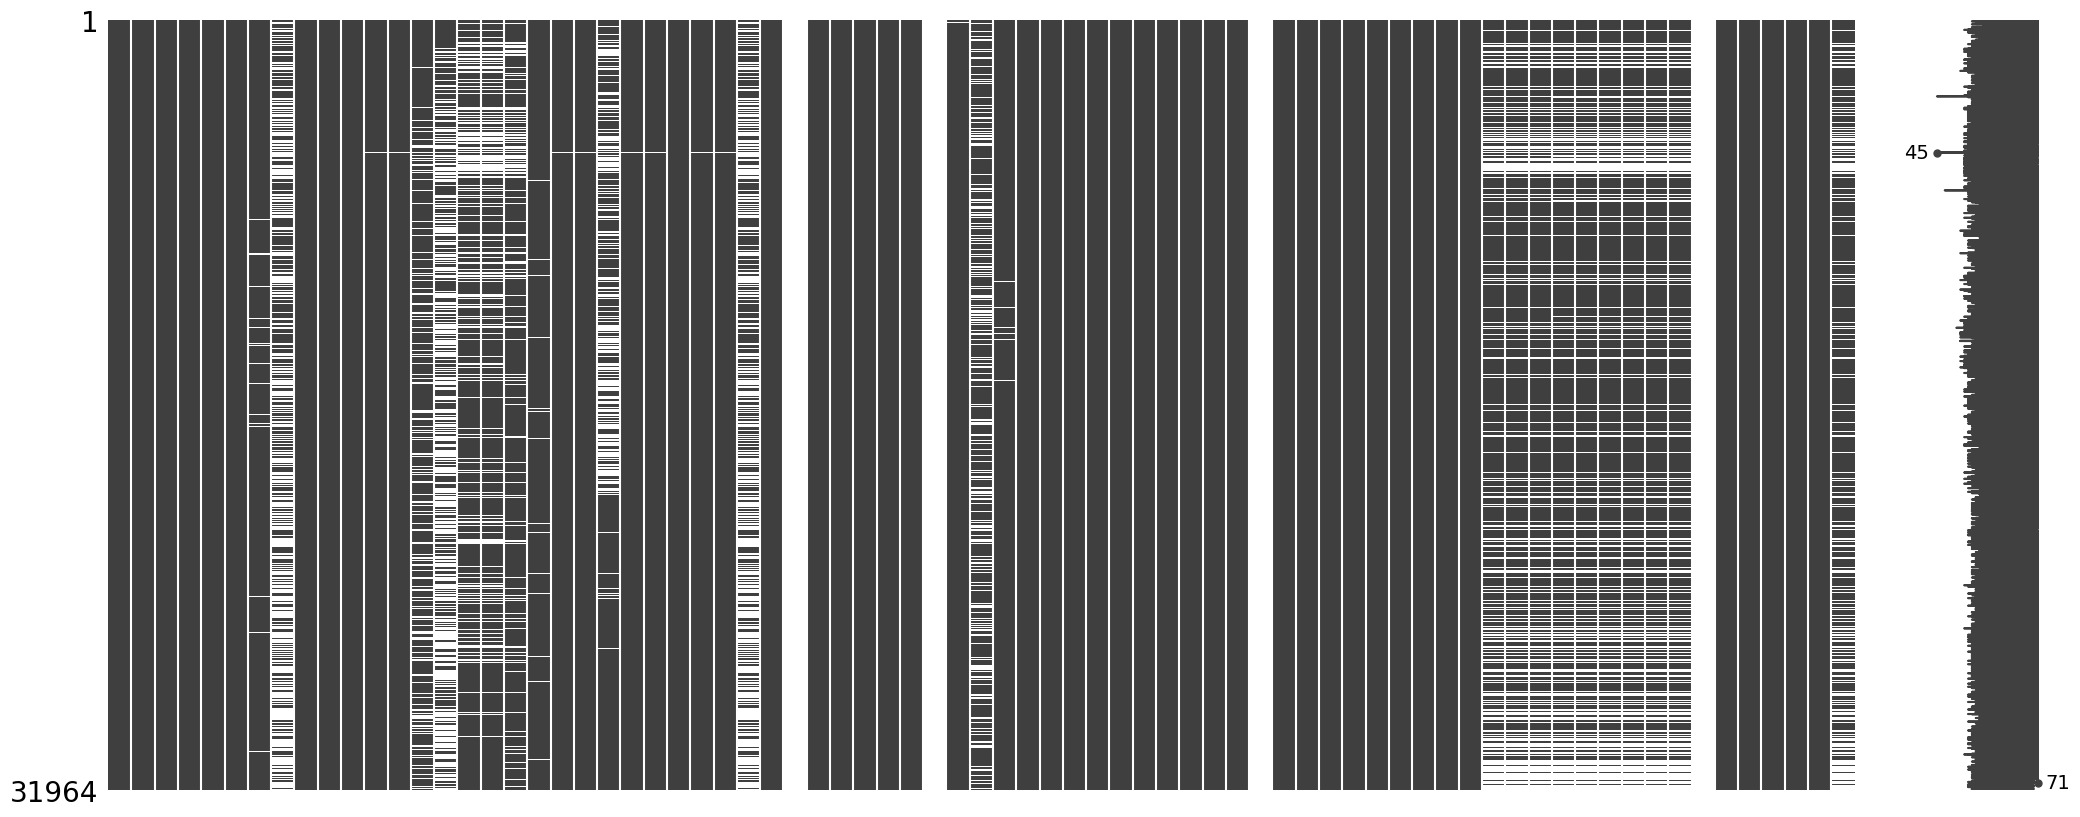

In [ ]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(ds)

Notem que essa visualização confirma informações obtidas nas seções anteriores, sobre variáveis sem dados e variáveis com preenchimento parcial.

## 4 Pré-Processamento

Essa seção contemplará ações de limpeza dos dados, enriquecimento e preparação do dataset para etapas futuras.

Dados que não agregam valor para a resolução do problema proposto serão descartados e outros dados poderão ser adicionados, se contribuirem para uma melhor interpretação do dataset e para melhor tratarmos o problema. Farei uma abordagem inicial de *feature selection*.

Os detalhamentos sobre cada uma destas etapas aparecerão nas seções seguintes.


### 4.1 Definição da variável alvo

Incluí essa seção logo no início da etapa de pré-processamento para evitar o risco de descartar alguma variável que seja útil para o estabelecimento da variável alvo, ainda inexistente.

A variável alvo proposta na definição do problema é a taxa de ocupação da acomodação. Uma taxa de ocupação é calculada com uma relação que divide o uso pela disponibilidade. Se um bem está disponível por 10 minutos e é usado por 9, sua taxa de uso é de 90%. Como as reservas das acomodações acontecem com contagem de dias, é natural que pensemos em usar o dia como unidade de contagem.

Notem que calcular uma taxa de ocupação envolve olhar para o passado. Eu preciso analisar a disponibilidade no passado e a utilização no passado para fazer a conta.

O melhor dado presente no dataset que entrega informações de uso da acomodação no passado é a quantidade de reviews.

Existem 4 variáveis que posso considerar:

| Variáveis | Descrição |
|-----------|-----------|
|number_of_reviews | Número total de reviews da acomodação |
|number_of_reviews_ltm | Número total de reviews nos últimos 12 meses |
|number_of_reviews_l30d | Número total de reviews nos últimos 30 dias |
|reviews_per_month | Número de reviews por mês durante todo o período de existência da acomodação na plataforma |

Descarto number_of_reviews pois é uma variável que vai exigir uma análise usando o período de existência de cada acomodação o que pode envolver tanto períodos muito curtos como períodos muito longos, agregando muita influência de sazonalidade e outros fatores temporais não controlados no resultado. Também descarto reviews_per_month pelos mesmos motivos.

Dentre **number_of_reviews_ltm** e number_of_reviews_l30d, entendo que a primeira contempla um horizonte de tempo mais significativo e abrangente, de 12 meses, para o resultado esperado. Cobre as quatro estações do ano e períodos de alta e baixa temporada de turismo, além de ser um horizonte de tempo razoável para entender qualquer comportamento diferenciado nos dados, caso apareça.

No meu entendimento esse é o melhor dado que podemos usar para inferir a taxa de ocupação das acomodações mas não podemos nos esquecer de que escrever o review não é uma ação obrigatória para os hóspedes então a relação entre estadias e quantidades de reviews não é 1 para 1.

Analisarei em mais detalhe essa variável numa seção posterior ainda aqui na seção de pré-processamento.


### 4.2 Redução de dimensionalidade

Farei algumas ações de *feature selection* com o objetivo não só de simplificar esse trabalho mas também de buscar eficiência computacional no tratamento dos dados.

Antes de iniciar as ações de redução de dimensionalidade, eu proponho uma análise qualitativa em relação ao dataset e uma organização da informação segundo uma visão de entidades relevantes.

Essa modelagem conceitual organiza os atributos segundo as entidades: **Acomodação**, **Localização da Acomodação**, **Anfitrião** e **Outros**.

<br>

Acomodação  | Localização da Acomodação | Anfitrião | Outros
-------------------|------------------|------------------|------------------
id                 |neighborhood_overview| host_id  |    scrape_id              
listing_url        | neighbourhood |  host_url    | last_scraped
name               | neighbourhood_cleansed |   host_name |       source      
description        |neighbourhood_group_cleansed| host_since |
picture_url             | latitude | host_location
property_type           | longitude |    host_about              
room_type               |     |   host_response_time                
accommodates            |     |    host_response_rate              
bathrooms               |     |   host_acceptance_rate           
bathrooms_text          |     |    host_is_superhost         
bedrooms                |     |   host_thumbnail_url       
beds                    |     |  host_picture_url      
amenities               |     |   host_neighbourhood    
price                   |     |    host_listings_count
minimum_nights          |     |    host_total_listings_count
maximum_nights          |     |  host_verifications
minimum_minimum_nights  |     |   host_has_profile_pic        
maximum_minimum_nights  |     |     host_identity_verified    
minimum_maximum_nights  |     |   calculated_host_listings_count    
maximum_maximum_nights  |     |   calculated_host_listings_count_entire_homes  
minimum_nights_avg_ntm  |     | calculated_host_listings_count_private_rooms
maximum_nights_avg_ntm  |     | calculated_host_listings_count_shared_rooms
calendar_updated        |       
has_availability        |       
availability_30         |                         
availability_60         |                        
availability_90         |                        
availability_365        |                        
calendar_last_scraped   |                       
number_of_reviews       |                        
number_of_reviews_ltm   |                        
number_of_reviews_l30d  |                        
first_review            |                         
last_review             |                         
review_scores_rating    |                        
review_scores_accuracy  |                        
review_scores_cleanliness |                      
review_scores_checkin    |                       
review_scores_communication |                    
review_scores_location      |                   
review_scores_value         |                    
license                     |                    
instant_bookable            |                     
reviews_per_month |


Incluo também um trecho de código para inicializar um dataset em separado para sofrer as operações de limpeza, mantendo o dataset original com seus dados.

In [ ]:
# criação de um novo dataset para executar as operações de limpeza
# recuperando os nomes das colunas
col = list(ds.columns)

# o novo dataset irá conter todas as colunas do dataset original
ds_cleansed = ds[col[:]]

#### 4.2.1 Redução de dimensionalidade da entidade Acomodação

Removendo colunas que não contém dados.

In [ ]:
# removendo as colunas bathrooms, calendar_updated e license pois
# não contém dados
ds_cleansed.drop([BATHROOMS, CALENDAR_UPDATED, LICENSE], axis=1, inplace= True)

Removendo a coluna **id** por não contribuir para a análise e a estatística do dataset.

In [ ]:
# removendo id
ds_cleansed.drop([ID], axis=1, inplace= True)

Removendo coluna **name**, que se refere a um título dado para a acomodação, por que é um dado presente em todas as instâncias e a diferenciação da qualidade do preenchimento desse título exigiria uma esforço com uso de técnicas de processamento de linguagem natural que não são escopo desse trabalho.

In [ ]:
# removendo name
ds_cleansed.drop([NAME], axis=1, inplace= True)

Eu poderia usar duas abordagens para considerar a coluna **description** como influenciadora da variável alvo de taxa de ocupação.

1. Uma acomodação com description preenchida provavelmente teria uma taxa de
ocupação melhor do que uma com esse dado vazio. No entanto, quase a totalidade do dataset tem esse valor preenchido (31305 de 31964) então usar essa técnica não traria tanto benefício.
2. Outra possibilidade seria fazer uma avaliação qualitativa do texto escrito, com técnicas de processamento de linguagem natural, para transformar esse texto num dado categorizado e ordenado

Opto por remover a coluna description por questões de simplificação da análise e do trabalho.

In [ ]:
# removendo description
ds_cleansed.drop([DESCRIPTION], axis=1, inplace= True)

Removo a coluna **picture_url** e faço considerações similares aquelas feitas para description. Poderíamos usar técnicas mais avançadas de visão computacional para a avaliação da imagem mas não faz parte do escopo desse trabalho.

In [ ]:
# removendo picture_url
ds_cleansed.drop([PICTURE_URL], axis=1, inplace= True)

As variáveis relacionadas aos valores mínimo e máximo de dias para uma reserva de hospedagem na acomodação são: **minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm e maximum_nights_avg_ntm**. Enquanto as duas primeiras são valores padrão para a acomodação, as outras são valores configurados pelo anfitrião para datas futuras no calendário.

Por questões de simplificação, vou manter no dataset apenas os valores padrão da acomodação removendo as outras.


In [ ]:
# removendo minimum_minimum_nights, maximum_minimum_nights,
# minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm,
# maximum_nights_avg_ntm
ds_cleansed.drop([MINIMUM_MINIMUM_NIGHTS, MAXIMUM_MINIMUM_NIGHTS,\
                  MINIMUM_MAXIMUM_NIGHTS, MAXIMUM_MAXIMUM_NIGHTS,\
                  MINIMUM_NIGHTS_AVG_NTM, MAXIMUM_NIGHTS_AVG_NTM], axis=1,\
                  inplace= True)

Existem variáveis no dataset que informam sobre disponibilidade de reserva para a acomodação. São elas: **has_availability, availability_30, availability_60, availability_90 e availability_365**.

Enquanto a primeira indica apenas se há ou não disponibilidade independente do horizonte de tempo, as subsequentes indicam a quantidade de dias disponíveis no horizonte de tempo mencionado no próprio nome da variável.

A princípio imagino que todas as acomodações estariam disponíveis para reserva mas uma análise simples nesse dado mostra que isso não é verdade.


In [ ]:
# Verifica a distribuição para a variável has_availability
ds_cleansed.groupby('has_availability').size()

has_availability
f     1024
t    30940
dtype: int64

Podemos observar que existem acomodações que não tem disponibilidade de reserva. Isso poderia acontecer por serem casos de super sucesso onde hóspedes já pegaram todas as datas disponíveis ou simplesmente pelo fato do anfitrião não querer disponibilizar a acomodação naquele momento. Eu apostaria bem mais no segundo cenário.

Como a informação do porquê da indisponibilidade não está presente e as possíveis motivações para ela são completamente antagônicas para influência de taxa de ocupação, eu opto por remover essas instâncias do dataset.

In [ ]:
# removendo instâncias
ds_cleansed = ds_cleansed.query("has_availability != 'f'")

O mesmo racional vale para as outras variáveis relacionadas à disponibilidade em períodos de tempo futuro. Pode não haver disponibilidade simplesmente por que hóspedes já fizeram reserva para vários dias do calendário da acomodação ou por que o anfitrião opta por abrir disponibilidade em períodos específicos. O primeiro seria ótimo para inferir uma taxa de ocupação alta mas o segundo cenário seria péssimo, com a inferência acontecendo de maneira errada.

Portanto, vou remover essas variáveis do dataset, para não haver contaminação.

In [ ]:
# removendo has_availability, availability_30, availability_60,
# availability_90, availability_365
ds_cleansed.drop([HAS_AVAILABILITY, AVAILABILITY_30, AVAILABILITY_60,\
                  AVAILABILITY_90, AVAILABILITY_365], axis=1, inplace= True)

A variável **calendar_last_scraped** serve apenas para indicar o momento em que o calendário foi analisado para que fossem encontrados os valores de disponibilidade da acomodação em datas futuras. Não agrega na análise estatística e portanto será removida.

In [ ]:
# removendo calendar_last_scraped
ds_cleansed.drop([CALENDAR_LAST_SCRAPED], axis=1, inplace= True)

As variáveis relacionadas a quantidade absoluta de reviews, datas de primeiro e último review e frequência são: **number_of_reviews, number_of_reviews_ltm number_of_reviews_l30d, first_review, last_review e reviews_per_month**.

Entendo que a quantidade absoluta de reviews (**number_of_reviews**) pode influenciar na decisão de um hóspede em fazer uma reserva e por isso vou **manter** essa variável.

A quantidade de reviews no último ano (**number_of_reviews_ltm**) será usada para cálculo da variável alvo e por isso será **mantida**. Importante notar que todas as instâncias tem valor preenchido para essa variável e por isso não foi necessária uma ação de limpeza de instâncias.

A quantidade de reviews nos últimos 30 dias (**number_of_reviews_l30d**) pode ser um indicativo indireto de mais probabilidade de alta taxa de ocupação e por isso vou **manter** essa variável.

Vou assumir que data do primeiro review (**first_review**) é pouco relevante para taxa de ocupação e vou **remover** essa variável, ao contrário da data do último review (**last_review**), que pode ser considerado como um dado importante para decisão do hóspede em fazer a reserva, e portanto **manterei** esta última.

Já a variável de reviews por mês (**reviews_per_month**) pode ser útil para o cálculo de data de registro da acomodação na plataforma Airbnb, já que esse dado não está presente no dataset. Portanto manterei por enquanto essa variável no dataset.





In [ ]:
# removendo first_review
ds_cleansed.drop([FIRST_REVIEW], axis=1, inplace= True)

Existe outro grupo de variáveis relacionado ao tema de review mas desta vez elas representam de fato um valor númerico de pontuação da acomodação. São números que indicam qualitativamente como os hóspedes avaliaram a acomodação. São elas: **review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location e review_scores_value**.

É bem razoável considerarmos que a avaliação em pontos de uma acomodação influencia diretamente na sua taxa de ocupação.

No entanto, enquanto a variável review_scores_rating traz um valor numérico já sumarizado de todos os quesitos de avaliação, as outras variáveis trazem pontuações para critérios específicos.

Nesse trabalho, vou optar por usar apenas essa variável sumarizada eliminando as outras. Ficará como trabalho futuro uma análise mais aprofundada dentro das pontuações específicas se essa variável sumarizada se mostrar bastante significativa para a taxa de ocupação.


In [ ]:
# removendo review_scores_accuracy, review_scores_cleanliness,
# review_scores_checkin, review_scores_communication, review_scores_location
# e review_scores_value.
ds_cleansed.drop([REVIEW_SCORES_ACCURACY, REVIEW_SCORES_CLEANLINESS,\
                  REVIEW_SCORES_CHECKIN, REVIEW_SCORES_COMMUNICATION,\
                  REVIEW_SCORES_LOCATION, REVIEW_SCORES_VALUE],\
                  axis=1, inplace= True)

A última variável para a entidade Acomodação é a **instant_bookable**. Ela indica se a acomodação aceita reserva imediata sem necessidade de revisão do anfitrião.

Entendo que é um fator que pode influenciar na taxa de ocupação e por isso **manterei** essa variável no dataset.



#### 4.2.2 Redução de dimensionalidade da entidade Localização da Acomodação

Removendo colunas que não contém dados.

In [ ]:
# removendo a coluna neighbourhood_group_cleansed
ds_cleansed.drop([NEIGHBOURHOOD_GROUP_CLEANSED], axis=1, inplace= True)

A variável **neighborhood_overview** inclui um texto escrito pelo próprio anfitrião onde ele tem a opção de descrever o bairro onde se localiza a acomodação.

Ao analisar o dataset, podemos ver que 16739 instâncias tem essa variável preenchida, ou seja, aproximadamente metade do dataset.

Eu vou **manter** essa variável **transformando-a num booleano** que indica se o texto foi preenchido ou não. Estou assumindo que o esforço de preenchimento desse texto pode influenciar na taxa de ocupação da acomodação e portanto quero considerar isso na análise do trabalho. Poderia fazer também a análise do texto envolvendo processamento de linguagem natural mas isso traria muita complexidade para esse trabalho, então descarto essa abordagem.


A variável **neighbourhood** está parcialmente preenchida no dataset e além disso, quando preenchida, carrega o nome da cidade do Rio de Janeiro. Como nossa análise já considera que todas as instâncias são do Rio de Janeiro, essa variável acaba ficando incompleta e irrelevante para a análise e por isso pode ser removida. A decisão de remoção também está baseada no fato de que existe outra variável que informa sobre bairro.

In [ ]:
# removendo a coluna neighbourhood
ds_cleansed.drop([NEIGHBOURHOOD], axis=1, inplace= True)

A variável **neighbourhood_cleansed** tem todas as suas instâncias com valores preenchidos e traz a informação de bairro a partir de um cálculo feito com os dados de latitude e longitude. Essa variável é muito importante para a análise proposta e será mantida.

As variáveis ***latitude*** e ***longitude*** trazem no detalhe a localização da acomodação e foram importantes para a definição clara do bairro (o dataset veio já com esse cálculo feito). No entanto, não fará parte do escopo desse trabalho fazer uma análise usando uma granularidade de localização mais precisa do que bairro. Além disso, não pretendo usar essas variáveis para nenhuma visualização com recurso de mapas. Portanto, para redução e simplificação do dataset, também opto pela remoção dessas variáveis.


In [ ]:
# removendo as colunas latitude e longitude
ds_cleansed.drop([LATITUDE, LONGITUDE], axis=1, inplace= True)

#### 4.2.3 Redução de dimensionalidade da entidade Anfitrião

**Removendo** **host_id** e **host_url** por que não contribuem estatisticamente para atuar com o problema proposto.

In [ ]:
# removendo as colunas host_id e host_url
ds_cleansed.drop([HOST_ID, HOST_URL], axis=1, inplace= True)

A coluna **host_name** contém o nome de uma pessoa e por questões de privacidade de dados, estou **removendo** essa variável.

Esse dado até poderia ser considerado como influenciador do processo de decisão do hóspede uma vez que nomes mais familiares para a nacionalidade da pessoa podem soar mais próximos e amigáveis, ou mesmo trazer um entendimento de que falam o mesmo idioma. No entanto, opto por descartar para atender requisito de privacidade.




In [ ]:
# removendo a coluna host_name
ds_cleansed.drop([HOST_NAME], axis=1, inplace= True)

Vou **manter** a variável **host_since** pelo entendimento de que anfitriões mais antigos podem ter mais habilidade nas decisões de gestão da acomodação fazendo com que a taxa de ocupação melhore.

Verificando o preenchimento de **host_location** e **host_neighbourhood**.

In [ ]:
ds_cleansed['host_location'].value_counts().head(15)

Rio de Janeiro, Brazil             18994
State of Rio de Janeiro, Brazil     1747
Rio, Brazil                          872
Brazil                               585
São Paulo, Brazil                    562
Brasília, Brazil                     100
Belo Horizonte, Brazil                99
Niterói, Brazil                       82
Porto Alegre, Brazil                  52
New York, NY                          51
London, United Kingdom                46
Paris, France                         45
Petrópolis, Brazil                    40
Armação dos Búzios, Brazil            38
State of São Paulo, Brazil            37
Name: host_location, dtype: int64

In [ ]:
ds_cleansed['host_neighbourhood'].value_counts().head(30)

Copacabana                  7369
Barra da Tijuca             2568
Ipanema                     2448
Leblon                      1106
Recreio dos Bandeirantes    1083
Botafogo                     974
Santa Teresa                 671
Jacarepaguá                  597
Centro                       574
Flamengo                     492
Leme                         425
Tijuca                       310
Laranjeiras                  294
Vidigal                      270
Lapa                         264
São Conrado                  258
Glória                       212
Moema                        131
Gávea                        131
Catete                       129
Lagoa                        128
Camorim                      121
Jardim Botânico              114
Humaitá                      112
Itanhangá                    107
Vila Isabel                   90
Barra de Guaratiba            89
Urca                          88
Joá                           85
Curicica                      81
Name: host

Vou **manter, por enquanto**, **host_location** e **host_neighbourhood** por entender que uma proximidade do anfitrião com a localização da acomodação pode trazer facilidades logísticas de administração e isso influenciaria positivamente na taxa de ocupação.



A variável **host_about** é um descrição preenchida pelo próprio anfitrião sobre ele ou ela mesmos. Cerca de metade das instâncias tem valores preenchidos para esta variável. Entendo que isso funciona como uma apresentação e melhora as relações humanas entre hóspede e anfitrião, influenciando na decisão do hóspede.

Mais uma vez, eu poderia usar uma técnica de processamento de linguagem natural para avaliar o preenchimento desse campo mas vou fazer apenas uma diferenciação entre estar preenchido ou não. Portanto, **mantenho** essa variável no dataset.

A variável **host_response_time**	é uma variável categórica ordenada e as variáveis **host_response_rate**	e **host_acceptance_rate** são variáveis numéricas. Considero todas elas relevantes para influenciar na taxa de ocupação da acomodação e por isso vou **mantê-las**.

Segundo o próprio Airbnb, Superhosts [são anfitriões de mais alto desempenho](https://www.airbnb.com.br/help/article/829). A variável **host_is_superhost** é um booleano que traz essa informação e provavelmente tem influência na taxa de ocupação. Vou **manter** essa variável no dataset.

As variáveis **host_thumbnail_url**	e **host_picture_url** estão preenchidas para praticamente todas as instâncias do dataset. A variável **host_has_profile_pic** deriva de host_picture_url. Por questões de simplificação e também por entender que uma foto do anfitrião envolve questões de privacidade de dados, opto por **remover** essas variáveis.

In [ ]:
# removendo as colunas host_thumbnail_url, host_picture_url e
# host_has_profile_pic
ds_cleansed.drop([HOST_THUMBNAIL_URL, HOST_PICTURE_URL, HOST_HAS_PROFILE_PIC],\
                 axis=1, inplace= True)

As variáveis **host_listings_count**, **host_total_listings_count**, **calculated_host_listings_count**, **calculated_host_listings_count_entire_homes**, **calculated_host_listings_count_private_rooms** e **calculated_host_listings_count_shared_rooms** trazem dados sobre a quantidade e o tipo de acomodações sob responsabilidade de um anfitrião. As duas primeiras são informações provenientes do próprio Airbnb enquanto as restantes são calculadas no processo de scrapping de dados do site Inside Airbnb.

Eu vou considerar que essa métrica é relevante para influenciar em taxa de ocupação supondo que a habilidade do anfitrião melhora com acomodações a mais para serem administradas mas passa a piorar a partir de algum ponto de inflexão, se não existir uma equipe para trabalhar em conjunto na administração.

Por questões de simplificação, opto por selecionar e **manter** apenas a variável **host_total_listings_count**, proveniente do Airbnb, como a representante desse conjunto de dados.

Então eu removo as variáveis restante desse conjunto.






In [ ]:
# removendo as colunas host_listings_count, calculated_host_listings_count,
# calculated_host_listings_count_entire_homes,
# calculated_host_listings_count_private_rooms e
# calculated_host_listings_count_shared_rooms
ds_cleansed.drop([HOST_LISTINGS_COUNT, CALCULATED_HOST_LISTINGS_COUNT,\
                  CALCULATED_HOST_LISTINGS_COUNT_ENTIRE_HOMES,\
                  CALCULATED_HOST_LISTINGS_COUNT_PRIVATE_ROOMS,\
                  CALCULATED_HOST_LISTINGS_COUNT_SHARED_ROOMS],\
                  axis=1, inplace= True)

Analisando host_verifications:

In [ ]:
ds_cleansed[HOST_VERIFICATIONS].value_counts()

['email', 'phone']                    24637
['phone']                              3783
['email', 'phone', 'work_email']       2367
['phone', 'work_email']                 110
['email']                                30
[]                                       11
['email', 'work_email']                   1
['email', 'phone', 'photographer']        1
Name: host_verifications, dtype: int64

Por questões de simplificação, vou assumir que essa variável não é relevante para influenciar na taxa de ocupação e portanto, opto por removê-la.

In [ ]:
# removendo a coluna host_verifications
ds_cleansed.drop([HOST_VERIFICATIONS], axis=1, inplace= True)

Analisando 	host_identity_verified

In [ ]:
ds_cleansed[HOST_IDENTITY_VERIFIED].value_counts()

t    25023
f     5917
Name: host_identity_verified, dtype: int64

A [verificação de identidade](https://www.airbnb.com/help/article/1237#section-heading-9-0) é um processo importante para a plataforma Airbnb e as pessoas que passaram por esse processo ganham um badge, o que aumenta o seu nível de credibilidade. Portanto, vou considerar a variável **host_identity_verified** como relevante para taxa de ocupação e portanto, opto por **mantê-la**.

#### 4.2.4 Redução de dimensionalidade da entidade Outros

A entidade Outros é apenas um agrupamento de variáveis que considerei não significativas para influenciar na taxa de ocupação e que tem mais relação com o processo de captura de dados.

Com isso, opto por removê-las do dataset.

In [ ]:
# removendo as colunas scrape_id, last_scraped e source
ds_cleansed.drop([SCRAPE_ID, LAST_SCRAPED, SOURCE], axis=1, inplace= True)

#### 4.2.5 Análise após ações de redução de dimensionalidade

Verificando agora como ficaram as dimensões do dataset após as ações de limpeza.

In [ ]:
# Análise de dimensões do dataset
print('Quantidade de linhas e quantidade de colunas:' , ds_cleansed.shape)

Quantidade de linhas e quantidade de colunas: (30940, 30)


Notem que a quantidade de instâncias diminiui devido à ação de limpeza feita com as acomodações com reservas indisponíveis.

A quantidade de variáveis também diminuiu significativamente, saindo de um total de 75 para 30.

A variável listing_url ainda foi mantida para ser utilizada caso alguma acomodação tenha que ser identificada unicamente. Outras variáveis também foram mantidas para possível uso em conversão de dados.



Numa visão tabular e de acordo com a análise baseada em entidades, o dataset ficou assim:

<br>

Acomodação         | Localização da Acomodação | Anfitrião
-------------------|------------------------|------------------
listing_url*       | neighborhood_overview  | host_since                
property_type      | neighbourhood_cleansed | host_location
room_type          |                        | host_about           
accommodates       |                        | host_response_time
bathrooms_text     |                        | host_response_rate
bedrooms           |                        | host_acceptance_rate                 
beds               |                        | host_is_superhost  
amenities          |                        | host_neighbourhood
price              |                        | host_total_listings_count
minimum_nights     |                        | host_identity_verified
maximum_nights     |                        |          
number_of_reviews  |                        |        
number_of_reviews_ltm |                     |       
number_of_reviews_l30d |                    |     
last_review        |                        |    
review_scores_rating |                      |  
instant_bookable   |                        |           
reviews_per_month  |                        |         
  

E agora mais uma vez a visão matricial do dataset.

<Axes: >

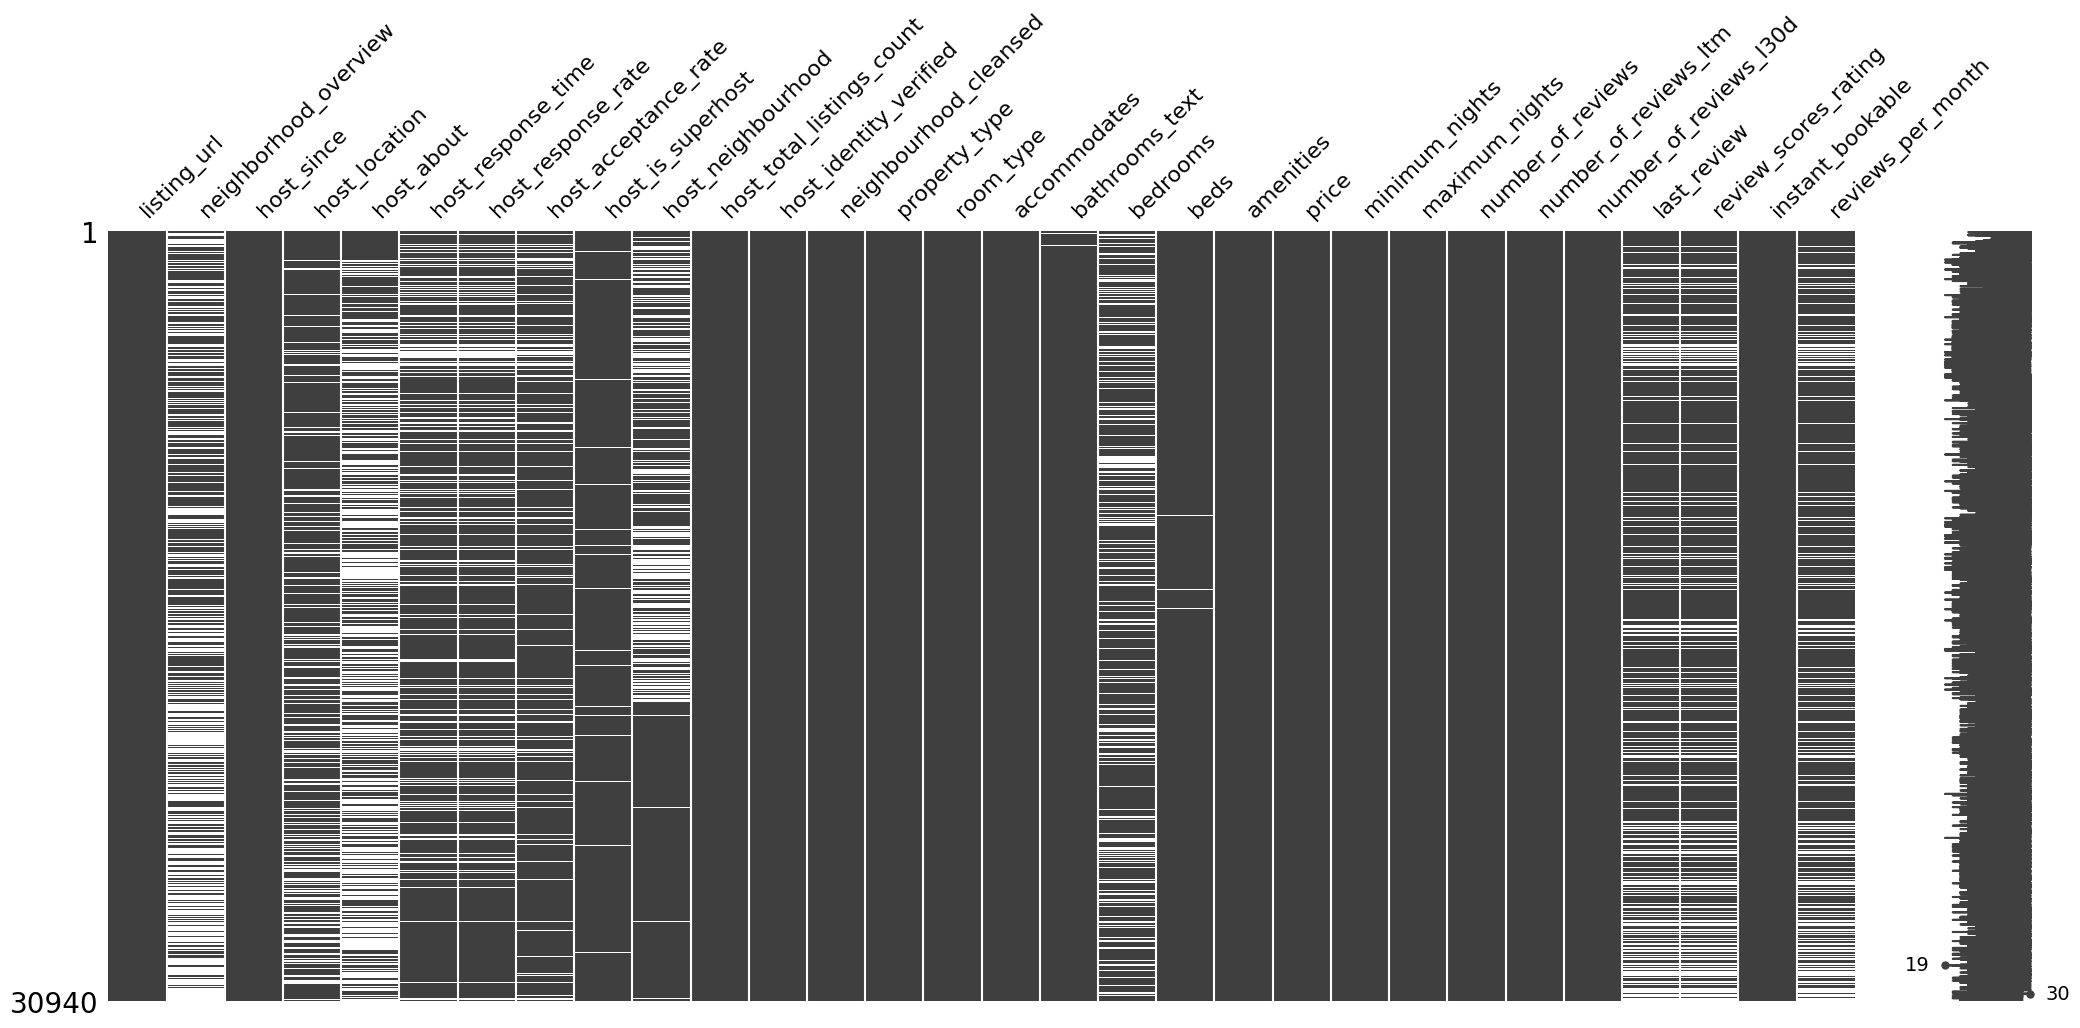

In [ ]:
ms.matrix(ds_cleansed)

Notem que já não existem as colunas sem dados e que a quantidade de colunas é bem menor, permitindo a geração do gráfico com a presença do nome de cada variável. Fica mais claro de visualizar também as variáveis parcialmente preenchidas.

### 4.3 Tratamento de missings, limpeza e conversão de dados

Essa seção visa agrupar todas as ações a serem executadas no dataset para garantir a completude e a qualidade do mesmo. Alguns dos problemas que devem ser tratados nesta etapa do pré-processamento podem ser: alinhamento de unidades de medida, preenchimento de valores faltantes, acerto de valores inconsistentes ou adaptação de intervalores de valores. Usarei técnicas de *feature engineering* como extração de características e construção de recursos para capturar informações importantes.


Criarei um novo dataset para essa etapa, mantendo os datasets anteriores inalterados a partir daqui.

In [ ]:
# criação de um novo dataset para executar as operações de tratamento
# recuperando os nomes das colunas
col_cleansed = list(ds_cleansed.columns)

# o novo dataset irá conter todas as colunas do dataset original
ds_treated = ds_cleansed[col_cleansed[:]]

#### 4.3.1 Análise inicial e planejamento

Repito aqui uma análise básica de metadados para percepções introdutórias.

In [ ]:
# Exibir os tipos de dados de todas as variáveis
print(ds_treated.dtypes)

listing_url                   object
neighborhood_overview         object
host_since                    object
host_location                 object
host_about                    object
host_response_time            object
host_response_rate            object
host_acceptance_rate          object
host_is_superhost             object
host_neighbourhood            object
host_total_listings_count    float64
host_identity_verified        object
neighbourhood_cleansed        object
property_type                 object
room_type                     object
accommodates                   int64
bathrooms_text                object
bedrooms                     float64
beds                         float64
amenities                     object
price                         object
minimum_nights                 int64
maximum_nights                 int64
number_of_reviews              int64
number_of_reviews_ltm          int64
number_of_reviews_l30d         int64
last_review                   object
r

Já podemos perceber grande oportunidade de ajuste de tipagem de dados.

In [ ]:
# Analisando a completude de dados de cada variável
ds_treated.count()

listing_url                  30940
neighborhood_overview        16385
host_since                   30940
host_location                25098
host_about                   15553
host_response_time           25121
host_response_rate           25121
host_acceptance_rate         26902
host_is_superhost            30287
host_neighbourhood           23382
host_total_listings_count    30940
host_identity_verified       30940
neighbourhood_cleansed       30940
property_type                30940
room_type                    30940
accommodates                 30940
bathrooms_text               30919
bedrooms                     23894
beds                         30777
amenities                    30940
price                        30940
minimum_nights               30940
maximum_nights               30940
number_of_reviews            30940
number_of_reviews_ltm        30940
number_of_reviews_l30d       30940
last_review                  23630
review_scores_rating         23630
instant_bookable    

Também podemos perceber a necessidade de ações para complementação do dataset eliminando a existência de valores nulos.

Repito aqui a visão tabular de entidades pois farei as ações de ajuste no dataset nesta seção organizando essas ações por entidade.

<br>

Acomodação         | Localização da Acomodação | Anfitrião
-------------------|------------------------|------------------
listing_url*       | neighborhood_overview  | host_since                
property_type      | neighbourhood_cleansed | host_location
room_type          |                        | host_about           
accommodates       |                        | host_response_time
bathrooms_text     |                        | host_response_rate
bedrooms           |                        | host_acceptance_rate                 
beds               |                        | host_is_superhost  
amenities          |                        | host_neighbourhood
price              |                        | host_total_listings_count
minimum_nights     |                        | host_identity_verified
maximum_nights     |                        |          
number_of_reviews  |                        |        
number_of_reviews_ltm |                     |       
number_of_reviews_l30d |                    |     
last_review        |                        |    
review_scores_rating |                      |  
instant_bookable   |                        |           
reviews_per_month  |                        |         

#### 4.3.2 Tratamentos na entidade Acomodação

##### Property Type e Room Type

Analisando valores da variável property_type.

In [ ]:
# verificando valores para variável property_type
ds_treated[PROPERTY_TYPE].value_counts()

Entire rental unit                    18671
Private room in rental unit            3653
Entire condo                           1853
Entire home                            1448
Private room in home                   1072
Entire serviced apartment               810
Entire loft                             763
Private room in condo                   407
Private room in bed and breakfast       269
Room in hotel                           218
Shared room in rental unit              186
Shared room in home                     153
Private room in guest suite             116
Entire guesthouse                       104
Room in aparthotel                       99
Entire villa                             98
Private room in serviced apartment       87
Private room in guesthouse               74
Shared room in bed and breakfast         61
Entire guest suite                       60
Shared room in hostel                    60
Entire vacation home                     49
Private room in casa particular 

Analisando valores da variável room_type.

In [ ]:
# verificando valores para variável room_type
ds_treated[ROOM_TYPE].value_counts()

Entire home/apt    24155
Private room        6203
Shared room          539
Hotel room            43
Name: room_type, dtype: int64

Ao observar que a variável property_type traz informações mais detalhadas sobre as acomodações e a variável room_type traz informações mais alinhadas com uma visão de categorias e mais simples, opto por remover a coluna property_type, usando apenas room_type. As descrições presentes em property_type, quando específicas, atendem as necessidades de hóspedes que buscam experiências especiais. Esses dados entram num nível de granularidade não necessário para o escopo desse trabalho. As categorias presentes em room_type são mais bem alinhadas com o que se busca nesse notebook.

In [ ]:
# removendo a coluna property_type
ds_treated.drop([PROPERTY_TYPE], axis=1, inplace= True)

##### Accomodates

Essa coluna está totalmente preenchida e o tipo de dado está definido corretamente, como um dado numérico. Por enquanto não farei nenhuma ação de ajuste nessa variável.

##### Bathrooms

Segundo o dicionário de dados do site Inside Airbnb, o Airbnb mudou o campo de banheiros para o formato texto. A coluna bathrooms_text traz essa informação.

In [ ]:
# verificando valores para variável bathrooms_text
ds_treated['bathrooms_text'].value_counts()

1 bath               13806
2 baths               6089
1 shared bath         2254
1 private bath        1883
1.5 baths             1629
3 baths               1545
2.5 baths             1051
2 shared baths         471
1.5 shared baths       401
3.5 baths              398
4 baths                365
4.5 baths              154
5 baths                142
5.5 baths               89
6 baths                 87
2.5 shared baths        77
3 shared baths          71
7 baths                 52
6.5 baths               43
4 shared baths          38
0 baths                 34
Half-bath               34
8 baths                 33
0 shared baths          24
7.5 baths               23
3.5 shared baths        20
Shared half-bath        17
5 shared baths          13
4.5 shared baths        12
11 baths                 8
9 baths                  7
10 baths                 6
7 shared baths           6
8.5 baths                5
6 shared baths           5
8 shared baths           4
11.5 baths               3
9

Notem que existem instâncias do dataset que informam números não inteiros para indicar quantidade de banheiros e também há a indicação sobre banheiros compartilhados. Após uma breve pesquisa na internet ([link](https://airbnbtales.com/shared-bathroom/#:~:text=The%20%E2%80%9C.,be%20handy%20for%20quick%20visits.)), encontrei respostas indicando que esse é um conceito do mercado de imóveis de algumas regiões, como nos EUA. Uma indicação de 1.5, por exemplo, indicaria que existe um banheiro completo com chuveiro/banheira, vaso sanitário e pia e mais outro apenas com vaso sanitário e pia. Também encontrei links que sinalizam dificuldades dos anfitriões em informar corretamente esse dado, justamente por não conhecer o conceito ([link](https://community.withairbnb.com/t5/Help/Shared-bathroom-classification-1-5-or-ZERO/m-p/280614)).



Notem também que não seria correto eu fazer uma transformação direta dessa variável para numérico pois perderia bastante significado semântico do valor do campo. Uma acomodação do tipo quarto, que tem um banheiro exclusivo (suíte) tem atratividade bastante diferente de um quarto que oferece ao hóspede apenas um banheiro compartilhado.

Farei uma transformação nessa variável para buscar representar a disponibilidade de banheiros por hóspede e também considerarei o fato de ser compartilhado ou não, usando uma simplificação. Quero chegar num valor numérico que seja mais representativo para a atratividade de uma acomodação considerando a oferta de banheiros.

Quando não houver a palavra shared, vou assumir que a quantidade de banheiros declarada vai ser dividida pela quantidade de hóspedes aceitos. Sei que nem sempre as reservas são feitas usando o total de hóspedes aceitos mas vou assumir que essa relação é quase sempre adequada e estável.

Quando houver a palavra shared, vou fazer uma conta similar à anterior, com a diferença de que vou adicionar 1 ao valor total de hóspedes aceitos, para afetar negativamente o resultado numérico da equação nesse caso.

Alguns exemplos:

Banheiros | Hóspedes | Resultado
----------| -------- | ---------
1 bath | 1 | 1
1 bath | 2 | 0.5
1 bath | 3 | 0.33
2 baths | 2 | 1
2 baths | 4 | 0.5
1 shared bath | 1 | 0.5
1 shared bath | 2 | 0.33

As regras de negócios definidas acima foram inseridas na função get_bathrooms_index já declarada.

Vou criar uma nova coluna chamada baths_index que será usada para armazenar os valores numéricos segundo as regras definidas nessa seção e também vou criar uma nova coluna chamada baths_category que simplificará a leitura de categoria de banheiro, além de permitir verificar se aparecerá alguma diferença na métrica da taxa de ocupação de acordo com essas categorias.

Criando a nova coluna com o índice de banheiros.

In [ ]:
# criando uma nova coluna no dataset para registrar variável que represente
# o índice de banheiros
ds_treated[BATHS_INDEX] = ds_treated.apply(get_bathrooms_index, axis=1)

Criando uma nova coluna com as categorias de banheiro.

In [ ]:
# criando uma nova coluna no dataset para registrar variável que represente
# a categoria de banheiro
ds_treated[BATHS_CATEGORY] = ds_treated.apply(get_bathrooms_category, axis=1)

Agora faço uma análise estatística nas colunas recém criadas.

In [ ]:
ds_treated[BATHS_INDEX].describe()

count    30940.000000
mean         0.427410
std          0.243827
min          0.000000
25%          0.250000
50%          0.375000
75%          0.500000
max          8.000000
Name: baths_index, dtype: float64

In [ ]:
ds_treated[BATHS_CATEGORY].value_counts()

dedicated      27500
shared          3419
no_bathroom       21
Name: baths_category, dtype: int64

Agora vou remover a coluna bathrooms_text.

In [ ]:
# removendo a coluna bathrooms_text
ds_treated.drop([BATHROOMS_TEXT], axis=1, inplace= True)

##### Bedrooms

Analisando valores da coluna Bedrooms.

In [ ]:
# verificando valores para variável bedrooms
ds_treated[BEDROOMS].value_counts()

1.0     11966
2.0      7470
3.0      3270
4.0       750
5.0       253
6.0       111
7.0        35
8.0         9
9.0         7
10.0        7
11.0        3
25.0        3
16.0        3
12.0        2
13.0        2
26.0        1
15.0        1
22.0        1
Name: bedrooms, dtype: int64

In [ ]:
# verificando nulos da variável bedrooms
ds_treated[BEDROOMS].info()

<class 'pandas.core.series.Series'>
Int64Index: 30940 entries, 0 to 31963
Series name: bedrooms
Non-Null Count  Dtype  
--------------  -----  
23894 non-null  float64
dtypes: float64(1)
memory usage: 483.4 KB


Minha hipótese é que acomodações do tipo quarto não precisam informar quantidade de quartos e por isso várias instâncias não tem esse valor preenchido.

In [ ]:
# revisitando a quantidade de cada tipo de acomodação
ds_treated[ROOM_TYPE].value_counts()

Entire home/apt    24155
Private room        6203
Shared room          539
Hotel room            43
Name: room_type, dtype: int64

In [ ]:
# verificando a quantidade de quartos por tipo de acomodação quando existem
# valores preenchidos
contagem_nao_nulos = ds_treated.groupby(ROOM_TYPE)[BEDROOMS].count()

# verificando a quantidade de quartos por tipo de acomodação quando não
# existem valores preenchidos
contagem_nulos = ds_treated.groupby(ROOM_TYPE)[BEDROOMS]\
                                              .apply(lambda x: x.isnull().sum())

# Exibir os resultados
print("Contagem de bedrooms não nulos por categoria:")
print(contagem_nao_nulos)

print("\nContagem de bedrooms nulos por categoria:")
print(contagem_nulos)

Contagem de bedrooms não nulos por categoria:
room_type
Entire home/apt    22988
Hotel room            41
Private room         865
Shared room            0
Name: bedrooms, dtype: int64

Contagem de bedrooms nulos por categoria:
room_type
Entire home/apt    1167
Hotel room            2
Private room       5338
Shared room         539
Name: bedrooms, dtype: int64


Notem que a minha hipótese é parcialmente verdadeira visto que existem valores nulos da coluna bedrooms para todas as categorias.

Após analisar esses números, entendo que vale a pena preencher os valores não nulos com uma regra específica. Vou preencher com valor 1 para todas as categorias de room_type, exceto para a categoria Shared room. Quando a acomodação for dessa categoria, vou preencher com valores que representem frações, para o número também carregar a informação de que o quarto está sendo dividido. A fração vai ser calculada usando a quantidade de hóspedes.






A função que aplica as regras descritas acima já foi declarada.

Criando uma nova coluna com os valores ajustados para quartos.

In [ ]:
# criando uma nova coluna no dataset para registrar variável que represente o
# índice de banheiros
ds_treated[BEDROOMS_ADPT] = ds_treated.apply(get_bedrooms_adjusted_value,\
                                             axis=1)

Analisando valor originais para quartos.

In [ ]:
ds_treated[BEDROOMS].value_counts()

1.0     11966
2.0      7470
3.0      3270
4.0       750
5.0       253
6.0       111
7.0        35
8.0         9
9.0         7
10.0        7
11.0        3
25.0        3
16.0        3
12.0        2
13.0        2
26.0        1
15.0        1
22.0        1
Name: bedrooms, dtype: int64

Analisando novos valores.

In [ ]:
ds_treated[BEDROOMS_ADPT].value_counts()

1.000000     18685
2.000000      7470
3.000000      3270
4.000000       750
5.000000       253
6.000000       111
0.500000        92
0.250000        55
0.166667        37
0.333333        36
7.000000        35
0.062500        32
0.200000        25
0.125000        18
0.100000        10
8.000000         9
9.000000         7
10.000000        7
0.142857         7
0.083333         5
0.076923         4
0.111111         4
11.000000        3
25.000000        3
16.000000        3
0.071429         2
12.000000        2
13.000000        2
15.000000        1
26.000000        1
22.000000        1
Name: bedrooms_adpt, dtype: int64

Notem o incremento significativo na quantidade relativa a 1 quarto e o aparecimento de valores fracionados, dada a regra adotada.

Após comparar as colunas, vou remover a original.

In [ ]:
# removendo a coluna bedrooms
ds_treated.drop([BEDROOMS], axis=1, inplace= True)

##### Beds

Analisando coluna beds.

In [ ]:
# verificando valores para variável beds
ds_treated[BEDS].value_counts()

1.0     10457
2.0      9147
3.0      5263
4.0      2871
5.0      1340
6.0       777
7.0       269
8.0       252
9.0        93
10.0       88
12.0       44
11.0       39
14.0       24
16.0       24
15.0       17
13.0       16
17.0        8
50.0        5
18.0        5
35.0        4
30.0        4
23.0        3
20.0        3
26.0        2
24.0        2
25.0        2
28.0        2
22.0        2
38.0        1
27.0        1
91.0        1
43.0        1
44.0        1
56.0        1
46.0        1
29.0        1
31.0        1
78.0        1
21.0        1
39.0        1
40.0        1
41.0        1
Name: beds, dtype: int64

In [ ]:
# verificando nulos da variável beds
ds_treated[BEDS].info()

<class 'pandas.core.series.Series'>
Int64Index: 30940 entries, 0 to 31963
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
30777 non-null  float64
dtypes: float64(1)
memory usage: 483.4 KB


Existem algumas instâncias com valor nulo para quantidade de camas. Vou analisar a média de camas por room_type.

In [ ]:
# categorias que usarei para analisar a média de camas
# categorias = ['Entire home/apt','Private room','Shared room','Hotel room']
categorias_acomodacoes = ds_treated[ROOM_TYPE].unique()

# vou iterar pelas categorias e verificar a média de camas para cada uma
for cat in categorias_acomodacoes:
    print(f'Categoria: {cat}')
    df_filtrado = ds_treated[ds_treated[ROOM_TYPE].isin([cat])]
    estatisticas = df_filtrado[BEDS].describe()
    print(estatisticas)

Categoria: Entire home/apt
count    24056.000000
mean         2.689932
std          2.128234
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         91.000000
Name: beds, dtype: float64
Categoria: Private room
count    6145.000000
mean        1.558340
std         1.431676
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        50.000000
Name: beds, dtype: float64
Categoria: Shared room
count    533.000000
mean       4.626642
std        5.905061
min        1.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       50.000000
Name: beds, dtype: float64
Categoria: Hotel room
count    43.000000
mean      3.023256
std       6.243047
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max      41.000000
Name: beds, dtype: float64


Como são valores diferentes de média de acordo com o tipo de acomodação, vou usar essas médias específicas na hora de preencher os nulos.

Implementando a lógica de programação de acordo com as regras propostas.

In [ ]:
# dicionario que vai armazenar as médias de quantidade de camas por tipo de
# acomodação
media_camas_dict = {}

# vou iterar pelos tipos e verificar a média de camas para cada uma
for tipo in categorias_acomodacoes:
    df_filtrado = ds_treated[ds_treated[ROOM_TYPE].isin([tipo])]
    estatisticas = df_filtrado[BEDS].describe()
    media_camas_dict.update({tipo : round(estatisticas.loc['mean'])})

print(f'O dicionário de médias de camas por tipo de acomodação ficou '\
       'assim: {media_camas_dict}')

O dicionário de médias de camas por tipo de acomodação ficou assim: {media_camas_dict}


In [ ]:
# criando uma nova coluna no dataset para registrar variável que represente
# o valor ajustado de camas
ds_treated[BEDS_ADPT] = ds_treated.apply(get_beds_adjusted_value_by_roomtype,\
                                         axis=1, medias=media_camas_dict)

Comparando a coluna original com a nova coluna criada.

In [ ]:
ds_treated[BEDS].value_counts()

1.0     10457
2.0      9147
3.0      5263
4.0      2871
5.0      1340
6.0       777
7.0       269
8.0       252
9.0        93
10.0       88
12.0       44
11.0       39
14.0       24
16.0       24
15.0       17
13.0       16
17.0        8
50.0        5
18.0        5
35.0        4
30.0        4
23.0        3
20.0        3
26.0        2
24.0        2
25.0        2
28.0        2
22.0        2
38.0        1
27.0        1
91.0        1
43.0        1
44.0        1
56.0        1
46.0        1
29.0        1
31.0        1
78.0        1
21.0        1
39.0        1
40.0        1
41.0        1
Name: beds, dtype: int64

In [ ]:
ds_treated[BEDS_ADPT].value_counts()

1.0     10457
2.0      9205
3.0      5362
4.0      2871
5.0      1346
6.0       777
7.0       269
8.0       252
9.0        93
10.0       88
12.0       44
11.0       39
14.0       24
16.0       24
15.0       17
13.0       16
17.0        8
50.0        5
18.0        5
35.0        4
30.0        4
23.0        3
20.0        3
26.0        2
24.0        2
25.0        2
28.0        2
22.0        2
38.0        1
27.0        1
91.0        1
43.0        1
44.0        1
56.0        1
46.0        1
29.0        1
31.0        1
78.0        1
21.0        1
39.0        1
40.0        1
41.0        1
Name: beds_adpt, dtype: int64

Notem que apenas as quantidades 2, 3 e 5, presentes no dicionário de médias, que sofreram incremento.

Apagando a coluna original.

In [ ]:
# removendo a coluna beds
ds_treated.drop([BEDS], axis=1, inplace= True)

##### Amenities

Analisando o conteúdo da variável amenities, que representa comodidates existentes na acomodação.

In [ ]:
# aumentando a visibilidade do conteúdo
pd.set_option('display.max_colwidth', None)
ds_treated[AMENITIES].head()

0                                                                                                                                                                                                                           ["Hangers", "Body soap", "Elevator", "Bed linens", "Microwave", "Wifi", "Dishes and silverware", "Hair dryer", "TV", "Iron", "Dining table", "Ceiling fan", "Essentials", "Public or shared beach access \u2013 Beachfront", "Refrigerator", "Coffee maker: drip coffee maker", "Gas stove", "Hot water", "Extra pillows and blankets", "Kitchen", "Air conditioning"]
1                                                                                                                                                                                                                                                                                                                                                                                                                                    

Notem que o conteúdo indica uma lista de itens de grande variedade. Não vou entrar no mérito de fazer uma análise fina das comodidades oferecidas, pois isso aumentaria muito o escopo desse trabalho. Para simplificar, vou fazer um contagem simples de quantidade de comodidades oferecida.

In [ ]:
# criando uma nova coluna no dataset para registrar a quantidade de comodidades
ds_treated[AMENITIES_COUNT] = ds_treated.apply(get_amenities_count, axis=1)

Analisando se os valores foram preenchidos corretamente.

In [ ]:
# Exibindo apenas amenities e amenities_count
ds_treated[[AMENITIES,AMENITIES_COUNT]].head()

amenities  \
0                                                                                                                                                                                                                         ["Hangers", "Body soap", "Elevator", "Bed linens", "Microwave", "Wifi", "Dishes and silverware", "Hair dryer", "TV", "Iron", "Dining table", "Ceiling fan", "Essentials", "Public or shared beach access \u2013 Beachfront", "Refrigerator", "Coffee maker: drip coffee maker", "Gas stove", "Hot water", "Extra pillows and blankets", "Kitchen", "Air conditioning"]   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      ["TV", "Kitchen", "Wifi", "Elevator", "Air conditioning"]   
2  ["Clothing storage: wardrobe", "Public or shared beach access", "Hangers", "Esmaltec gas stove", "Elevator", "Cooking basics", "32\" HDTV", "Room-darkening shades", "Bed linens", "Microwave", "Free washer \u2013 In unit", "Drying rack for clothing", "Dishes and silverware", "Cleaning products", "Courtyard view", "Coffee maker", "Iron", "Laundromat nearby", "Dining table", "Ceiling fan", "Blender", "Essentials", "Hot water kettle", "Refrigerator", "Host greets you", "EV charger", "Mountain view", "Hot water", "Oven", "Kitchen", "Window AC unit", "Wifi \u2013 14 Mbps"]   
3                                                                                                                                                              ["Patio or balcony", "Hangers", "Paid parking off premises", "Elevator", "Cooking basics", "Private entrance", "Bed linens", "Microwave", "Wifi", "Dishes and silverware", "Hair dryer", "Self check-in", "Iron", "Building staff", "Essentials", "TV with standard cable", "Refrigerator", "Stove", "Smoking allowed", "Bathtub", "Hot water", "Oven", "Air conditioning", "Kitchen", "Luggage dropoff allowed", "Coffee maker"]   
4  ["Clothing storage: wardrobe", "Dedicated workspace", "Public or shared beach access", "Hangers", "Elevator", "Cooking basics", "Room-darkening shades", "Bed linens", "Single level home", "Microwave", "Wifi", "Drying rack for clothing", "Dishes and silverware", "Hair dryer", "Iron", "Laundromat nearby", "Paid street parking off premises", "Dining table", "Ceiling fan", "Books and reading material", "Blender", "Essentials", "Hammock", "TV with standard cable", "Refrigerator", "Stove", "Host greets you", "Hot water", "Oven", "Kitchen", "Window AC unit", "Coffee maker"]   

   amenities_count  
0               21  
1                5  
2               32  
3               26  
4               32

Removendo a coluna original.

In [ ]:
# removendo a coluna amenities
ds_treated.drop([AMENITIES], axis=1, inplace= True)

In [ ]:
# restaurando valor padrão
pd.set_option('display.max_colwidth', 50)

##### Price

Analisando a variável price.

In [ ]:
ds_treated[PRICE].head()

0    $180.00
1    $350.00
2    $190.00
3    $279.00
4    $330.00
Name: price, dtype: object

In [ ]:
# Tratando a coluna 'price' e dessa vez substituindo diretamente na mesma coluna
ds_treated[PRICE] = ds_treated[PRICE].str.replace('$', '').str.replace(',', '').astype(float)

In [ ]:
ds_treated[PRICE].head()

0    180.0
1    350.0
2    190.0
3    279.0
4    330.0
Name: price, dtype: float64

##### Minimum_nights e Maximum_nights

Análise simples apenas para verificar a necessidade de alguma filtragem.

In [ ]:
ds_treated[MINIMUM_NIGHTS].describe()

count    30940.000000
mean         4.493891
std         21.208275
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max       1000.000000
Name: minimum_nights, dtype: float64

In [ ]:
ds_treated[MAXIMUM_NIGHTS].describe()

count    30940.000000
mean       486.472269
std        462.439330
min          1.000000
25%         60.000000
50%        365.000000
75%       1125.000000
max       1125.000000
Name: maximum_nights, dtype: float64

Não farei nenhuma ação de tratamento nesses dados pois estão completos e já são tratados como numéricos. Não existe nenhuma acomodação com valores incompatíveis, como por exemplo uma definição de número máximo de noites como 0 (zero).

##### Number_of_reviews, Number_of_reviews_ltm, Number_of_reviews_l30d, Last_review, reviews_per_month e review_scores_rating

Analisando dados relacionados às avaliações das acomodações: quantidade de reviews, data e pontuação.

In [ ]:
# variável que agrega as colunas relacionados ao tema de reviews
colunas_review = [NUMBER_OF_REVIEWS, NUMBER_OF_REVIEWS_LTM,\
                  NUMBER_OF_REVIEWS_L30D, LAST_REVIEW,\
                  REVIEWS_PER_MONTH, REVIEW_SCORES_RATING]

ds_treated[colunas_review].head(15)

number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
0                  78                      9                       1   
1                  29                      0                       0   
2                  76                     24                       2   
3                 301                     25                       1   
4                 272                     24                       1   
5                  97                     33                       2   
6                 109                     12                       2   
7                 446                     37                       1   
8                  14                      1                       0   
9                 152                     30                       4   
10                  0                      0                       0   
11                 20                     12                       2   
12                147                      7                       1   
13                147                     20                       1   
14                154                     18                       1   

   last_review  reviews_per_month  review_scores_rating  
0   2023-09-11               0.54                  4.73  
1   2016-08-21               0.20                  4.71  
2   2023-09-05               0.65                  4.89  
3   2023-09-11               1.87                  4.70  
4   2023-09-07               1.68                  4.71  
5   2023-09-17               0.67                  4.77  
6   2023-09-21               0.76                  4.58  
7   2023-09-11               2.82                  4.90  
8   2023-06-11               0.10                  4.86  
9   2023-09-10               0.99                  4.74  
10         NaN                NaN                   NaN  
11  2023-09-10               0.20                  4.37  
12  2023-09-18               1.03                  4.75  
13  2023-09-05               1.12                  4.81  
14  2023-09-10               1.06                  4.76

<Axes: >

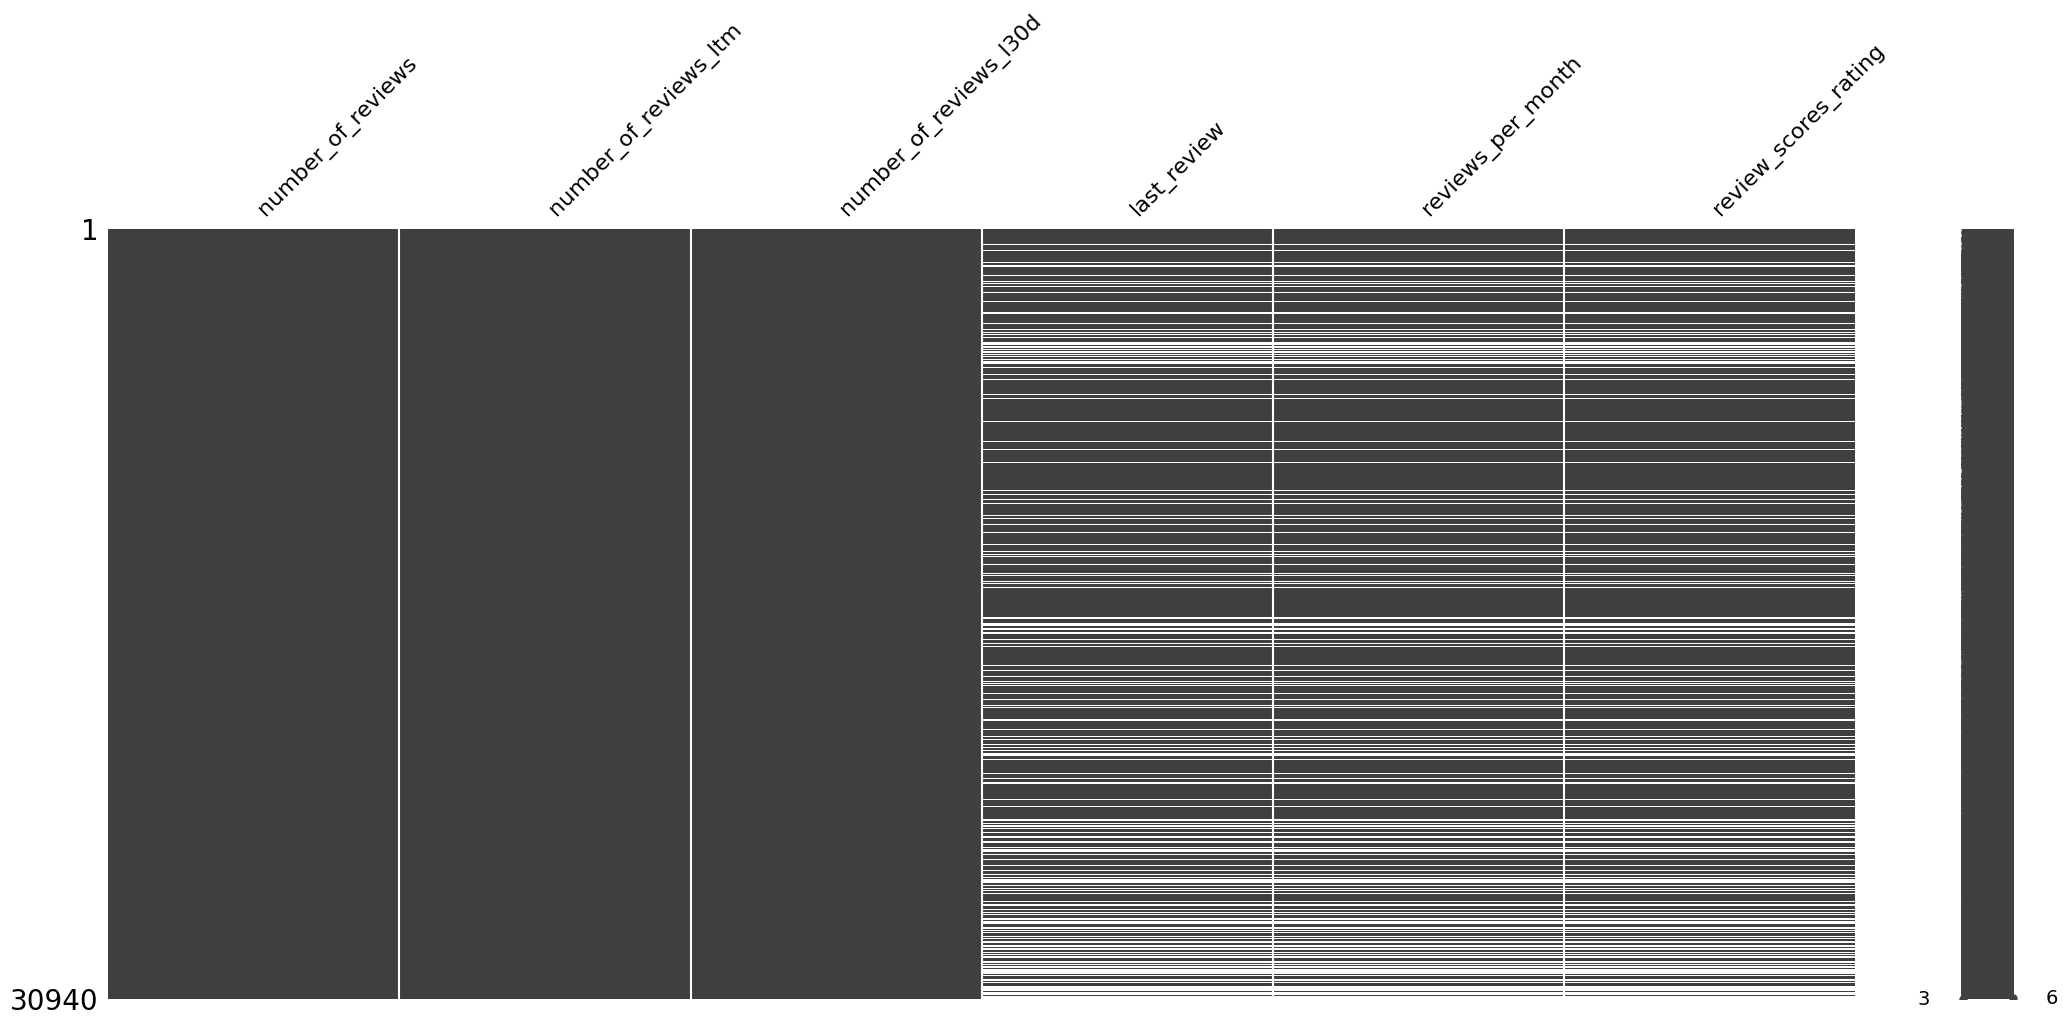

In [ ]:
ms.matrix(ds_treated[colunas_review])

Notem que existem acomodações que nunca receberam uma avaliação e quando isso acontece não existem valores para data de última avaliação, revisões por mês e a própria pontuação média.

Vou verificar a quantidade de ocorrências de valores nulos para essas variáveis.

In [ ]:
ds_treated[colunas_review].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30940 entries, 0 to 31963
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_of_reviews       30940 non-null  int64  
 1   number_of_reviews_ltm   30940 non-null  int64  
 2   number_of_reviews_l30d  30940 non-null  int64  
 3   last_review             23630 non-null  object 
 4   reviews_per_month       23630 non-null  float64
 5   review_scores_rating    23630 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.7+ MB


**Reflexões sobre como tratar essa quantidade considerável de instâncias com valores nulos.**

23630 instâncias sem valores nulos representam um universo de 76% do total de 30940. Eu poderia abrir mão dos 24% para garantir um dataset preenchido para essas variáveis mas ao optar por isso, estaria perdendo informação sobre acomodações com total rejeição. Será que existe, por exemplo, um bairro do Rio de Janeiro com disponibilidade de acomodações mas onde nunca alguém fez um review tendo ficado hospedado por lá? Ou mesmo nenhum hóspede quis se hospedar por lá, mesmo com acomodações disponíveis. Existem características de uma acomodação que são definitivas para implicar em rejeição por parte dos hóspedes?

Por outro lado, ao não abrir mão dessas instâncias com valores nulos, como vou tratar esses dois pontos?

*   Eu gostaria de calcular a data em que uma acomodação ficou disponível na plataforma fazendo uma conta com as variáveis number_of_reviews e reviews_per_month. Se a primeira tem valor 10 e a segunda tem valor 1, eu poderia inferir que a acomodação existe há 10 meses, por exemplo. Não tendo valor para reviews_per_month, eu não consigo fazer essa conta. Saber a data de início da disponibilização da acomodação é importante para eu filtrar acomodações com menos de 12 meses pois vou usar a variável de reviews nos últimos 12 meses como variável alvo.
*   Eu também gostaria de usar valores significativos de pontuação das acomodações (review_scores_rating) como uma variável de influência no dataset. Como tratar então valores nulos para essa variável? Não posso preencher com zero por que a semântica desse valor é bem diferente do valor não existir.











**Ponto de decisão**: Para caminhar no sentido de simplificação e por entender que essa ação implica apenas em perda parcial de informação, vou optar por remover as instâncias com valores nulos para essas colunas. Elas representam 24% do dataset e a informação sobre rejeição de acomodações vai seguir presente no conjunto de dados, com a existência de número de reviews baixo e pontuações baixas.

In [ ]:
# removendo instâncias com valores nulos para colunas de dados de review
ds_treated.dropna(subset=colunas_review, inplace=True)

In [ ]:
#conferindo a remoção
ds_treated[colunas_review].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23630 entries, 0 to 31919
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_of_reviews       23630 non-null  int64  
 1   number_of_reviews_ltm   23630 non-null  int64  
 2   number_of_reviews_l30d  23630 non-null  int64  
 3   last_review             23630 non-null  object 
 4   reviews_per_month       23630 non-null  float64
 5   review_scores_rating    23630 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.3+ MB


Vou converter a coluna last_review num dado do tipo datetime para poder executar operações adequadas com esse dado.

In [ ]:
#convertendo em datetime
ds_treated[LAST_REVIEW] = pd.to_datetime(ds_treated[LAST_REVIEW],\
                                         format='%Y-%m-%d')

In [ ]:
#conferindo o novo tipo de dado
ds_treated[colunas_review].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23630 entries, 0 to 31919
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   number_of_reviews       23630 non-null  int64         
 1   number_of_reviews_ltm   23630 non-null  int64         
 2   number_of_reviews_l30d  23630 non-null  int64         
 3   last_review             23630 non-null  datetime64[ns]
 4   reviews_per_month       23630 non-null  float64       
 5   review_scores_rating    23630 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 1.3 MB


Vou adicionar uma nova coluna que vai conter a quantidade de meses desde que a acomodação foi registrada na plataforma Airbnb. Vou calcular esse valor usando valores presentes nas colunas reviews_per_month e number_of_reviews.

In [ ]:
#analisando valores presentes
ds_treated[[NUMBER_OF_REVIEWS, REVIEWS_PER_MONTH]].head()

number_of_reviews  reviews_per_month
0                 78               0.54
1                 29               0.20
2                 76               0.65
3                301               1.87
4                272               1.68

In [ ]:
# criando uma nova coluna no dataset para registrar a quantidade de meses
ds_treated[MONTHS_SINCE_REGISTERED] =\
    ds_treated.apply(calcula_meses_desde_registro, axis=1)

In [ ]:
ds_treated[[NUMBER_OF_REVIEWS, REVIEWS_PER_MONTH, MONTHS_SINCE_REGISTERED]].head()

number_of_reviews  reviews_per_month  months_since_registered
0                 78               0.54                      144
1                 29               0.20                      145
2                 76               0.65                      117
3                301               1.87                      161
4                272               1.68                      162

In [ ]:
#analisando dados da nova coluna criada
ds_treated[MONTHS_SINCE_REGISTERED].describe()

count    23630.000000
mean        36.271731
std         34.443444
min          1.000000
25%          9.000000
50%         21.000000
75%         57.000000
max        200.000000
Name: months_since_registered, dtype: float64

Notem que existe uma acomodação com 200 meses de registrada, ou seja, mais de 16 anos e meio. A plataforma Airbnb foi fundada em 2008 o que dá 15 anos se consideramos o momento atual, ano 2023. Além disso, ela opera no Brasil desde 2012, o que dá aproximadamente 11 anos. Parece haver alguma inconsistência no dado mas não vou eliminar essas instâncias no escopo desse trabalho.

Vou agora analisar quantas acomodações tem menos de 12 meses.

In [ ]:
menos_de_doze = (ds_treated[MONTHS_SINCE_REGISTERED] < 12).sum()

print(f'Quantidade menor do que 12: {menos_de_doze}')

Quantidade menor do que 12: 7308


Como quero usar a variável de quantidade de reviews nos últimos 12 meses como a variável alvo, preciso remover do dataset aquelas acomodações com existência na plataforma menor do que esse período.

In [ ]:
# removendo linhas com menos de 12 meses
ds_treated = ds_treated[ds_treated[MONTHS_SINCE_REGISTERED] >= 12]

In [ ]:
#analisando novamente os dados da nova coluna criada
ds_treated[MONTHS_SINCE_REGISTERED].describe()

count    16322.000000
mean        49.807928
std         33.479740
min         12.000000
25%         20.000000
50%         45.000000
75%         75.000000
max        200.000000
Name: months_since_registered, dtype: float64

Como foram retiradas as instâncias com menos de 12 meses, os valores dos quartis e a média aumentaram significativamente

##### Instant_bookable

Analisando a última coluna da entidade Acomodação e aplicando os devidos tratamentos.

In [ ]:
# analisando primeiros valores
ds_treated[INSTANT_BOOKABLE].head(10)

0    f
1    f
2    f
3    f
4    f
5    t
6    f
7    f
8    f
9    t
Name: instant_bookable, dtype: object

In [ ]:
# verificando distribuição
ds_treated[INSTANT_BOOKABLE].value_counts()

f    12482
t     3840
Name: instant_bookable, dtype: int64

In [ ]:
#convertendo para tipo bool
ds_treated[INSTANT_BOOKABLE] =\
    ds_treated[INSTANT_BOOKABLE].map({'t': True, 'f': False})

In [ ]:
#analisando resultado do ajuste de tipagem
ds_treated[INSTANT_BOOKABLE].head(10)

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9     True
Name: instant_bookable, dtype: bool

#### 4.3.3 Tratamento na entidade Localização da Acomodação

Essa entidade ficou com apenas dois atributos e isso simplificou as ações de tratamento.

##### Neighbourhood_overview

Analisando a coluna neighbourhood_overview.

In [ ]:
ds_treated[NEIGHBORHOOD_OVERVIEW].head()

0                                                  NaN
1                                                  NaN
2    Copacabana, apelidada a princesinha do mar, fa...
3    This is the one of the bests spots in Rio. Bec...
4    Copacabana is a lively neighborhood and the ap...
Name: neighborhood_overview, dtype: object

Como mencionado em seções anteriores, para algumas variáveis eu vou adotar a estratégia de considerar que o fato dela ter valor preenchido já serve de indicativo para fator de influência. Não farei uma análise no dado em si.

A variável neighborhood_overview se encaixa nesse cenário.

Criarei uma coluna nova preenchendo-a com valores booleanos correspondentes e depois excluirei a coluna original.

In [ ]:
# criando uma coluna nova e convertando para booleano para indicar que a
# variável neighbourhood_overview tem valor preenchido
ds_treated[HAS_NEIGHBOURHOOD_OVERVIEW] =\
    ds_treated[NEIGHBORHOOD_OVERVIEW].notna()

In [ ]:
#conferindo o resultado nas primeiras linhas
ds_treated[[NEIGHBORHOOD_OVERVIEW, HAS_NEIGHBOURHOOD_OVERVIEW]].head()

neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2  Copacabana, apelidada a princesinha do mar, fa...   
3  This is the one of the bests spots in Rio. Bec...   
4  Copacabana is a lively neighborhood and the ap...   

   has_neighbourhood_overview  
0                       False  
1                       False  
2                        True  
3                        True  
4                        True

In [ ]:
# removendo coluna original neighborhood_overview
ds_treated.drop([NEIGHBORHOOD_OVERVIEW], axis=1, inplace= True)

##### Neighbourhood_cleansed

Essa coluna contém nomes dos bairros que foram calculados a partir dos dados de latitude e longitude, cálculo esse feito pelo site Inside Airbnb. A cidade do Rio de Janeiro tem 164 bairros, segundo a [Wikipedia](https://pt.wikipedia.org/wiki/Lista_de_bairros_da_cidade_do_Rio_de_Janeiro).

Vou agora analisar a coluna neighbourhood_cleansed do dataset.

In [ ]:
ds_treated[NEIGHBOURHOOD_CLEANSED].info()

<class 'pandas.core.series.Series'>
Int64Index: 16322 entries, 0 to 22388
Series name: neighbourhood_cleansed
Non-Null Count  Dtype 
--------------  ----- 
16322 non-null  object
dtypes: object(1)
memory usage: 255.0+ KB


Notem a ausência de valores nulos para essa coluna. Existem valores preenchidos para todas as 16322 entradas.

In [ ]:
# verificando valores únicos para bairros para comparar com
# total de bairros da cidade
print("Quantidade de bairros:", ds_treated[NEIGHBOURHOOD_CLEANSED].nunique())

Quantidade de bairros: 132


Como existem 132 bairros presentes e a cidade tem 164 bairros, posso concluir que no estado atual do meu dataset, nem todo bairro do Rio de Janeiro está presente.

Vou verificar a contagem por bairro.

In [ ]:
#listando os bairros presentes, em ordem de quantidade de acomodações
ds_treated[NEIGHBOURHOOD_CLEANSED].value_counts()

Copacabana                  5270
Ipanema                     1777
Barra da Tijuca             1606
Leblon                       866
Jacarepaguá                  833
Botafogo                     760
Recreio dos Bandeirantes     700
Santa Teresa                 586
Centro                       474
Flamengo                     376
Leme                         332
Laranjeiras                  217
Tijuca                       195
Camorim                      167
Catete                       134
Glória                       134
Lagoa                        113
Gávea                        104
Jardim Botânico              102
Humaitá                       89
Vidigal                       75
São Conrado                   72
Urca                          72
Barra de Guaratiba            71
Taquara                       59
Itanhangá                     58
Freguesia (Jacarepaguá)       53
Vila Isabel                   52
Joá                           48
Vargem Pequena                47
Curicica  

In [ ]:
# fazendo agora a mesma listagem mas ordenando pelos nomes dos bairros,
# para tentar identificar uma possível ocorrência de bairros repetidos
# escritos de maneira similar.
ds_treated[NEIGHBOURHOOD_CLEANSED].value_counts().sort_index()

Alto da Boa Vista             23
Andaraí                       12
Anil                          22
Bancários                      3
Bangu                          4
Barra da Tijuca             1606
Barra de Guaratiba            71
Benfica                        2
Bento Ribeiro                  4
Bonsucesso                     3
Botafogo                     760
Brás de Pina                  11
Cachambi                      14
Cacuia                         7
Camorim                      167
Campinho                       3
Campo Grande                  41
Catete                       134
Catumbi                        6
Centro                       474
Cidade Nova                    7
Cidade de Deus                 2
Cocotá                         1
Coelho Neto                    2
Complexo do Alemão             1
Copacabana                  5270
Cosme Velho                   43
Cosmos                         5
Curicica                      45
Del Castilho                   1
Deodoro   

Numa análise da lista, não parece acontecer o cenário mencionado, de bairros duplicados. É interessante notar a presença na lista de alguns bairros não tão conhecidos, como [Higienópolis](https://pt.wikipedia.org/wiki/Higien%C3%B3polis_(bairro_do_Rio_de_Janeiro)) (não é de São Paulo) e [Tauá](https://pt.wikipedia.org/wiki/Tau%C3%A1_(bairro)).

Vou criar uma variável com a lista de bairros para usar numa seção subsequente.

In [ ]:
# criando variável com a lista de bairros
bairros_referencia = sorted(ds_treated[NEIGHBOURHOOD_CLEANSED].unique())

#### 4.3.4 Tratamento na entidade Anfitrião

A entidade Anfitrião engloba as variáveis host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_neighbourhood, host_total_listings_count e host_identity_verified.

Analisarei e farei os devidos tratamentos nessas variáveis nas próximas seções. Para começar, uma visão de matriz apenas das variáveis de Anfitrião.

<Axes: >

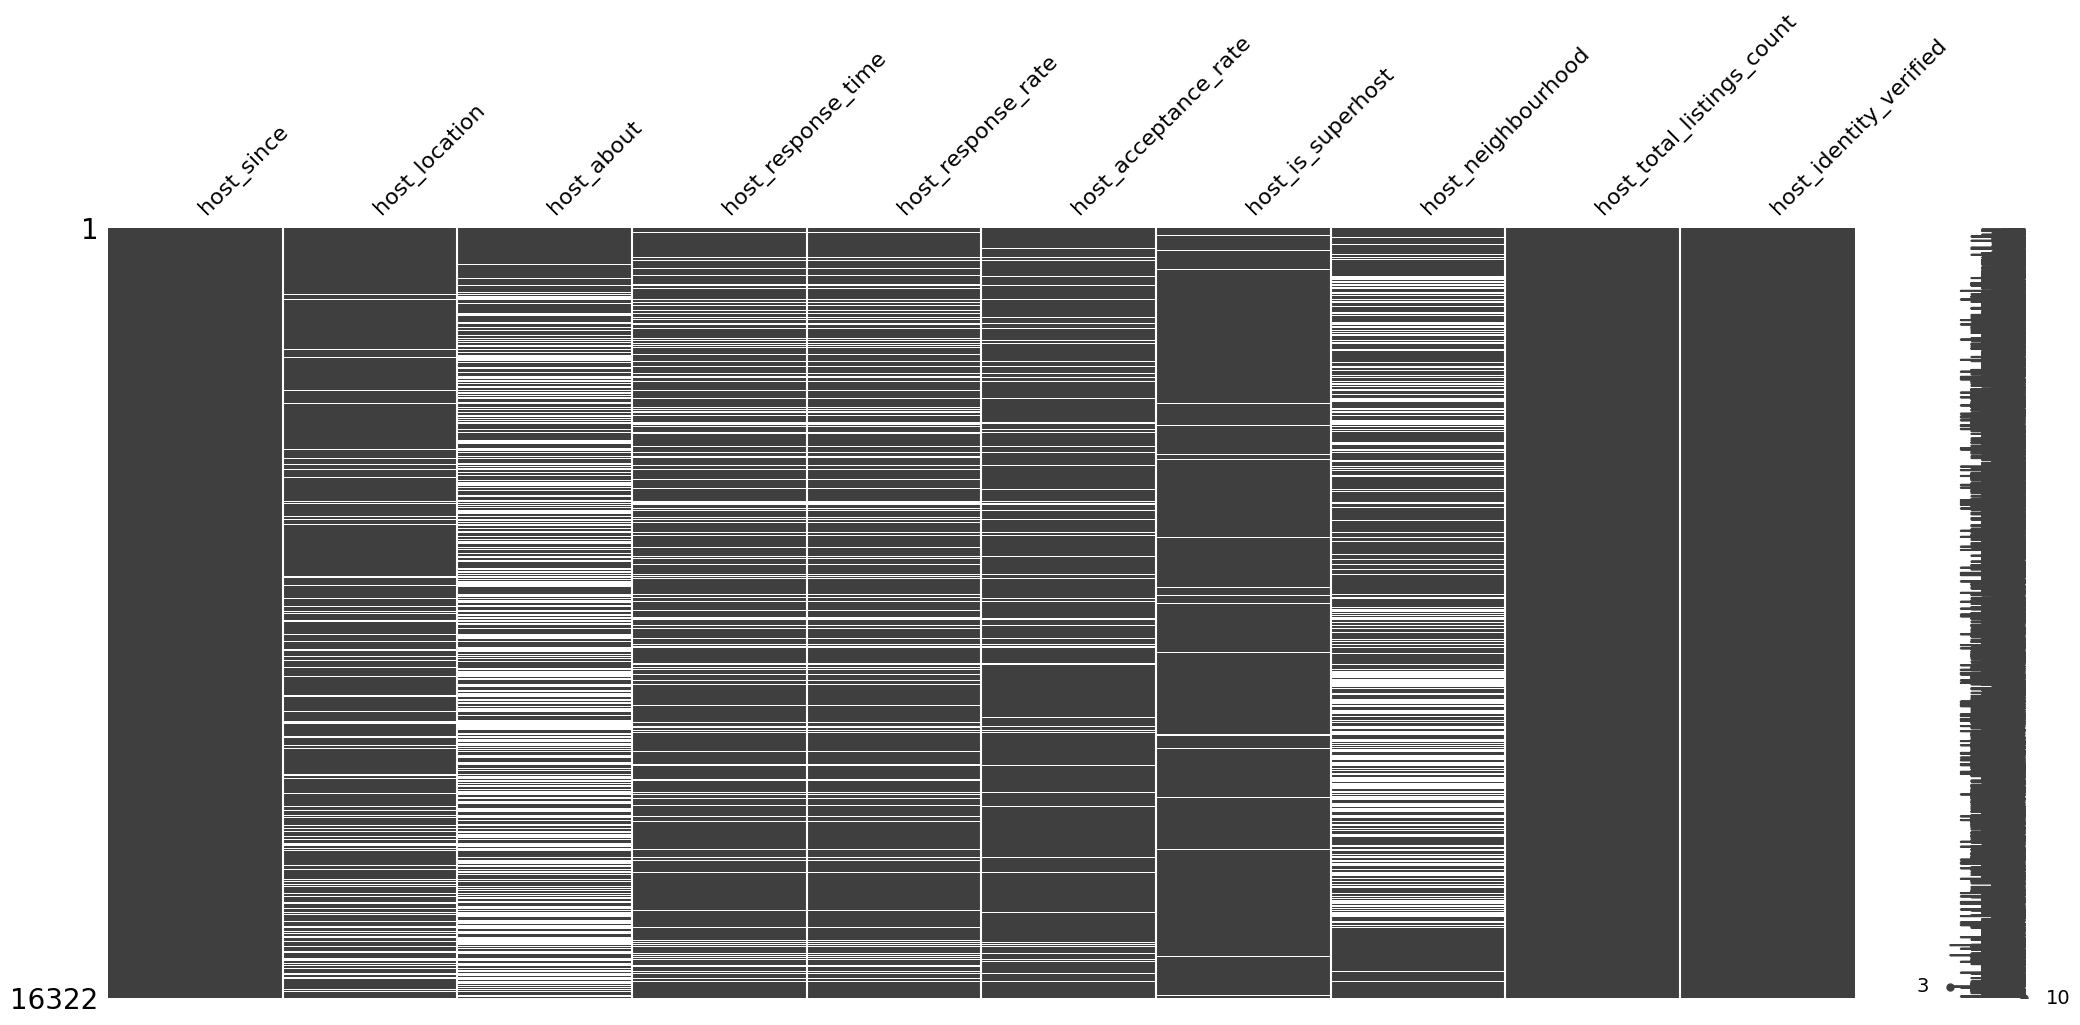

In [ ]:
#lista com colunas da entidade Anfitrião
colunas_host = [HOST_SINCE, HOST_LOCATION, HOST_ABOUT, HOST_RESPONSE_TIME,\
                HOST_RESPONSE_RATE, HOST_ACCEPTANCE_RATE, HOST_IS_SUPERHOST,\
                HOST_NEIGHBOURHOOD, HOST_TOTAL_LISTINGS_COUNT,\
                HOST_IDENTITY_VERIFIED]

# matriz apenas dos dados dessa entidade
ms.matrix(ds_treated[colunas_host])

Notem a presença de valores nulos para boa parte das variáveis envolvidas.

##### Host_since

A variável host_since indica em que momento o anfitrião se registrou na plataforma, seja para ofertar acomodações, seja para se hospedar. Vou manter esse dado no dataset por considerar que mais tempo de relação com a plataforma pode indicar mais habilidade de gerir estadias e isso levar a uma melhor taxa de ocupação.

Análise inicial da variável.

In [ ]:
# verificando nulos da variável host_since
ds_treated[HOST_SINCE].info()

<class 'pandas.core.series.Series'>
Int64Index: 16322 entries, 0 to 22388
Series name: host_since
Non-Null Count  Dtype 
--------------  ----- 
16322 non-null  object
dtypes: object(1)
memory usage: 255.0+ KB


Todas as instâncias contém dados e o tipo do dado é object.

Agora vou analisar o conteúdo em si e seu formato.

In [ ]:
ds_treated[HOST_SINCE].head()

0    2011-09-25
1    2011-09-25
2    2011-10-03
3    2010-01-08
4    2010-04-03
Name: host_since, dtype: object

Vou modificar o tipo do dado para datetime.

In [ ]:
#convertendo em datetime
ds_treated[HOST_SINCE] =\
    pd.to_datetime(ds_treated[HOST_SINCE], format='%Y-%m-%d')

Analisando agora o resultado.

In [ ]:
ds_treated[HOST_SINCE].head()

0   2011-09-25
1   2011-09-25
2   2011-10-03
3   2010-01-08
4   2010-04-03
Name: host_since, dtype: datetime64[ns]

##### Host_location e host_neighbourhood

Essas variáveis indicam a localização do anfitrião em níveis de granularidade diferentes. O dicionário de dados fornecido pelo site Inside Airbnb informa que host_location contém uma informação de localização dos anfitriãos declaradas por eles mesmos e não há uma descrição sobre host_neighbourhood.  Minha hipótese é que anfitriões mais próximo dos locais das acomodações ganham em poder de gestão e logística e isso levaria a uma maior taxa de ocupação.

Analisando agora os valores presentes nessas duas variáveis para poder decidir como tratar esses dados.

In [ ]:
# informações sobre as duas variáveis
ds_treated[[HOST_LOCATION, HOST_NEIGHBOURHOOD]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16322 entries, 0 to 22388
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   host_location       14157 non-null  object
 1   host_neighbourhood  10914 non-null  object
dtypes: object(2)
memory usage: 382.5+ KB


Existe uma quantidade significativa de nulos, principalmente na variável host_neighbourhood.

In [ ]:
# analisando valores presentes
ds_treated[[HOST_LOCATION, HOST_NEIGHBOURHOOD]].head(30)

host_location host_neighbourhood
0   Rio de Janeiro, Brazil         Copacabana
1   Rio de Janeiro, Brazil         Copacabana
2   Rio de Janeiro, Brazil         Copacabana
3   Rio de Janeiro, Brazil         Copacabana
4   Rio de Janeiro, Brazil         Copacabana
5   Rio de Janeiro, Brazil         Copacabana
6   Rio de Janeiro, Brazil         Copacabana
7   Rio de Janeiro, Brazil         Copacabana
8   Rio de Janeiro, Brazil         Copacabana
9   Rio de Janeiro, Brazil            Ipanema
11  Rio de Janeiro, Brazil         Copacabana
12  Rio de Janeiro, Brazil         Copacabana
13                Mesa, AZ         Copacabana
14  Rio de Janeiro, Brazil         Copacabana
15                  Brazil         Copacabana
16           San Diego, CA                Joá
17       Sao Paulo, Brazil         Copacabana
18  Rio de Janeiro, Brazil         Copacabana
19  Rio de Janeiro, Brazil           Flamengo
20  Rio de Janeiro, Brazil            Ipanema
21  Rio de Janeiro, Brazil         Copacabana
22  Rio de Janeiro, Brazil            Ipanema
23                  Brazil       Santa Teresa
24  Rio de Janeiro, Brazil         Copacabana
25  Rio de Janeiro, Brazil               Leme
26  Rio de Janeiro, Brazil            Ipanema
27  Rio de Janeiro, Brazil           Botafogo
28  Rio de Janeiro, Brazil       Santa Teresa
29         Miami Beach, FL         Copacabana
30  Rio de Janeiro, Brazil         Copacabana

Já podemos notar algumas inconsistências nessa lista de 30 ocorrências. Um exemplo é o caso do anfitrião que informa localização sendo a cidade de San Diego, na Califórnia e o bairro do Joá, no Rio de Janeiro.

Vamos analisar agora as ocorrências em que aparecem valores nulos em pelo menos um desses dois campos.

In [ ]:
# Filtrar e imprimir apenas as linhas que contêm pelo menos
# um valor nulo em qualquer coluna
df_filtrado =\
    ds_treated[[HOST_LOCATION, HOST_NEIGHBOURHOOD]]\
        [ds_treated[[HOST_LOCATION, HOST_NEIGHBOURHOOD]].isnull().any(axis=1)]
print(df_filtrado.head(30))

              host_location host_neighbourhood
35   Rio de Janeiro, Brazil                NaN
68                      NaN         Copacabana
71                      NaN            Vidigal
90                      NaN         Copacabana
153  Rio de Janeiro, Brazil                NaN
163                     NaN             Tijuca
189                     NaN         Copacabana
198  Rio de Janeiro, Brazil                NaN
221  Rio de Janeiro, Brazil                NaN
254  Rio de Janeiro, Brazil                NaN
260  Rio de Janeiro, Brazil                NaN
265  Rio de Janeiro, Brazil                NaN
269  Rio de Janeiro, Brazil                NaN
294         Los Angeles, CA                NaN
307  Rio de Janeiro, Brazil                NaN
319  Rio de Janeiro, Brazil                NaN
325  Rio de Janeiro, Brazil                NaN
328                     NaN       Santa Teresa
376                     NaN         Copacabana
391  Rio de Janeiro, Brazil                NaN
406          

Podemos notar que esse dado está incompleto e apresenta inconsistências. No entanto, como quero utilizá-lo com o propósito de qualificar anfitriões que estão mais próximos do local das acomodações sendo ofertadas, vou adotar uma estratégia de enriquecimento e ajuste dos dados. Quero no final chegar numa estrutura de dados que entregue essa visão de proximidade do anfitrião com o local da acomodação. A intenção é chegar numa variável categórica que entregue esse valor.

Vou analisar com um pouco mais de detalhe os valores presentes.



In [ ]:
#contagem de ocorrências dos valores presentes em host_location
ds_treated[HOST_LOCATION].value_counts().head(10)

Rio de Janeiro, Brazil             10634
State of Rio de Janeiro, Brazil      974
Rio, Brazil                          526
Brazil                               344
São Paulo, Brazil                    286
Brasília, Brazil                      70
Belo Horizonte, Brazil                62
Niterói, Brazil                       39
Porto Alegre, Brazil                  33
New York, NY                          32
Name: host_location, dtype: int64

O caso do Rio de Janeiro é especial por que a cidade e o estado tem o mesmo nome então isso traz uma dificuldade para separamos claramente anfitriões que vivem na cidade do Rio, usando os dados presentes.

---




In [ ]:
#valores presentes na coluna host_neihbourhood
bairros_anfitriao = ds_treated[HOST_NEIGHBOURHOOD].unique()
print(bairros_anfitriao)

['Copacabana' 'Ipanema' 'Joá' 'Flamengo' 'Santa Teresa' 'Leme' 'Botafogo'
 nan 'Lapa' 'Gávea' 'Leblon' 'Jardin Botânico' 'Centro' 'Barra da Tijuca'
 'Lagoa' 'Recreio dos Bandeirantes' 'Vidigal' 'São Conrado' 'Itanhangá'
 'Praça Seca' 'Urca' 'Laranjeiras' 'Consolacao' 'Montmartre' 'Humaitá'
 'Jardim Botânico' 'Tijuca' 'Glória' 'Vila Isabel' 'Cosme Velho'
 'Independência' 'Penha Circular' 'Estacio' 'Praça da Bandeira' 'Catete'
 'Barra de Guaratiba' 'Estácio' 'São Miguel'
 'Loteamento Triangulo de Buzios' 'Curicica' 'Engenho Novo' 'Rio Comprido'
 'Maracanã' 'Lins de Vasconcelos' 'Village da Ferradura' 'Jacarepaguá'
 'Riachuelo' 'Jardim Mariléa' 'Todos os Santos' 'Caju' 'Astoria' 'Palermo'
 'Catumbi' 'São Cristóvão' 'Barra' 'Vila Mariana' 'East Village'
 'Itaipava' 'Jardim Guanabara' 'Vila Rachid' 'Deodoro' 'Penha' 'Prati'
 'Quintino Bocaiúva' 'Brás de Pina' 'Ipê' 'Bigorrilho' 'Parione'
 'Chácara Inglesa' 'Madureira' 'Vila Luiza' 'Complexo da Maré' 'Pompéia'
 'Rocha' 'Cachambi' 'Passagem' 

Numa leitura na diagonal, podemos notar que existem nessa lista bairros da cidade do Rio de Janeiro e outros desconhecidos.

Depois de analisar essas duas variáveis, proponho as seguintes regras para o tratamento desses dados:

1.   Assumir que os valores **"Rio de Janeiro, Brazil" e "Rio, Brazil"** indicam anfitriões que vivem na cidade do Rio de Janeiro e todos os outros valores indicam anfitriões que vivem fora da cidade
2.   Assumir que o dado de host_location é mais confiável do que o dado host_neighbourhood pois o primeiro contém descrição presente no dicionário do site Inside Airbnb enquanto o segundo não contém, além desse segundo ter maior volume de nulos na coluna.
3.  No cenário de nulos presentes, fazer enriquecimento de dados apenas nos casos em que host_location está nulo, host_neighbourhood está preenchido e o valor presente é de um bairro existente na lista de bairros informados na entidade Localização da Acomodação.


Notem que nessa regra 3 eu estou considerando a lista de bairros da variável neighbourhood_cleansed como aquela que contém informações mais confiáveis. Esses dados foram preenchidos pelo próprio site Inside Airbnb a partir dos dados de latitude e longitude.


Dadas essas regras, proponho uma lógica que entregue as seguintes categorias:

*   Anfitrião localizado na cidade do Rio de Janeiro, no bairro da acomodação (Very Close)
*   Anfitrião localizado na cidade do Rio de Janeiro (Relatively Close)
*   Anfitrião não localizado na cidade do Rio de Janeiro (Far)
*   Sem informação de localização do anfitrião (No Information)


Primeiramente vou complementar o valor de host_location com a cidade do Rio de Janeiro para as ocorrências nulas com bairros reconhecidos e vou verificar com dois exemplos se a lógica funcionou como esperado.

In [ ]:
# criando uma nova coluna no dataset para registrar se o host
# vive no Rio de Janeiro
ds_treated[HOST_LOCATION_ADJUSTED] =\
    ds_treated.apply(fill_in_rio, axis=1,bairros_referencia=bairros_referencia)

# obtendo um dataset filtrado para os casos com null para testar o preenchimento
df_filtrado =\
    ds_treated[[HOST_LOCATION, HOST_NEIGHBOURHOOD, HOST_LOCATION_ADJUSTED]]\
        [ds_treated[[HOST_LOCATION, HOST_NEIGHBOURHOOD,\
                     HOST_LOCATION_ADJUSTED]].isnull().any(axis=1)]

# verificando se o valor não foi preenchido para um bairro que
# não é do Rio de Janeiro
print(df_filtrado.loc[df_filtrado[HOST_NEIGHBOURHOOD] == 'Iguaba Pequena'])

# verificando se o valor foi preenchido para um bairro que é do Rio de Janeiro
print(df_filtrado.loc[df_filtrado[HOST_NEIGHBOURHOOD] == 'Vila Isabel'])

      host_location host_neighbourhood host_location_adjs
17269           NaN     Iguaba Pequena                NaN
      host_location host_neighbourhood      host_location_adjs
9996            NaN        Vila Isabel  Rio de Janeiro, Brazil
10253           NaN        Vila Isabel  Rio de Janeiro, Brazil
10355           NaN        Vila Isabel  Rio de Janeiro, Brazil
18889           NaN        Vila Isabel  Rio de Janeiro, Brazil
19017           NaN        Vila Isabel  Rio de Janeiro, Brazil
19057           NaN        Vila Isabel  Rio de Janeiro, Brazil
20066           NaN        Vila Isabel  Rio de Janeiro, Brazil


Agora vou implementar a lógica que cria as categorias de proximidade do anfitrião.

In [ ]:
# criando uma nova coluna no dataset para registrar se o host
# vive no Rio de Janeiro
ds_treated[HOST_PROXIMITY] = ds_treated.apply(host_proximity, axis=1)

In [ ]:
# conferindo o resultado nas primeiras linhas
ds_treated[[HOST_LOCATION, HOST_LOCATION_ADJUSTED, HOST_NEIGHBOURHOOD,\
            NEIGHBOURHOOD_CLEANSED, HOST_PROXIMITY]].head(50)

host_location      host_location_adjs host_neighbourhood  \
0   Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
1   Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
2   Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
3   Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
4   Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
5   Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
6   Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
7   Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
8   Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
9   Rio de Janeiro, Brazil  Rio de Janeiro, Brazil            Ipanema   
11  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
12  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
13                Mesa, AZ                Mesa, AZ         Copacabana   
14  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
15                  Brazil                  Brazil         Copacabana   
16           San Diego, CA           San Diego, CA                Joá   
17       Sao Paulo, Brazil       Sao Paulo, Brazil         Copacabana   
18  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
19  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil           Flamengo   
20  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil            Ipanema   
21  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
22  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil            Ipanema   
23                  Brazil                  Brazil       Santa Teresa   
24  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
25  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil               Leme   
26  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil            Ipanema   
27  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil           Botafogo   
28  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil       Santa Teresa   
29         Miami Beach, FL         Miami Beach, FL         Copacabana   
30  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
31  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
32        Zug, Switzerland        Zug, Switzerland         Copacabana   
33  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil       Santa Teresa   
35  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil                NaN   
36  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil               Lapa   
37  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
38   Florianópolis, Brazil   Florianópolis, Brazil              Gávea   
39  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil             Leblon   
41  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil    Jardin Botânico   
42  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil         Copacabana   
43  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil       Santa Teresa   
45  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil            Ipanema   
46  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil             Leblon   
47  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil       Santa Teresa   
48  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil            Ipanema   
49  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil             Leblon   
50  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil       Santa Teresa   
51  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil             Leblon   
52  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil             Leblon   
53  Rio de Janeiro, Brazil  Rio de Janeiro, Brazil             Centro   

   neighbourhood_cleansed    host_proximity  
0              Copacabana        Very Close  
1              Copacabana        Very Close  
2              Copacabana        Very Close  
3              Copacabana        Very Close  
4              Copacabana        Very Close  
5            

Notem que o resultado está de acordo com as regras estabelecidas e alguns casos chamam a atenção dada a inconsistência. Uma acomodação indica que o anfitrião está em Zug, Switzerland (fora do Brasil) e ao mesmo tempo em Copacabana, bairro do Rio de Janeiro. Como definimos como regra que vamos confiar mais no dado indicado em host_location, consideramos que nesse caso o anfitrião está longe da acomodação.

Agora vou remover todas as colunas de localização do host mantendo apenas a nova coluna categórica criada.

In [ ]:
# removendo colunas originais e temporárias de localização do host
ds_treated.drop([HOST_LOCATION, HOST_NEIGHBOURHOOD, HOST_LOCATION_ADJUSTED],\
                axis=1, inplace= True)

##### Host_about

Essa variável contém uma apresentação do anfitrião sobre si e minha hipótese é que quando esses valores estão preenchidos, a taxa de ocupação melhora devido a um aumento de confiança por parte do hóspede.

Vou então criar uma nova coluna para indicar apenas que essa descrição está preenchida, não entrando no mérito de avaliar o conteúdo preenchido.

In [ ]:
# criando uma coluna nova e convertando para booleano para indicar que a
# variável host_about tem valor preenchido
ds_treated[HAS_HOST_ABOUT] = ds_treated[HOST_ABOUT].notna()

E agora removo a coluna original.

In [ ]:
# removendo coluna original host_about
ds_treated.drop([HOST_ABOUT], axis=1, inplace= True)

<Axes: >

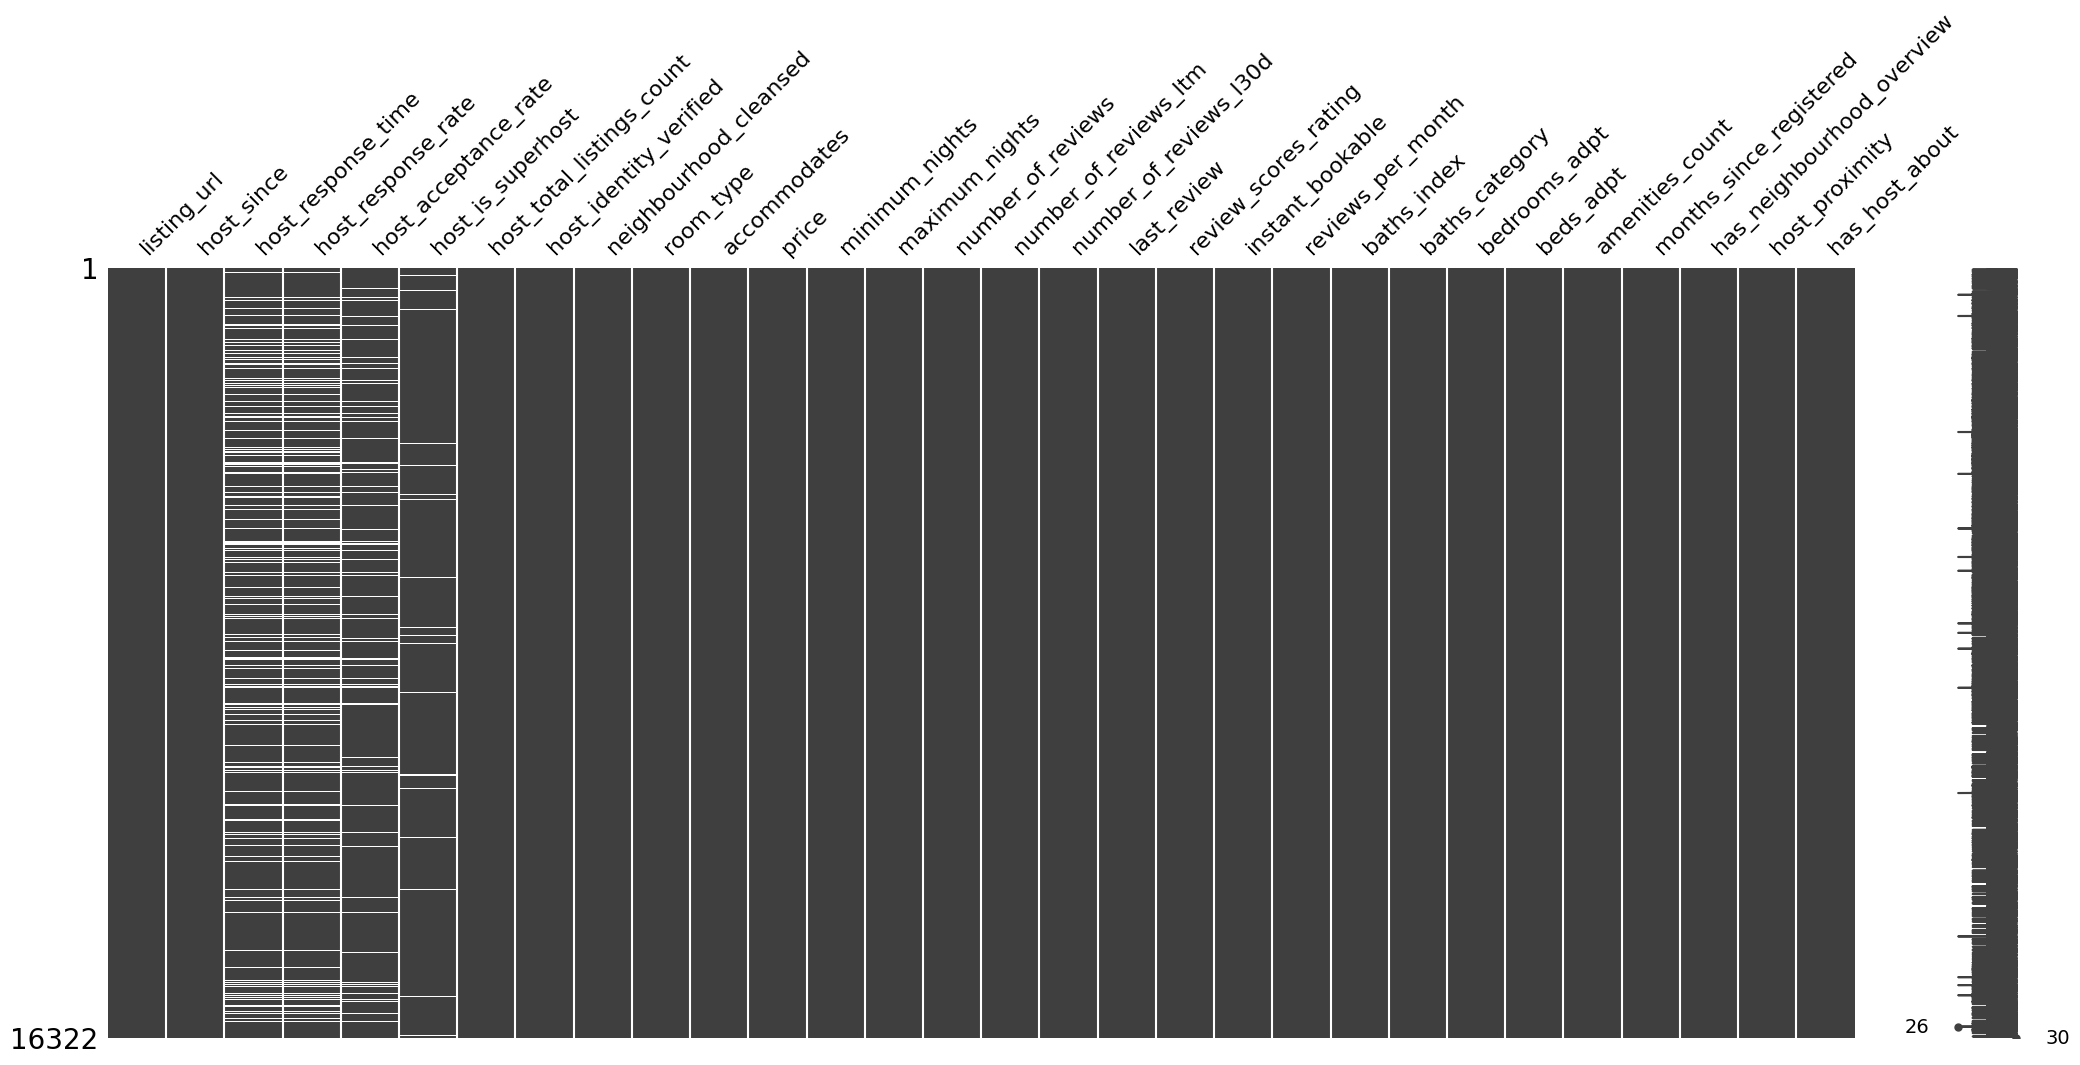

In [ ]:
ms.matrix(ds_treated)

##### Host_response_time, host_response_rate e host_acceptance_rate

Essas variáveis englobam indicadores de reação do anfitrião perante interações dos possíveis hóspedes.

Faço agora uma análise inicial.

In [ ]:
ds_treated[[HOST_RESPONSE_TIME, HOST_RESPONSE_RATE, HOST_ACCEPTANCE_RATE]].head(40)

host_response_time host_response_rate host_acceptance_rate
0   within a few hours               100%                  82%
1   within a few hours               100%                  82%
2       within an hour               100%                  96%
3       within an hour               100%                  96%
4   within a few hours               100%                  73%
5       within an hour               100%                 100%
6       within an hour               100%                  97%
7       within an hour               100%                  96%
8   within a few hours               100%                  83%
9       within an hour               100%                  97%
11      within an hour               100%                  92%
12      within an hour               100%                  70%
13      within an hour               100%                  97%
14      within an hour               100%                  87%
15      within an hour               100%                 100%
16  within a few hours               100%                  67%
17  within a few hours                90%                  83%
18      within an hour               100%                  99%
19  within a few hours               100%                  75%
20  within a few hours               100%                  93%
21      within an hour               100%                  89%
22      within an hour               100%                  97%
23      within an hour               100%                 100%
24      within an hour               100%                 100%
25      within an hour                78%                 100%
26      within an hour               100%                 100%
27  a few days or more                 0%                  NaN
28      within an hour               100%                  80%
29      within an hour               100%                 100%
30      within an hour               100%                 100%
31      within an hour               100%                  77%
32  within a few hours               100%                  88%
33        within a day               100%                  85%
35                 NaN                NaN                  NaN
36        within a day               100%                  13%
37      within an hour               100%                  94%
38                 NaN                NaN                  67%
39  within a few hours                90%                  96%
41  within a few hours                80%                  39%
42      within an hour               100%                  94%

Notem que as 3 variáveis podem conter valores nulos e que a variável host_response_time é uma variável categórica.

In [ ]:
ds_treated[[HOST_RESPONSE_TIME, HOST_RESPONSE_RATE,\
            HOST_ACCEPTANCE_RATE]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16322 entries, 0 to 22388
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   host_response_time    13767 non-null  object
 1   host_response_rate    13767 non-null  object
 2   host_acceptance_rate  14867 non-null  object
dtypes: object(3)
memory usage: 510.1+ KB


Vou optar por remover as linhas onde não há dado sobre tempo e taxa de resposta do anfitrião além de taxa de aceitação. Entendo que essas variáveis podem influenciar nas taxas de ocupação e prefiro remover do dataset as instâncias que não tem esse dado.

In [ ]:
# removendo instâncias com valores nulos para colunas host_responde_time,
# host_response_rate e host_acceptance_rate
colunas = [HOST_RESPONSE_TIME, HOST_RESPONSE_RATE, HOST_ACCEPTANCE_RATE]
ds_treated.dropna(subset=colunas, inplace=True)

Agora vou fazer os ajustes de tipagem e de conteúdo nessas colunas.

In [ ]:
# convertendo o tipo de host_response_time para o tipo category
ds_treated[HOST_RESPONSE_TIME] =\
    ds_treated[HOST_RESPONSE_TIME].astype('category')

In [ ]:
# Tratando as colunas host_response_rate e host_acceptance_rate
ds_treated[HOST_RESPONSE_RATE] =\
    ds_treated[HOST_RESPONSE_RATE].str.replace('%', '').astype(int)
ds_treated[HOST_ACCEPTANCE_RATE] =\
    ds_treated[HOST_ACCEPTANCE_RATE].str.replace('%', '').astype(int)

Conferindo o resultado dos ajustes

In [ ]:
ds_treated[[HOST_RESPONSE_TIME, HOST_RESPONSE_RATE,\
            HOST_ACCEPTANCE_RATE]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13545 entries, 0 to 22388
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   host_response_time    13545 non-null  category
 1   host_response_rate    13545 non-null  int64   
 2   host_acceptance_rate  13545 non-null  int64   
dtypes: category(1), int64(2)
memory usage: 330.9 KB


In [ ]:
ds_treated[[HOST_RESPONSE_TIME, HOST_RESPONSE_RATE,\
            HOST_ACCEPTANCE_RATE]].head()

host_response_time  host_response_rate  host_acceptance_rate
0  within a few hours                 100                    82
1  within a few hours                 100                    82
2      within an hour                 100                    96
3      within an hour                 100                    96
4  within a few hours                 100                    73

##### Host_is_superhost

Análise inicial na variável.

In [ ]:
# analisando primeiros valores
ds_treated[HOST_IS_SUPERHOST].head(10)

0    f
1    f
2    t
3    t
4    t
5    t
6    f
7    t
8    f
9    t
Name: host_is_superhost, dtype: object

In [ ]:
# verificando distribuição
ds_treated[HOST_IS_SUPERHOST].value_counts()

f    7634
t    5557
Name: host_is_superhost, dtype: int64

Vou tratar convertando para tipo booleano mapeando valor f e nulo para False e t para True.

In [ ]:
#convertendo para tipo bool
ds_treated[HOST_IS_SUPERHOST] =\
  ds_treated[HOST_IS_SUPERHOST].map({'t': True, 'f': False}).fillna(False)

In [ ]:
# verificando o resultado
ds_treated[HOST_IS_SUPERHOST].head(10)

0    False
1    False
2     True
3     True
4     True
5     True
6    False
7     True
8    False
9     True
Name: host_is_superhost, dtype: bool

##### Host_total_listings_count

Variável que informa a quantidade de acomodações sendo gerenciadas pelo anfitrião.

In [ ]:
# analisando a variável
ds_treated[HOST_TOTAL_LISTINGS_COUNT].info()

<class 'pandas.core.series.Series'>
Int64Index: 13545 entries, 0 to 22388
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
13545 non-null  float64
dtypes: float64(1)
memory usage: 211.6 KB


Nenhum ação necessária por hora por que não existem valores nulos e a tipagem está correta.

##### Host_identity_verified

Variável que informa sobre a verificação de identidade do anfitrião.

In [ ]:
# analisando a variável
ds_treated[HOST_IDENTITY_VERIFIED].info()

<class 'pandas.core.series.Series'>
Int64Index: 13545 entries, 0 to 22388
Series name: host_identity_verified
Non-Null Count  Dtype 
--------------  ----- 
13545 non-null  object
dtypes: object(1)
memory usage: 211.6+ KB


In [ ]:
# analisando primeiros valores
ds_treated[HOST_IDENTITY_VERIFIED].head(10)

0    t
1    t
2    t
3    t
4    t
5    t
6    t
7    t
8    t
9    t
Name: host_identity_verified, dtype: object

In [ ]:
#convertendo para tipo bool
ds_treated[HOST_IDENTITY_VERIFIED] =\
    ds_treated[HOST_IDENTITY_VERIFIED].map({'t': True, 'f': False})

In [ ]:
# analisando o resultado
ds_treated[HOST_IDENTITY_VERIFIED].value_counts()

True     11617
False     1928
Name: host_identity_verified, dtype: int64

#### 4.3.5 Análise final da sessão

In [ ]:
ds_treated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13545 entries, 0 to 22388
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   listing_url                 13545 non-null  object        
 1   host_since                  13545 non-null  datetime64[ns]
 2   host_response_time          13545 non-null  category      
 3   host_response_rate          13545 non-null  int64         
 4   host_acceptance_rate        13545 non-null  int64         
 5   host_is_superhost           13545 non-null  bool          
 6   host_total_listings_count   13545 non-null  float64       
 7   host_identity_verified      13545 non-null  bool          
 8   neighbourhood_cleansed      13545 non-null  object        
 9   room_type                   13545 non-null  object        
 10  accommodates                13545 non-null  int64         
 11  price                       13545 non-null  float64   

Vou converter campos que podem ser do tipo category que ainda restaram.

In [ ]:
# convertendo para o tipo category
ds_treated[NEIGHBOURHOOD_CLEANSED] =\
    ds_treated[NEIGHBOURHOOD_CLEANSED].astype('category')
ds_treated[ROOM_TYPE] = ds_treated[ROOM_TYPE].astype('category')
ds_treated[BATHS_CATEGORY] = ds_treated[BATHS_CATEGORY].astype('category')
ds_treated[HOST_PROXIMITY] = ds_treated[HOST_PROXIMITY].astype('category')

Mais uma visualização em forma de matriz

<Axes: >

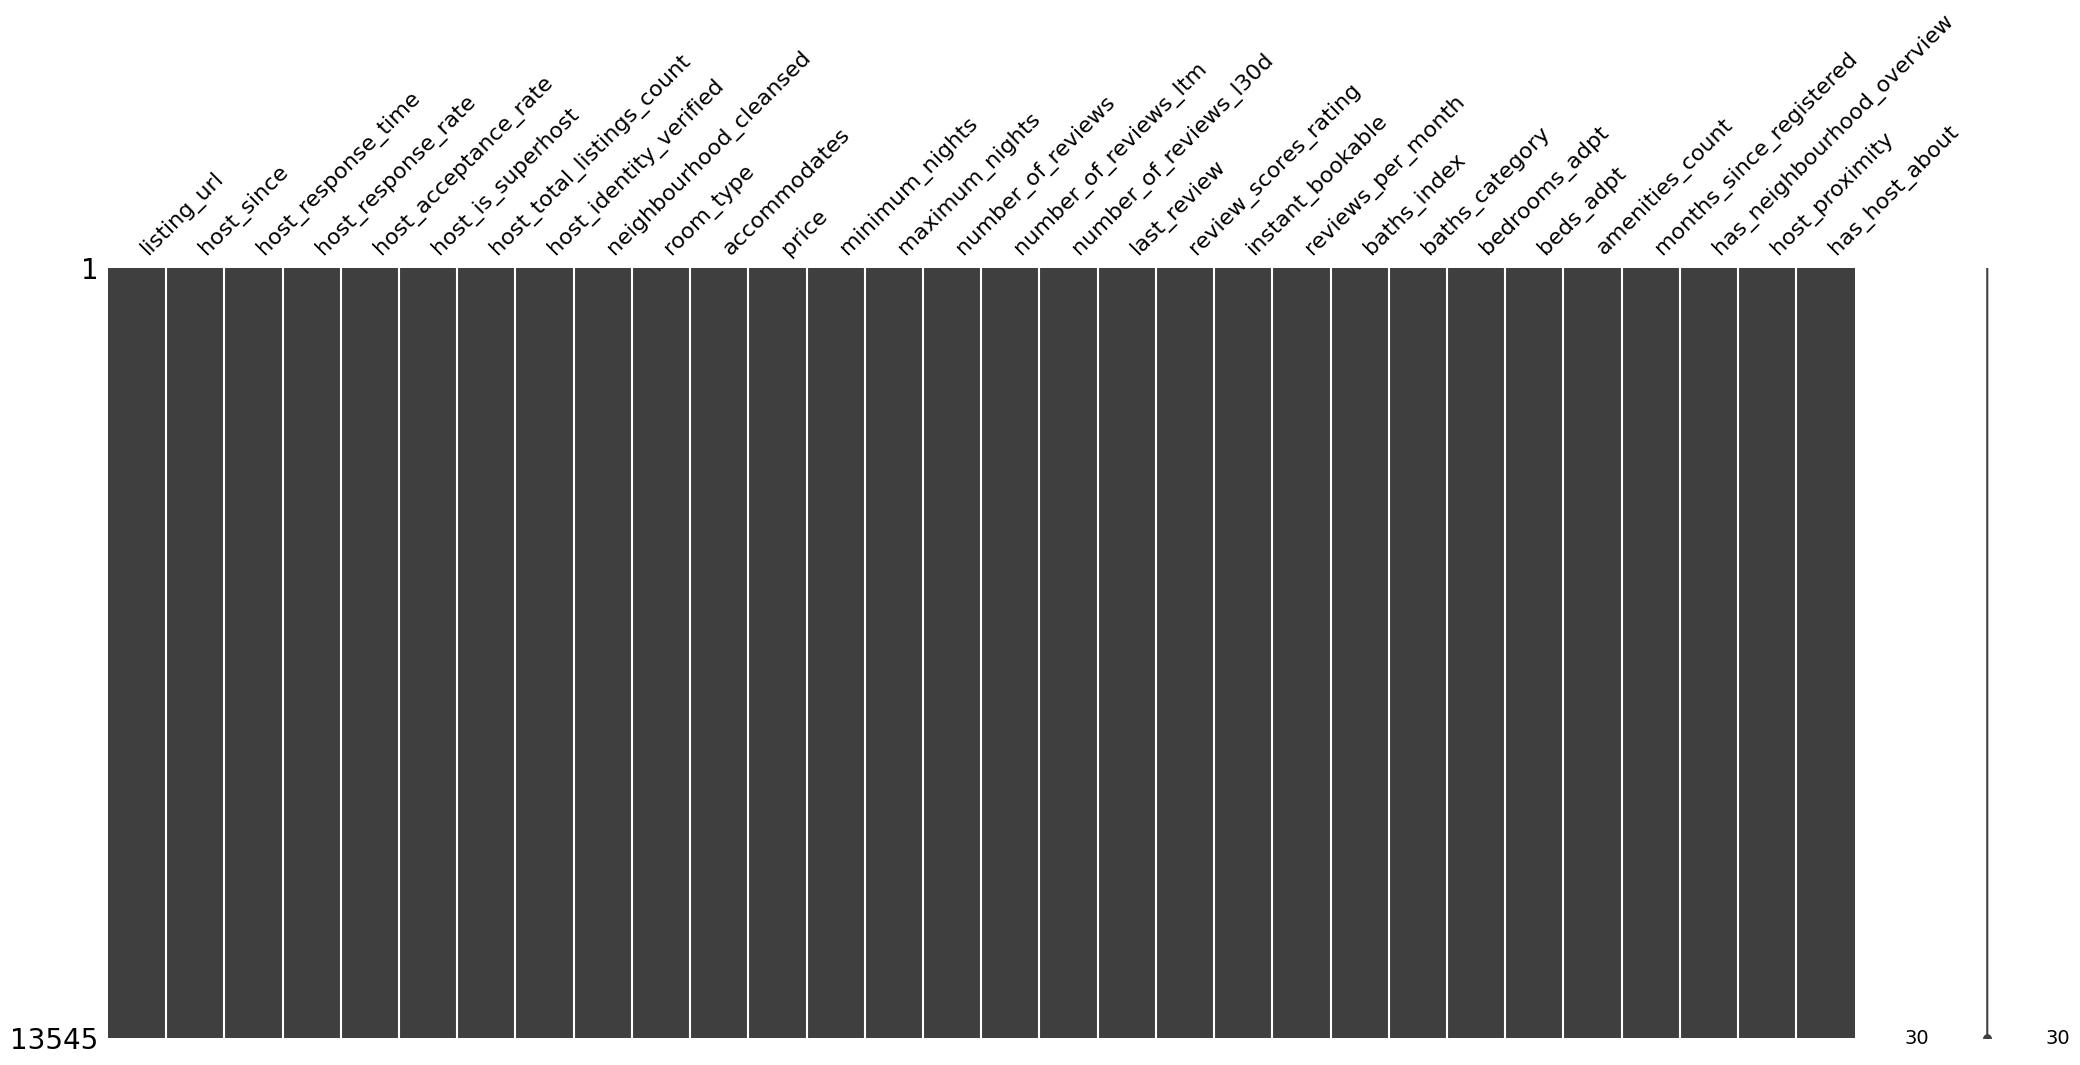

In [ ]:
ms.matrix(ds_treated)

Vou fazer um último ajuste posicionando as colunas do dataset de acordo com as entidades com as quais estou trabalhando e também aproximando colunas correlatas.

In [ ]:
#colunas Acomodação
colunas_acomodacao = [LISTING_URL, ROOM_TYPE, ACCOMMODATES, BEDROOMS_ADPT,\
                      BEDS_ADPT, BATHS_INDEX, BATHS_CATEGORY, AMENITIES_COUNT,\
                      PRICE, MINIMUM_NIGHTS, MAXIMUM_NIGHTS,\
                      REVIEW_SCORES_RATING, NUMBER_OF_REVIEWS,\
                      NUMBER_OF_REVIEWS_LTM, NUMBER_OF_REVIEWS_L30D,\
                      LAST_REVIEW, REVIEWS_PER_MONTH, MONTHS_SINCE_REGISTERED,\
                      INSTANT_BOOKABLE, HOST_PROXIMITY]

#colunas Localização da Acomodação
colunas_localizacao = [NEIGHBOURHOOD_CLEANSED, HAS_NEIGHBOURHOOD_OVERVIEW]

#colunas Anfitrião
colunas_anfitriao = [HOST_SINCE, HOST_TOTAL_LISTINGS_COUNT,\
                     HOST_RESPONSE_TIME, HOST_RESPONSE_RATE,\
                     HOST_ACCEPTANCE_RATE, HOST_IS_SUPERHOST,\
                     HOST_IDENTITY_VERIFIED, HAS_HOST_ABOUT]

#definindo a ordem dos grupos
colunas_ordenadas = colunas_acomodacao + colunas_localizacao + colunas_anfitriao

#reposicionando as colunas
ds_treated = ds_treated[colunas_ordenadas]

<Axes: >

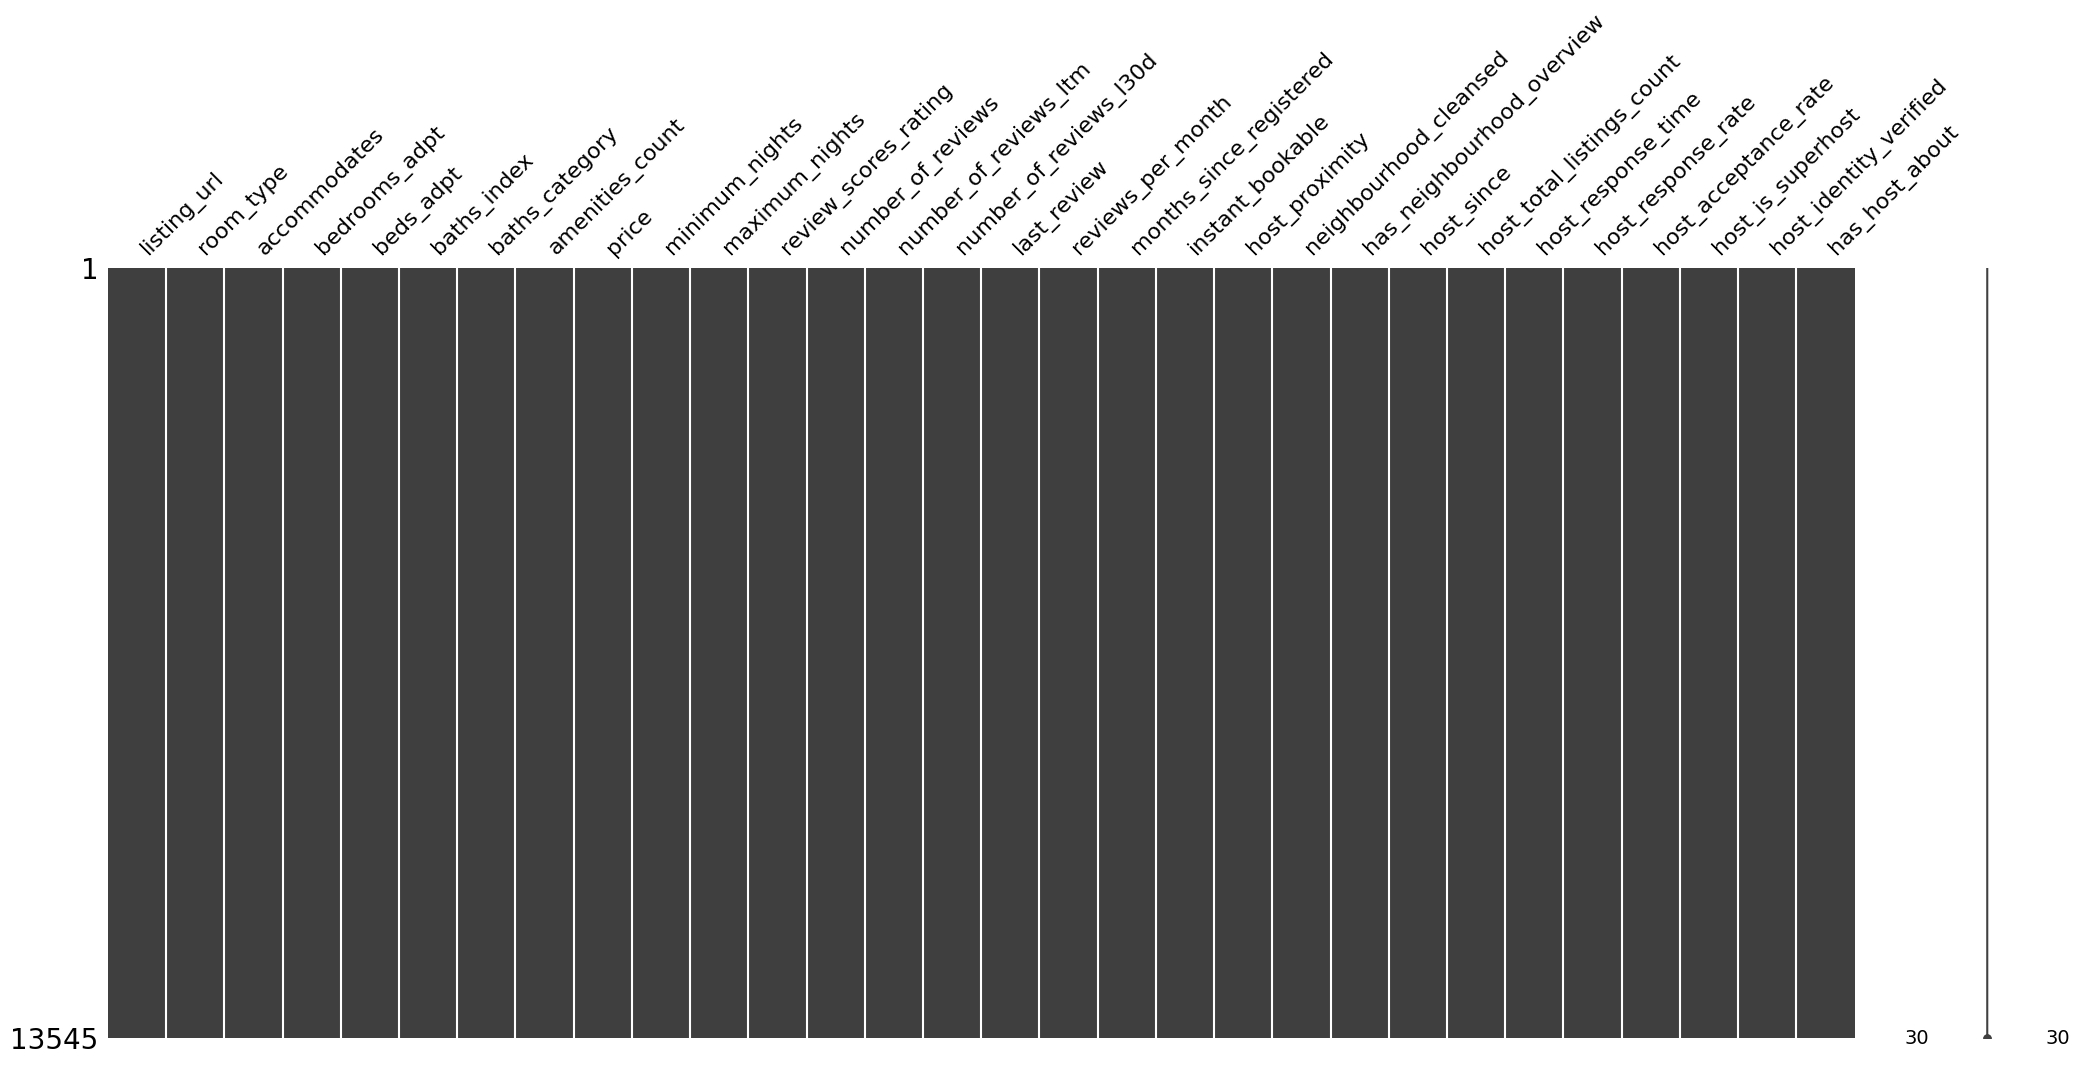

In [ ]:
ms.matrix(ds_treated)

## 5. Dicionário de dados

Incluo o dicionário de dados nesse trecho do notebook por que as variáveis presentes nesse momento no dataset são aquelas que sobreviveram a todas as ações de limpeza e serão profundamente trabalhadas nas próximas seções.

**Informações sobre os atributos:**
1. **listing_url** - URL da acomodação no site Airbnb.
2. **room_type** - Categoria da acomodação podendo ser 'Entire home/apt', 'Private room', 'Shared Room' ou 'Hotel room'.
3. **accommodates** - Quantidade máxima de hóspedes aceitos na acomodação. O limite inferior é 1 e o superior é 16.
4. **bedrooms_adpt** - Quantidade de quartos disponíveis na acomodação. Quando o tipo de acomodação for quarto compartilhado, esse campo recebe um valor fracionado inversamente proporcional a quantidade de hóspedes.
5. **beds_adpt** - Quantidade de camas disponíveis na acomodação.
6. **baths_index** - Valor numérico que representa a quantidade de banheiros disponíveis por hóspede.
7. **baths_category** - Categoria de banheiro, podendo ser 'dedicated', 'shared' ou 'no_bathroom'.
8. **amenities_count** - Quantidade de comodidades oferecidas na acomodação.
9. **price** - Valor numérico indicando o preço padrão em reais (R$) para a diária da acomodação. O preço pode ser diferente em períodos específicos mas aqui considerou-se apenas o valor padrão.
10. **minimum_nights** - Quantidade mínima de noites definida como padrão para a acomodação. O anfitrião pode configurar valores mínimos diferentes para períodos específicos mas nesse trabalho levamos em consideração apenas o valor padrão.
11. **maximum_nights** - Quantidade máxima de noites definida como padrão para a acomodação. O anfitrião pode configurar valores máximos diferentes para períodos específicos mas nesse trabalho levamos em consideração apenas o valor padrão.
12. **review_scores_rating** - Valor numérico que indica a pontuação da avaliação feita pelo hóspedes para a acomodação. Pode variar entre 0 e 5.
13. **number_of_reviews** - Quantidade total de avaliações feitas por hóspedes ao longo da vida da acomodação na plataforma.
14. **number_of_reviews_ltm** - Quantidade total de avaliações da acomodação feitas por hóspedes ao longo dos últimos 12 meses (contanto 12 meses antes do dia 22/09/2023, que foi a data da geração do dataset).
15. **number_of_reviews_l30d** - Quantidade total de avaliações feitas por hóspedes nos últimos 30 dias (referente a 22/09/2023 também).
16. **last_review** - Data da última avaliação feita por um hóspede para a acomodação.
17. **reviews_per_month** - Quantidade média de avaliações feitas por hóspedes por mês, para a acomodação.
18. **months_since_registered** - Quantidade de meses desde que a acomodação foi registrada na plataforma Airbnb.
19. **instant_bookable** - Valor booleano que indica se a acomodação aceita reservas automaticamente, sem necessidade de aceite por parte do anfitrião.
20. **host_proximity** - Categoria que indica se o anfitrião está localizado próximo da acomodação, podendo ter os seguintes valores: 'Very Close', 'Relatively Close', 'Far' ou 'No Information'.
21. **neighbourhood_cleansed** - Categoria que indica o bairro onde se localiza a acomodação.
22. **has_neighbourhood_overview** - Valor booleano que indica se há uma descrição do bairro na publicação da acomodação.
23. **host_since** - Data de registro do anfitrião na plataforma Airbnb. Pode ser a data em que a pessoa entrou como anfitrião ou como hóspede, o evento que aconteceu primeiro, em que ela teve que se registrar.
24. **host_total_listings_count** - Quantidade total de acomodações sob gestão do anfitrião.
25. **host_response_time** - Categoria que indica o tempo de resposta padrão do anfitrião para aquela acomodação, podendo receber os valores 'within an hour', 'within a few hours', 'within a day' ou 'a few days or more'.
26. **host_response_rate** - Valor numérico que indica a taxa de resposta do anfitrião para a acomodação.
27. **host_acceptance_rate** - Valor numérico que indica a taxa de aceite do anfitrião para os pedidos de reserva da acomodação.
28. **host_is_superhost** - Valor booleano que indica se o anfitrião é um super host. Esse selo é dado pela própria plataforma Airbnb em avaliações feitas a cada 3 meses. Para mais detalhes, veja as [regras](https://www.airbnb.com.br/help/article/829).
29. **host_identity_verified** - Valor booleano que indica se o anfitrião deve a identidade verificada.
30. **has_host_about** - Valor booleano que indica se a descrição sobre o anfitrião está preenchida.

## 6. Análise visual dos dados

### 6.1 Análise unidimensional

Nesta seção farei análises de cada variável de maneira isolada, sem relacioná-las com outras variáveis.



#### 6.1.1 Entidade Acomodação

Primeiramente vou usar histogramas para visualizar a distribuição das variáveis quantitativas.

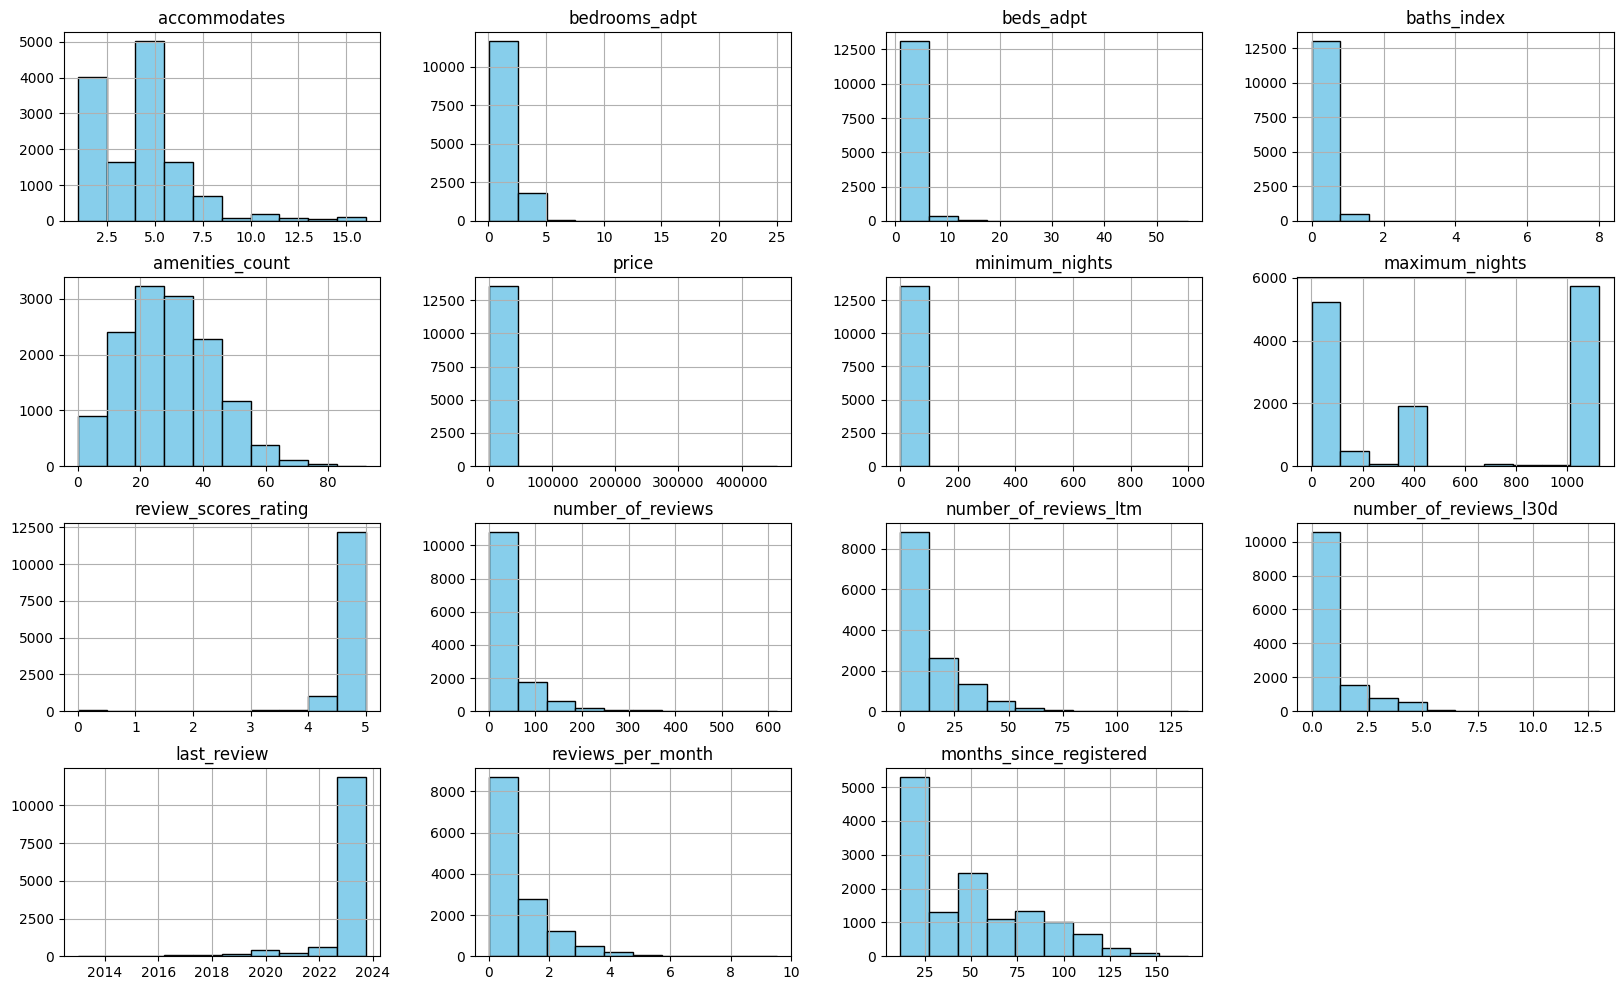

In [ ]:
# Histogramas dos dados de Acomodação
ds_treated[colunas_acomodacao]\
  .hist(figsize = (20,12), color='skyblue', edgecolor='black')
plt.show()

Alguns comentários sobre os resultados:

*   a maioria dos gráficos apresente uma distribuição de dados com assimetria à direita;
*   alguns gráficos como os das variáveis review_scores_rating e last_review apresentam assimetria à esquerda;
*   o gráfico da variável maximum_nights apresenta um padrão multimodal; a interpretação disso indica que alguns anfitriões de fato usam Airbnb para aluguel por temporada em períodos curtos (o grupo presente no primeiro pico) mas outros usam a plataforma para aluguéis de mais longo prazo.
*   o gráfico da variável accommodates apresenta um padrão bimodal com assimetria à direita;
*   o único gráfico que se aproxima de uma distribuição normal é o da variável amenities_count, mas tem uma leve assimetria à direita.
  .

Vou analisar com mais detalhe a variável accommodates, ainda usando histograma, para identificar em que valores ficam os dois picos do bimodal.





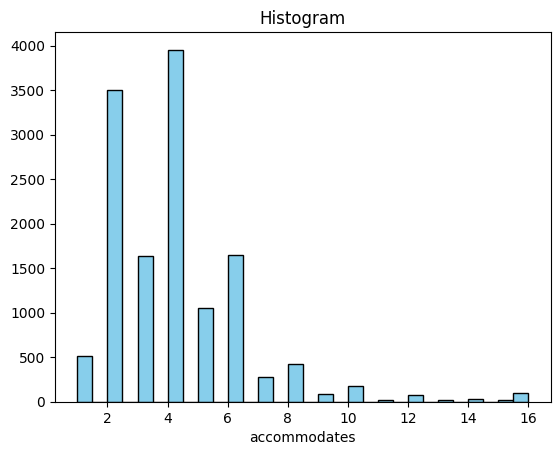

In [ ]:
# exibir histograma apenas de accommodates
render_histogram_chart(ds_treated[ACCOMMODATES], 30)

Podemos agora notar claramente que para essa variável os dois picos acontecem com os valores 2 e 4. Interessante notar também um padrão normal com assimetria à direita quando observamos valores pares e outro padrão normal quando observamos valores ímpares.

Vou destarcar esse comportamento diferenciando por cores.

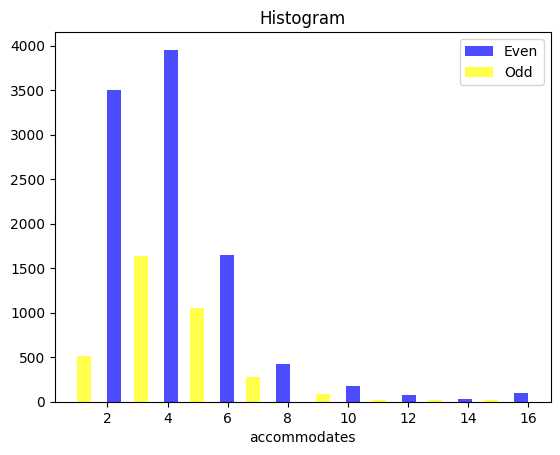

In [ ]:
# Separar os dados em pares e ímpares
dados_pares = ds_treated[ACCOMMODATES][ds_treated[ACCOMMODATES] % 2 == 0]
dados_impares = ds_treated[ACCOMMODATES][ds_treated[ACCOMMODATES] % 2 != 0]

# Configurar o número desejado de bins
numero_de_bins = 30

# Plotar as barras para valores pares em azul
plt.hist(dados_pares, bins=numero_de_bins,\
         color='blue', alpha=0.7, label='Even')

# Plotar as barras para valores ímpares em amarelo
plt.hist(dados_impares, bins=numero_de_bins,\
         color='yellow', alpha=0.7, label='Odd')

plt.title('Histogram')
plt.xlabel(ds_treated[ACCOMMODATES].name)
plt.legend()
plt.show()

Agora vou usar boxplot para visualizar quartis, mediana e a presença de outliers.

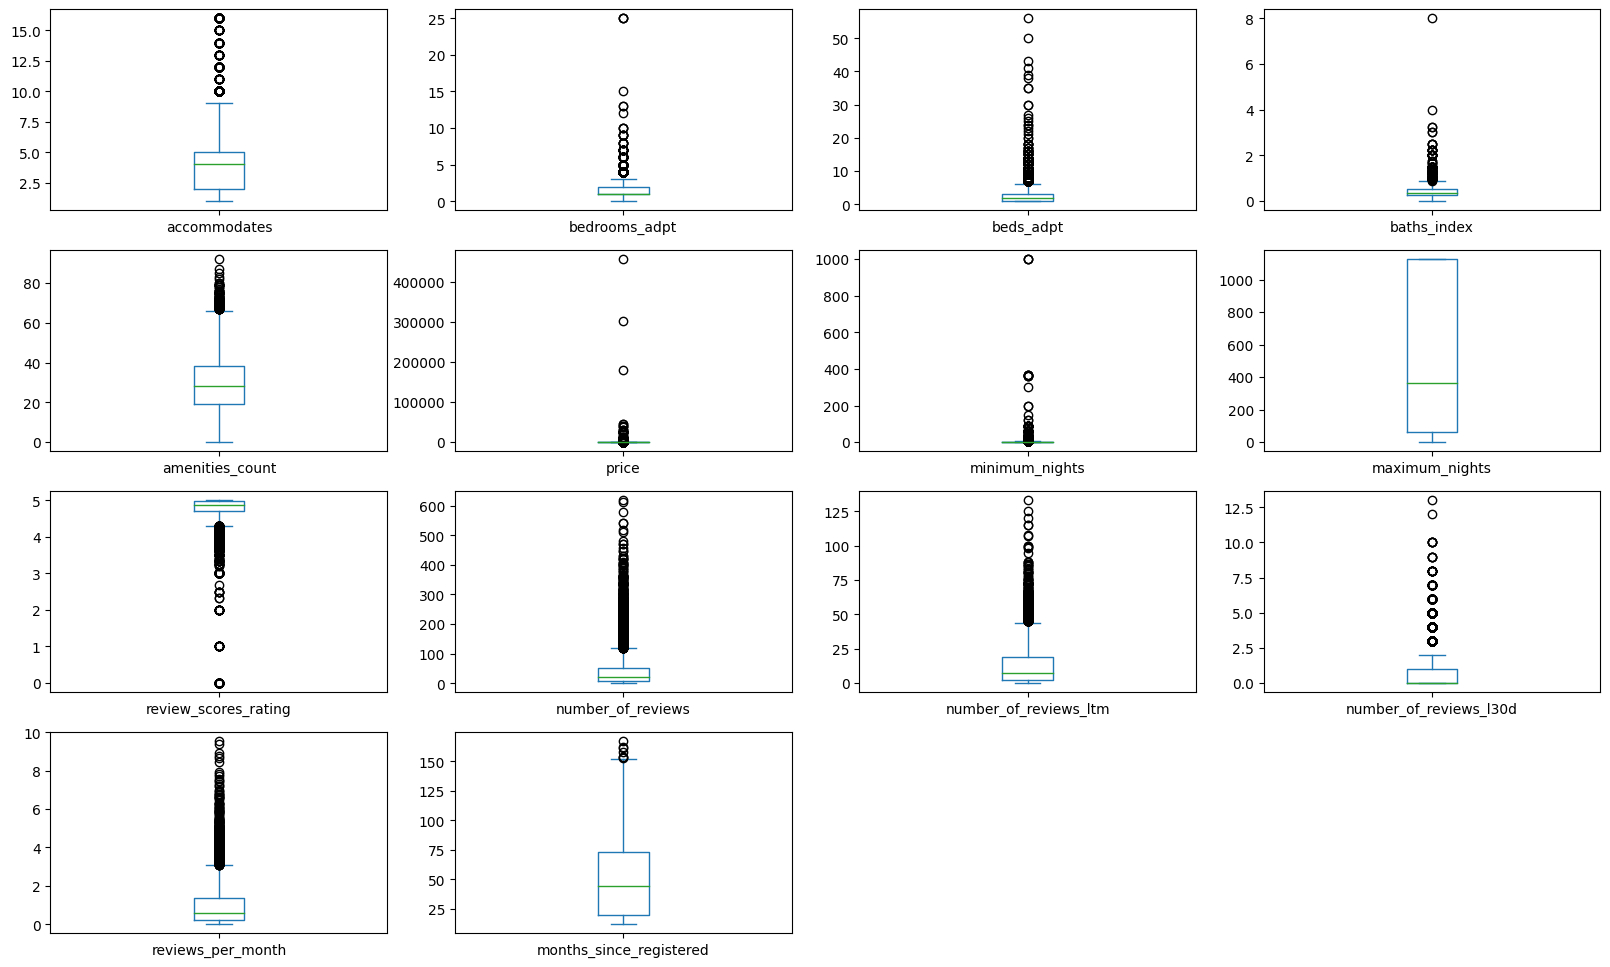

In [ ]:
# Boxplot
ds_treated[colunas_acomodacao]\
    .plot(kind = 'box', subplots = True, layout = (4,4),\
          sharex = False, sharey = False, figsize = (20,12))
plt.show()

Para algumas variáveis, a forte concentração de valores em determinada faixa junto com a presença de outliers faz com que a visualização da distribuição de dados por boxplot fique dificultada. A variável price é o exemplo mais extremo desse cenário.

Vou olhar em mais detalhe essa variável.

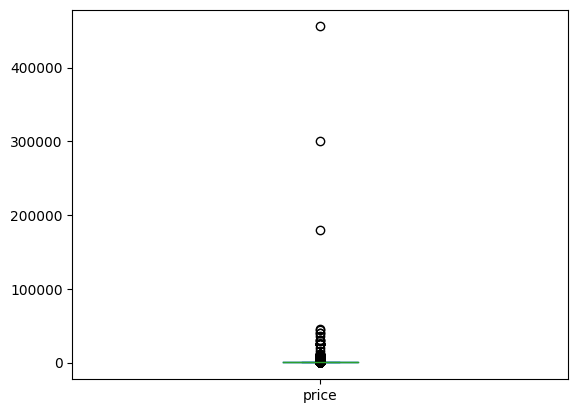

In [ ]:
# Boxplot
ds_treated[PRICE].plot(kind = 'box')
plt.show()

Notem que gerar um gráfico isolado dessa variável não ajuda, mesmo com esse gráfico ficando maior.

Vou aplicar uma função logarítmica para tornar a distribuição mais fácil de visualizar.

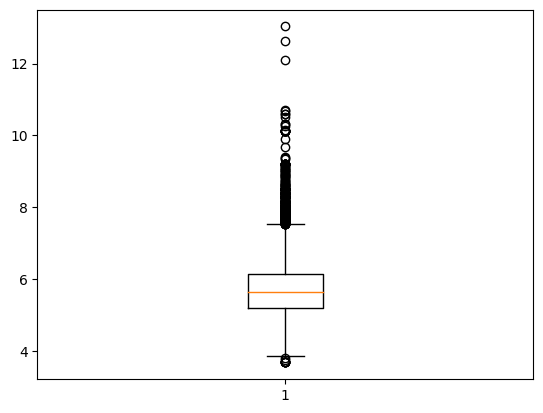

In [ ]:
# visualizando usando função logaritmica
plt.boxplot(np.log(ds_treated[PRICE]))
plt.show()

A visualização fica melhor mais ainda assim, existem dificuldades pela grande presença de outliers e pelo fato do eixo y receber valores não facilmente interpretáveis.

Vou gerar o gráfico sem a presença de outliers.

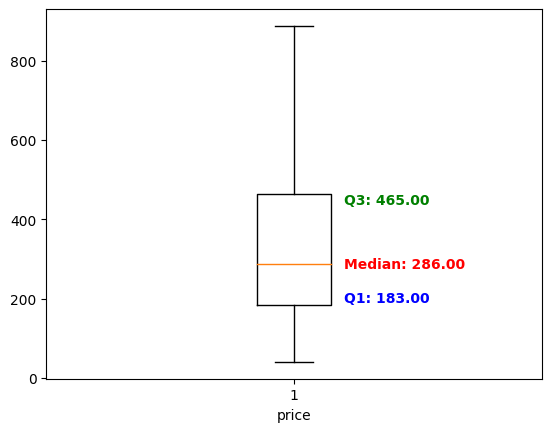

In [ ]:
# boxplot de price
render_one_boxplot(ds_treated[PRICE], False)

Essa versão do gráfico, sem os outliers, é a que mais facilita a leitura. Além disso incluí na mesma os valores do primeiro e terceiro quartis e também a mediana.  

Outra variável bem difícil de ler por boxplot usando as configurações padrão é a minimum_nights.

Vejamos como fica a visualização dela retirando os outliers.

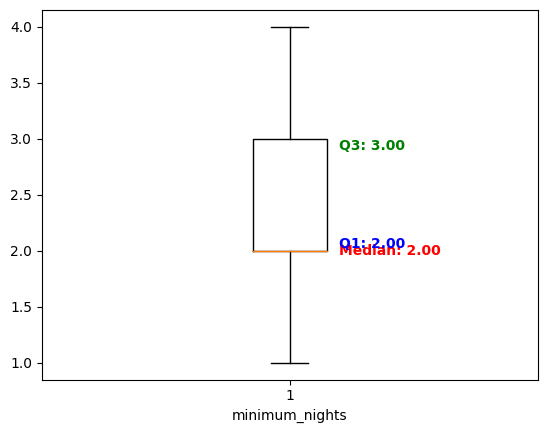

In [ ]:
render_one_boxplot(ds_treated[MINIMUM_NIGHTS], False)

Notem que existe uma concentração tão grande no valor 2 que o gráfico exibe o primeiro quartil e a mediana com valor 2, sobrepostos.

Posso revisitar a estatística dessa variável com o método describe para confirmar a interpretação.

In [ ]:
ds_treated[MINIMUM_NIGHTS].describe()

count    13545.000000
mean         3.768549
std         18.161486
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max        999.000000
Name: minimum_nights, dtype: float64

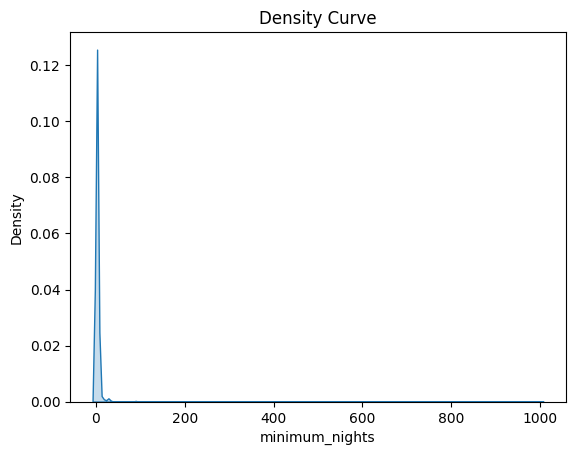

In [ ]:
#gráfico de densidade de minimum_nights
render_density_chart(ds_treated[MINIMUM_NIGHTS])

A curva de densidade comprova a observação.

Preciso analisar com mais detalhe a variável number_of_reviews_ltm por que ela representa a variável alvo com a qual quero trabalhar. Lembrando que essa variável informa a quantidade de reviews nos últimos 12 meses. Já vimos na primeira renderização de histogramas que ela tem uma assimetria à direita e também vimos na renderização boxplot que existe uma certa quantidade de outliers.

Faço agora uma renderização excluindo outliers.

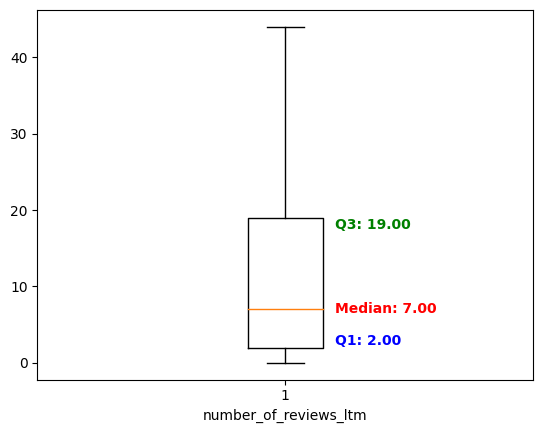

In [ ]:
render_one_boxplot(ds_treated[NUMBER_OF_REVIEWS_LTM], False)

Além das variáveis numéricas, a entidade Acomodação também engloba variáveis de outras tipagens. São as variáveis room_type, baths_category, last_review, instant_bookable e host_proximity. Vejamos agora dados sobre elas.

Para  variáveis categóricas com poucas categorias, utilizarei sempre um gráfico de barras ao lado de um gráfico do tipo donut, para vermos valores absolutos e valores percentuais com duas visões distintas.

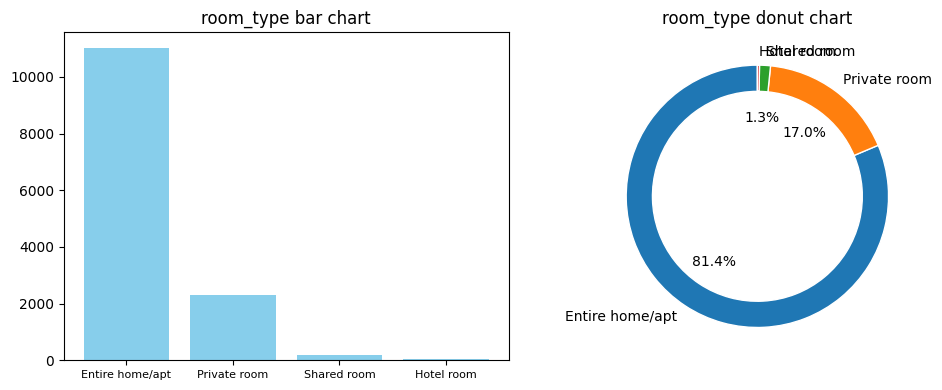

In [ ]:
#renderizar gráficos bar e donut para room_type
render_bar_and_donut_charts(ds_treated[ROOM_TYPE])

A maioria das acomodações são oferecidas na modalidade propriedade completa.

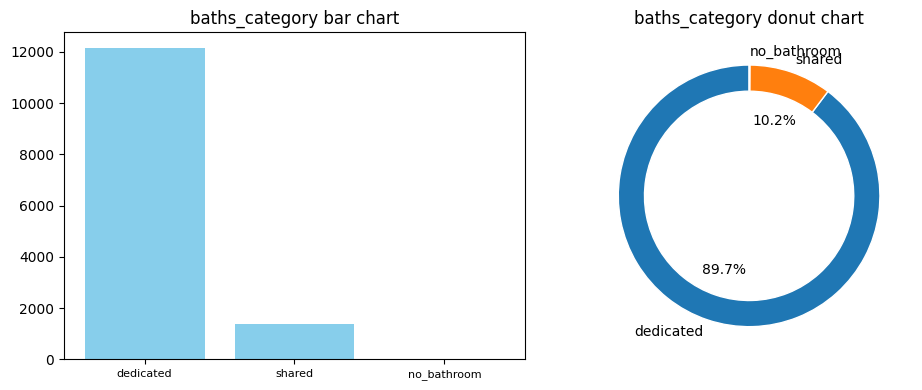

In [ ]:
#renderizar gráficos bar e donut para baths category
render_bar_and_donut_charts(ds_treated[BATHS_CATEGORY])

A maioria das acomodações tem um banheiro dedicado.

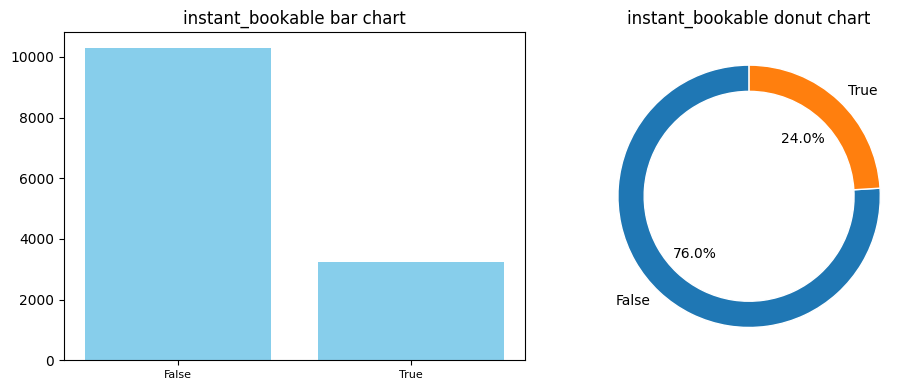

In [ ]:
#renderizar gráficos bar e donut para instant_bookable
render_bar_and_donut_charts(ds_treated[INSTANT_BOOKABLE])

Interessante perceber que a maioria dos anfitriões prefere revisar os pedidos de hospedagem antes de aceitar.

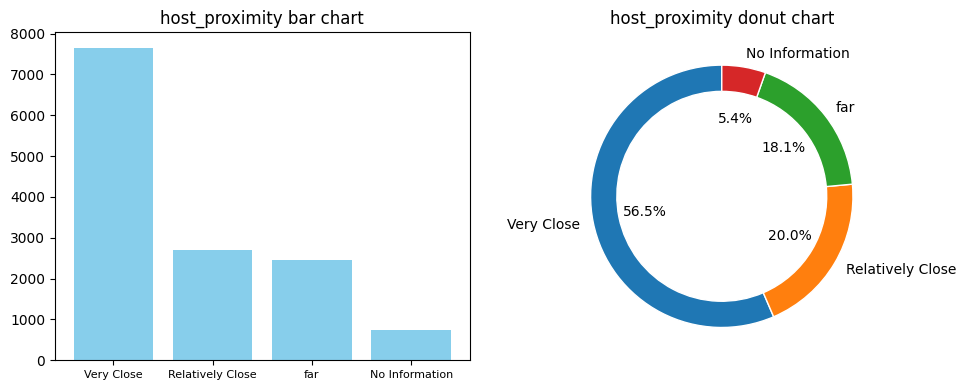

In [ ]:
#renderizar gráficos bar e donut para host_proximity
render_bar_and_donut_charts(ds_treated[HOST_PROXIMITY])

Agora exibo a variável last_review, do tipo datetime, usando uma gráfico de curva de densidade. Como essa variável informa a data da última revisão recebida pela acomodação, poderemos ter uma noção do nível de atividade das diversas acomodações segundo esse critério.

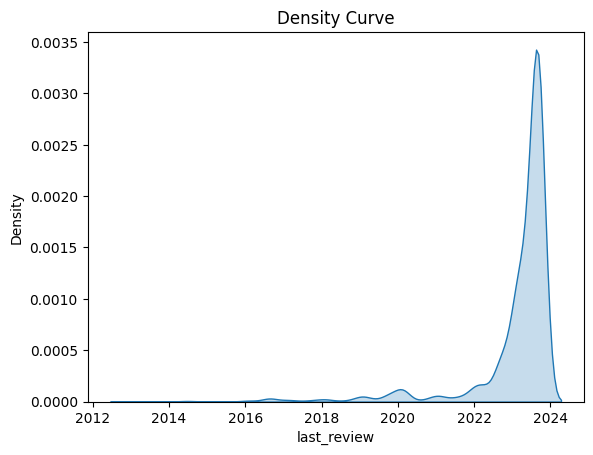

In [ ]:
# renderizando a curva de densidade da variável last_review
render_density_chart(ds_treated[LAST_REVIEW])

Podemos notar uma concentração alta de últimas revisões acontecendo em períodos recentes. Por essa observação, podemos afirmar que as acomodações presentes na listagem tiveram pelo menos uma avaliação em períodos recentes.

#### 6.1.2 Entidade Localização da Acomodação



Essa entidade engloba apenas as variáveis neighbourhood_cleansed e has_neighbourhood_overview. Vejamos como elas se comportam.

Vou iniciar com a variável neighbourhood_cleansed que indica o bairro onde se localiza a acomodação. Notem que essa é uma variável categórica com um grande número de categorias. Vou optar por um gráfico de barras na horizontal para facilitar a leitura.

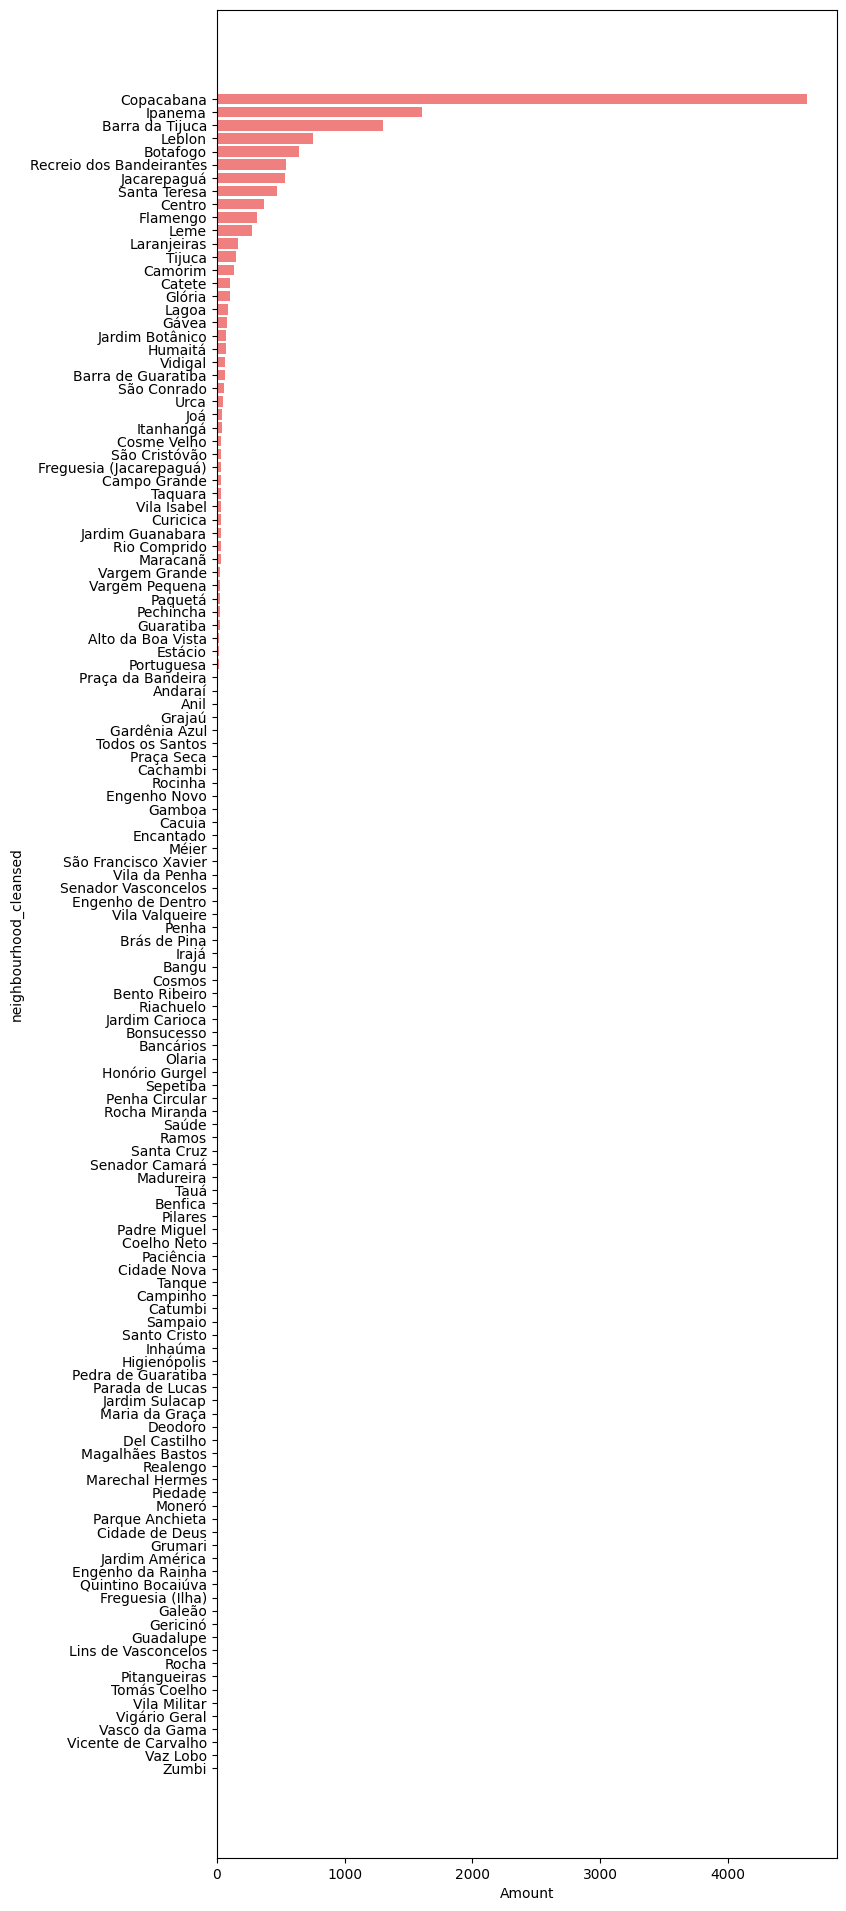

In [ ]:
# renderizar gráfico de barras horizontal dos bairros
render_bar_chart_horizontal(ds_treated[NEIGHBOURHOOD_CLEANSED])

Podemos ver que existe uma grande quantidade de acomodações disponíveis em poucos bairros com outros tendo pouca oferta. Quero agora conferir esses dados calculando o percentual acumulativo, para ter uma visão 80/20.

In [ ]:
# analisando percentuais de maneira acumulativa
print_cumulative_percentage(ds_treated[NEIGHBOURHOOD_CLEANSED])

                     Category  Amount  Cumulative percentage
0                  Copacabana    4618                   34.1
1                     Ipanema    1602                   45.9
2             Barra da Tijuca    1297                   55.5
3                      Leblon     752                   61.0
4                    Botafogo     643                   65.8
5    Recreio dos Bandeirantes     545                   69.8
6                 Jacarepaguá     535                   73.8
7                Santa Teresa     469                   77.2
8                      Centro     372                   80.0
9                    Flamengo     316                   82.3
10                       Leme     273                   84.3
11                Laranjeiras     167                   85.6
12                     Tijuca     150                   86.7
13                    Camorim     133                   87.6
14                     Catete     108                   88.4
15                     G


Notem que os 9 primeiros bairros presentes na lista contemplam 80% das acomodações disponíveis no Rio de Janeiro. O bairro de Copacabana concentra mais de 1/3 das acomodações da cidade.


Sigo agora para a segunda variável dessa entidade, has_neighbourhood_overview, que é aquele que indica se o anfitrião colocou uma descrição do bairro onde se localiza a acomodação.

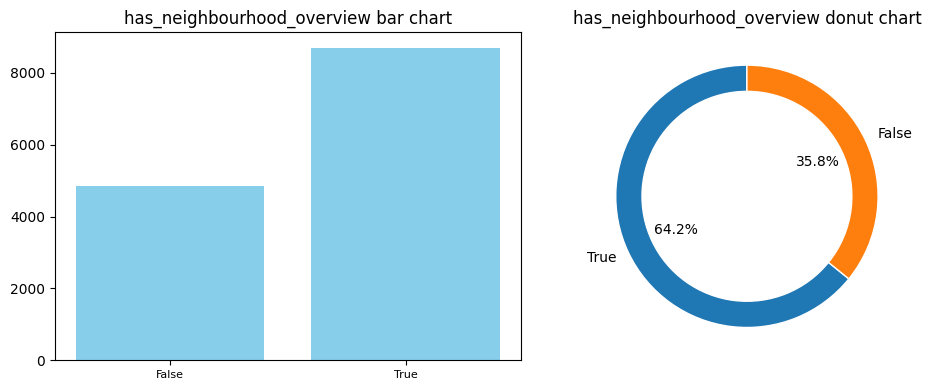

In [ ]:
render_bar_and_donut_charts(ds_treated[HAS_NEIGHBOURHOOD_OVERVIEW])

Cerca de 2/3 das acomodações receberam essas descrições do bairro por parte de seus anfitriões.

#### 6.1.3 Entidade Anfitrião

As variáveis englobadas pela entidade Anfitrião são host_since, host_total_listings_count, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_identity_verified e has_host_about. Temos data, categorias, valores numéricos e booleanos.


Existe uma observação importante a ser feita aqui, para que melhor interpretemos os dados. O dataset deste trabalho é um dataset [desnormalizado](https://en.wikipedia.org/wiki/Denormalization) quando olhamos para ele sob a ótica da entidade Anfitrião. Existem anfitriões que administram mais de uma acomodação então dados referentes a esses anfitriões estarão repetidos no dataset. Se não ficarmos atentos a esse detalhe, podemos interpretar de maneira errada alguns dos resultados.

Logo abaixo eu apresento um recorte do dataset mostrando dados referentes ao anfitrião que administra a maior quantidade de acomodações da cidade. Notem como os dados desse anfitrião se repetem em cada acomodação, comprovando a desnormalização.

In [ ]:
# obtendo as primeiras acomodações do anfitriao que administra
# a maior quantidade de acomodacoes
ds[ds[HOST_TOTAL_LISTINGS_COUNT] ==\
    ds[HOST_TOTAL_LISTINGS_COUNT]\
        .max()][[HOST_NAME, HOST_RESPONSE_TIME, HOST_RESPONSE_RATE,\
                 HOST_ACCEPTANCE_RATE, HOST_SINCE, HOST_LISTINGS_COUNT,\
                 HOST_TOTAL_LISTINGS_COUNT]].head(30)

host_name host_response_time host_response_rate host_acceptance_rate  \
15421     Tabas     within an hour               100%                  97%   
15430     Tabas     within an hour               100%                  97%   
15794     Tabas     within an hour               100%                  97%   
15860     Tabas     within an hour               100%                  97%   
15949     Tabas     within an hour               100%                  97%   
16004     Tabas     within an hour               100%                  97%   
16114     Tabas     within an hour               100%                  97%   
16233     Tabas     within an hour               100%                  97%   
16235     Tabas     within an hour               100%                  97%   
16297     Tabas     within an hour               100%                  97%   
16425     Tabas     within an hour               100%                  97%   
16518     Tabas     within an hour               100%                  97%   
16519     Tabas     within an hour               100%                  97%   
16709     Tabas     within an hour               100%                  97%   
16743     Tabas     within an hour               100%                  97%   
16750     Tabas     within an hour               100%                  97%   
16830     Tabas     within an hour               100%                  97%   
16883     Tabas     within an hour               100%                  97%   
17114     Tabas     within an hour               100%                  97%   
17540     Tabas     within an hour               100%                  97%   
17552     Tabas     within an hour               100%                  97%   
17557     Tabas     within an hour               100%                  97%   
17559     Tabas     within an hour               100%                  97%   
17576     Tabas     within an hour               100%                  97%   
17588     Tabas     within an hour               100%                  97%   
17598     Tabas     within an hour               100%                  97%   
17599     Tabas     within an hour               100%                  97%   
17601     Tabas     within an hour               100%                  97%   
17625     Tabas     within an hour               100%                  97%   
17689     Tabas     within an hour               100%                  97%   

       host_since  host_listings_count  host_total_listings_count  
15421  2020-03-17               1311.0                     1803.0  
15430  2020-03-17               1311.0                     1803.0  
15794  2020-03-17               1311.0                     1803.0  
15860  2020-03-17               1311.0                     1803.0  
15949  2020-03-17               1311.0                     1803.0  
16004  2020-03-17               1311.0                     1803.0  
16114  2020-03-17               1311.0                     1803.0  
16233  2020-03-17               1311.0                     1803.0  
16235  2020-03-17               1311.0                     1803.0  
16297  2020-03-17               1311.0                     1803.0  
16425  2020-03-17               1311.0                     1803.0  
16518  2020-03-17               1311.0                     1803.0  
16519  2020-03-17               1311.0                     1803.0  
16709  2020-03-17               1311.0                     1803.0  
16743  2020-03-17               1311.0                     1803.0  
16750  2020-03-17               1311.0                     1803.0  
16830  2020-03-17               1311.0                     1803.0  
16883  2020-03-17               1311.0                     1803.0  
17114  2020-03-17               1311.0                     1803.0  
17540  2020-03-17               1311.0                     1803.0  
17552  2020-03-17               1311.0                     1803.0  
17557  2020-03-17               1311.0                     1803.0  
17559  2020-03-17      

Vejamos o comportamento das variáveis de Anfitrião.

Primeiramente vou usar histogramas para visualizar a distribuição das variáveis quantitativas.

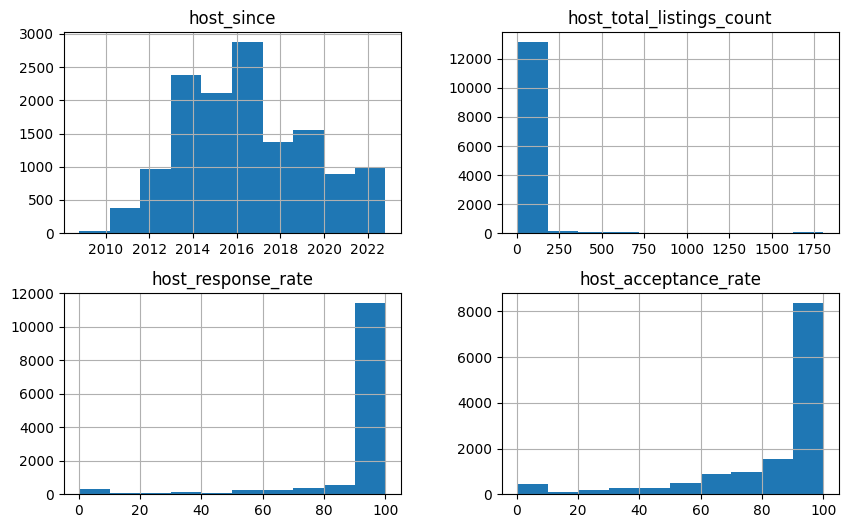

In [ ]:
# Histogramas dos dados de Acomodação
ds_treated[colunas_anfitriao].hist(figsize = (10,6))
plt.show()

Podemos notar um padrão normal para variável host_since, uma assimetria à direita para host_total_listings_count, e assimetrias à esquerda para host_response_rate e host_acceptance_rate.

Agora vou usar boxplot para visualizar quartis, mediana e a presença de outliers.

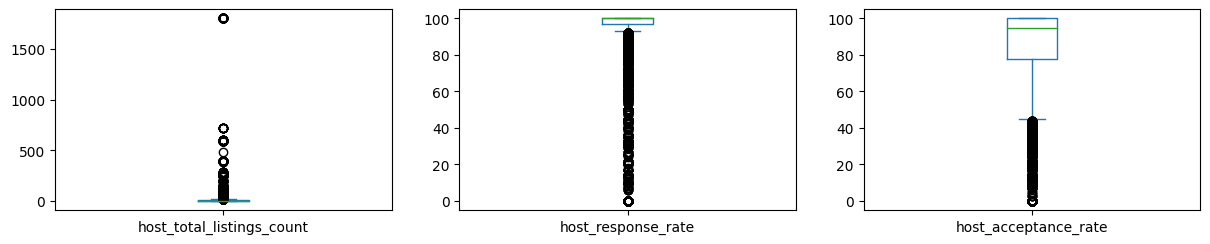

In [ ]:
# Boxplot
ds_treated[colunas_anfitriao]\
    .plot(kind = 'box', subplots = True, layout = (4,4),\
          sharex = False, sharey = False, figsize = (20,12))
plt.show()

As duas primeiras variáveis apresentam alta concentração dos dados em determinadas faixas além da presença de outliers o que dificulta a interpretação do boxplot.

Vou gerar novamente os gráficos desconsiderando outliers.

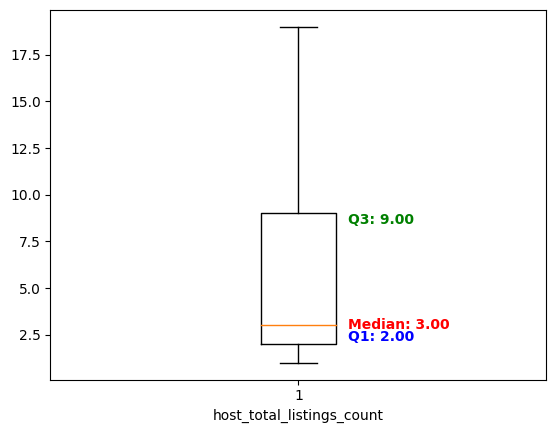

In [ ]:
render_one_boxplot(ds_treated[HOST_TOTAL_LISTINGS_COUNT], False)

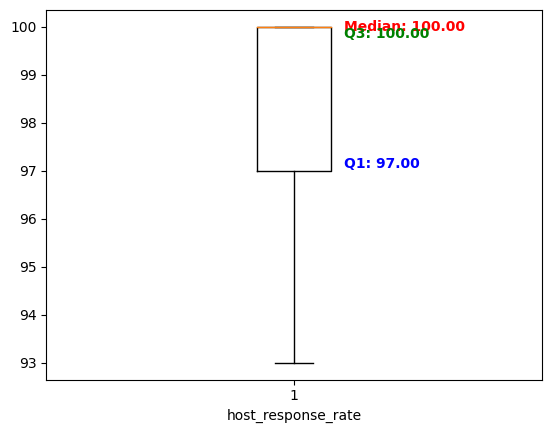

In [ ]:
render_one_boxplot(ds_treated[HOST_RESPONSE_RATE], False)

Notem que agora a leitura fica bem mais fácil.

Observo agora a variável host_since usando gráfico de densidade, assim como fiz com outra variável de data na seção anterior.

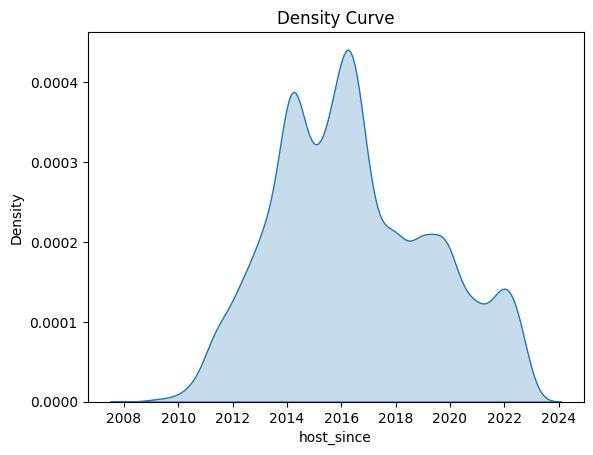

In [ ]:
# renderizar gráfico de densidade da variável host_since
render_density_chart(ds_treated[HOST_SINCE])

Ficam evidentes os dois picos acontecendo em 2014 e 2016, anos em que a cidade recebeu os grandes eventos Copa do Mundo de futebol masculino e Olimpíadas.

Notem que os valores presentes nessa variável não são datas de registro das acomodações e sim de registro dos anfitriões administradores das acomodações na plataforma Airbnb. Se lembrarmos que esse é um dataset desnormalizado, como comentei no início da sessão, devemos considerar que esses picos do gráfico podem estar incrementados pela existência de múltiplas acomodações sendo administradas por um mesmo anfitrião.

Quero observar com mais detalhe a variável host_total_listings_count. O histograma tem uma assimetria à direita mas notem que existe ocorrências no lado direito do diagrama.

Lembrando que essa variával indica a quantidade de acomodações sob administração do anfitrião administrador da acomodação em questão então a característica de desnormalização do dataset também afeta essa leitura.

Para entendermos o comportamento desse histograma nos seus extremos do eixo X, podemos analisar os valores usando head e tail, ordenando pelo índice do retorno de value_counts.

In [ ]:
# verificando a contagem de anfitriões que administram poucas acomodações
ds_treated[HOST_TOTAL_LISTINGS_COUNT].value_counts().sort_index().head(20)

1.0     3324
2.0     2338
3.0     1378
4.0      903
5.0      706
6.0      578
7.0      401
8.0      317
9.0      270
10.0     191
11.0     172
12.0     129
13.0     178
14.0     147
15.0     120
16.0      70
17.0      86
18.0     105
19.0      60
20.0      52
Name: host_total_listings_count, dtype: int64

In [ ]:
# verificando a contagem de anfitriões que administram muitas acomodações
ds_treated[HOST_TOTAL_LISTINGS_COUNT].value_counts().sort_index().tail(20)

119.0     16
122.0     25
129.0      5
130.0     18
146.0     45
151.0     10
154.0     20
194.0     44
195.0     15
234.0      1
248.0     13
265.0     83
288.0      8
383.0      2
399.0     72
481.0      1
594.0     59
607.0     11
722.0     11
1803.0    56
Name: host_total_listings_count, dtype: int64

Num primeiro momento podemos considerar que há uma inconsistência no dado visto que a variável indica um valor absoluto que tem semântica de contagem mas esse valor é diferente da contagem feita pelo nosso próprio código.

O valor 1803, máximo dessa variável, indica que há um anfitrião que administra 1803 acomodações. Sabendo que esse valor se repete para cada acomodação (por causa da desnormalização), deveríamos imaginar que a nossa contagem também deveria chegar ao número 1803, correto? No entanto, precisamos lembrar que um anfitrião pode administrar acomodações em diferentes cidades e nosso dataset considera apenas a cidade do Rio de Janeiro. Além disso, já fizemos ações de limpeza no dataset o que pode ter eliminado da listagem algumas acomodações do anfitrião.

Outra consideração importante é que pode acontecer, principalmente com valores mais baixos, de dois anfitriões administrarem a mesma quantidade de acomodações. Nesse caso, a contagem de ocorrências desses dois serão somadas na agregação do histograma.

Mesmo com essa aparente inconsistência na variável, ela segue sendo importante para o meu trabalho visto que minha hipótese é que administrar muitas acomodações pode influenciar na taxa de ocupação.


Uma maneira de tentar visualizar os dados diminuindo o impacto da agregação feita pelos histogramas seria usar um gráfico de linhas.

Vejamos como fica com esse método.

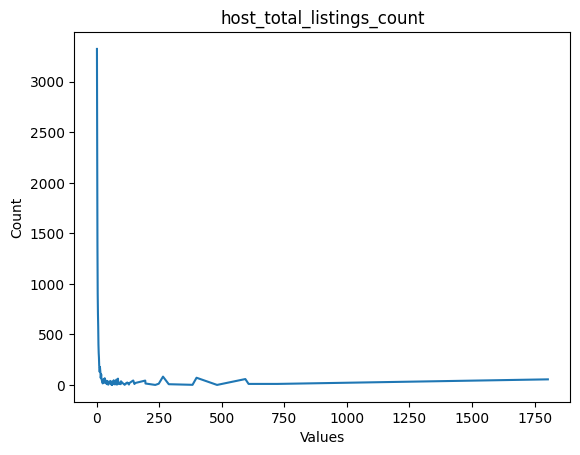

In [ ]:
# renderizando quantidade total de acomodações do anfitrião em gráfico de linhas
render_value_counts_as_line(ds_treated[HOST_TOTAL_LISTINGS_COUNT])

O gráfico de linhas já apresenta o eixo y numa ordem de grandeza mais adequada para os valores da variável, mas ainda assim, a interpretação que podemos fazer a partir dele não é a melhor.

Vejamos como fica um gráfico de dispersão para a mesma variável:

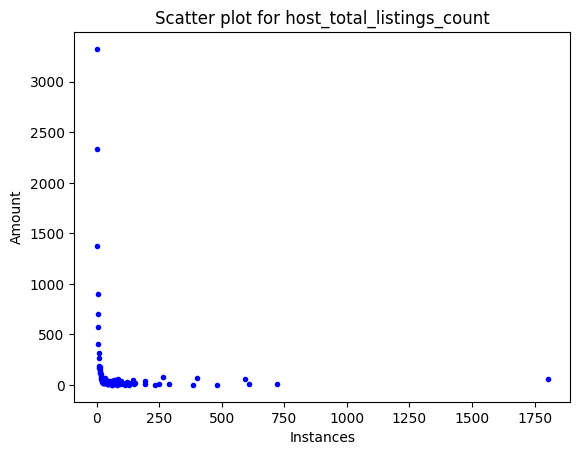

In [ ]:
# renderiza a quantidade de acomodações do anfitrião numa visão em pontos usando scatter plots
render_value_counts_as_dots(ds_treated[HOST_TOTAL_LISTINGS_COUNT])

Agora sim podemos ter uma percepção melhor do que está acontecendo com essa variável, condizente com os retornos dos métodos head e tail executados mais acima.

Vejamos agora as variáveis restantes, de tipos categórico e booleano. São elas host_response_time, host_is_superhost, host_identity_verified e has_host_about.


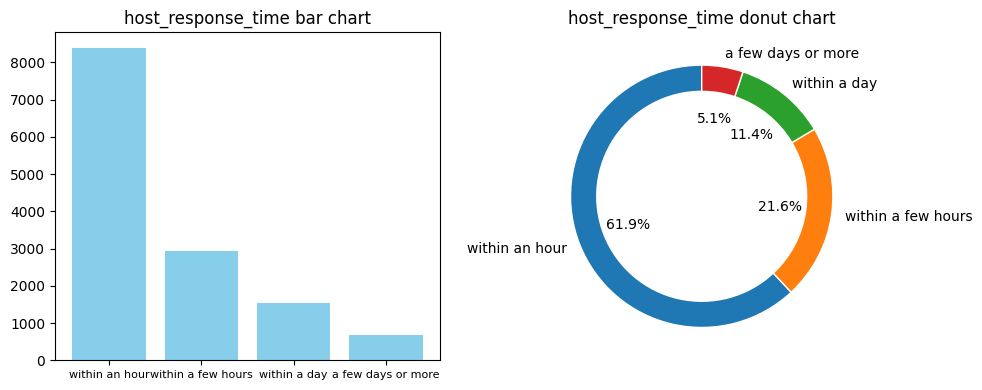

In [ ]:
# renderizando gráfico de barras e donut para variável host_response_time
render_bar_and_donut_charts(ds_treated[HOST_RESPONSE_TIME])

Podemos notar que quase 62% das acomodações indicam que seus hosts respondem em até 1 hora e outros 22% respondem em algumas horas. O restante demora mais para responder.

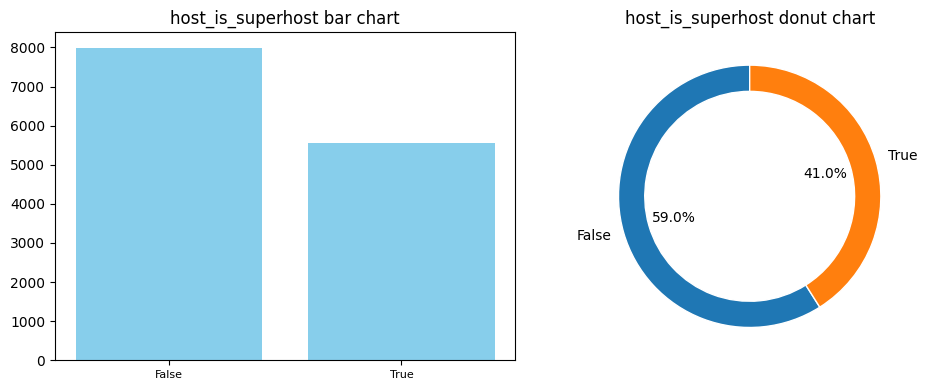

In [ ]:
# renderizando gráfico de barras e donut para variável host_is_superhost
render_bar_and_donut_charts(ds_treated[HOST_IS_SUPERHOST])

Esses gráficos mostram que 41% das acomodações indicam que tem hosts avaliados como super hosts. Exitem [regras específicas](https://www.airbnb.com.br/help/article/828) que precisam ser obedecidas para que um anfitrião seja avaliado dessa maneira.

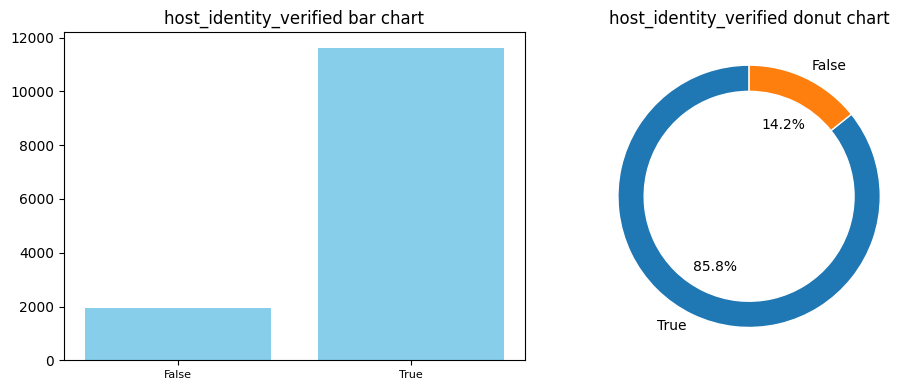

In [ ]:
# renderizando gráfico de barras e donut para variável host_identity_verified
render_bar_and_donut_charts(ds_treated[HOST_IDENTITY_VERIFIED])

A grande maioria dos anfitriões tem suas identidades verificas. Esse tipo de funcionalidade tem ficado bem comum nos diversos produtos digitais e serve como uma abordagem antifraude. Minha hipótese é que acomodações cujos anfitriões tem identidade verificada performam melhor nas suas taxas de ocupação.

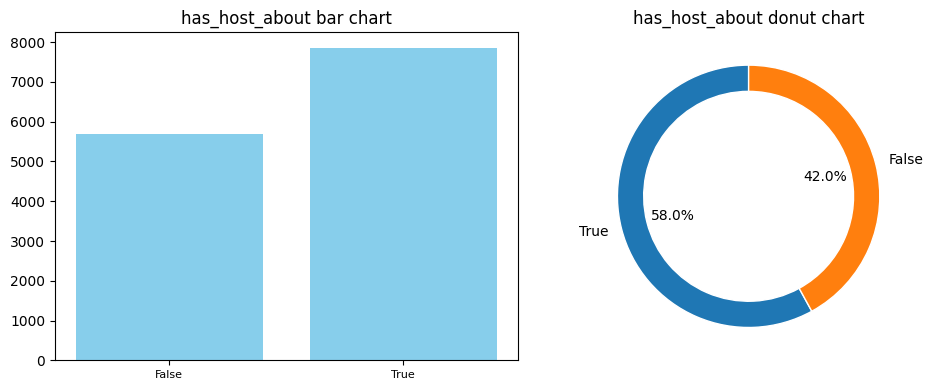

In [ ]:
# renderizando gráfico de barras e donut para variável has_host_about
render_bar_and_donut_charts(ds_treated[HAS_HOST_ABOUT])

Exatamente 58% das acomodações apresentam descrições sobre seus hosts.

### 6.2 Análise multidimensional

Nesta seção farei análises das variáveis relacionando-as umas com as outras.

#### 6.2.1 Matriz de correlação

Inicio gerando uma matriz de correlação, para observarmos a correlação entre as variáveis numéricas.


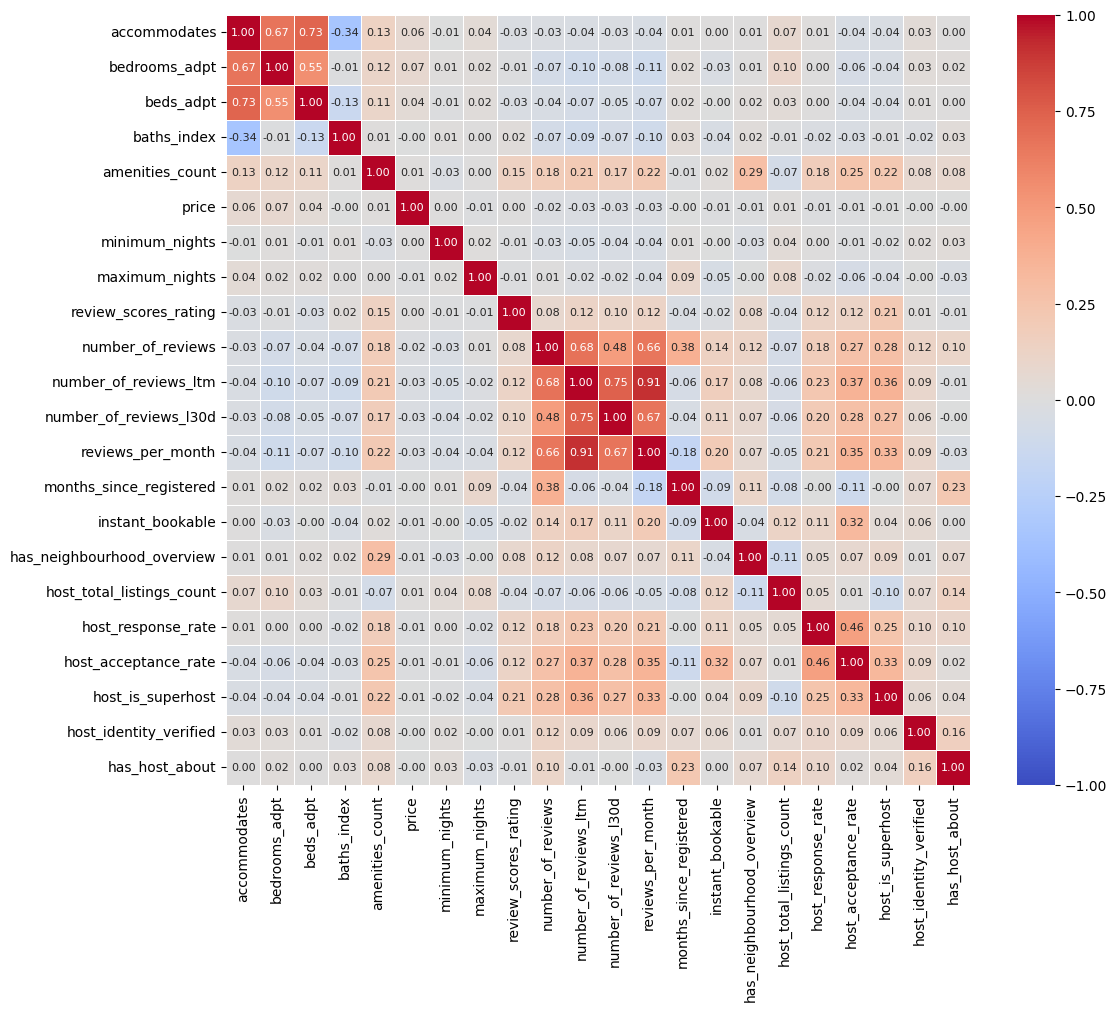

In [ ]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (12,10))
sns.heatmap(ds_treated.corr(), annot=True, cmap='coolwarm',\
            vmin=-1, vmax=1, linewidths=.5, fmt=".2f", annot_kws={"size": 8});

É interessante observar os valores mais altos mas também as manchas presentes na matriz.

No canto superior esquerdo temos uma mancha relacionando variáveis que indicam características físicas das acomodações e faz todo sentido existir uma correlação entre essas características. A quantidade de hóspedes aceitos, a quantidade quartos e a quantidade de camas tem necessariamente que ter uma relação linear positiva. A variável baths_index tem uma relação negativa com a quantidade de hóspedes por que usei justamente esse número como denominador para calcular o índice. Quanto mais hóspedes, mais afetado negativamente fica o índice.

No centro da matriz existe outra mancha indicando correlação positiva alta entre as variáveis mas todas elas tem relação com a quantidade de reviews então faz todo sentido isso acontecer.

As manchas mais interessantes são aquelas localizadas distante da diagonal, pois sinalizam uma correlação entre variáveis que a princípio não tem relação umas com as outras. Vejamos por exemplo as manchas presentes na linha correspondente à variável amenities_count. Existe uma leve relação linear positiva com números relacionados aos reviews o que indica que quanto mais itens de conveniência, melhor são as pontuações de review e a quantidade destes (meu proxy para taxa de ocupação). Também aparece uma leve relação linear positiva com valores de taxa de resposta e taxa de aceites do anfitrião, assim como ao fato do anfitrião ser Super Host. Eu interpreto essa correlação como uma maior habilidade do anfitrião em configurar corretamente as acomodações sob sua administração.

Outra mancha que vale destacar é aquela que relaciona variáveis de review com variáveis de comportamento do anfitrião. Notem que existe uma relação linear positiva entre esses números, o que faz sentido visto que anfitriões com boas taxas de tempo de resposta e de aceite naturalmente tendem a levar suas acomodações a terem mais ocupação e mais reviews.

Notem também uma mancha azul na lateral esquerda, no meio da figura. Apesar dos valores serem baixos, parece acontecer uma relação linear negativa entre o grupo de dados de quantidade de reviews e o grupo de dados que indicam o tamanho total da acomodação (hóspedes, quartos, camas e banheiros). Ou seja, quanto maior a acomodação, menor seriam as quantidades de reviews. Essa relação negativa parece fazer sentido pois é bem mais fácil manter ocupada com hóspedes uma acomodação menor do que uma maior, para grupos grandes.



#### 6.2.2 Boxplots com pequenos múltiplos

Como a variável alvo é a quantidade de reviews nos últimos 12 meses, vale a pena entendermos a relação dessa variável em específico com diversas outras.

Inicio fazendo uma análise de pequenos múltiplos com boxplot passando pelas variáveis categóricas do dataset.


Primeiramente uma visualização considerando outliers.

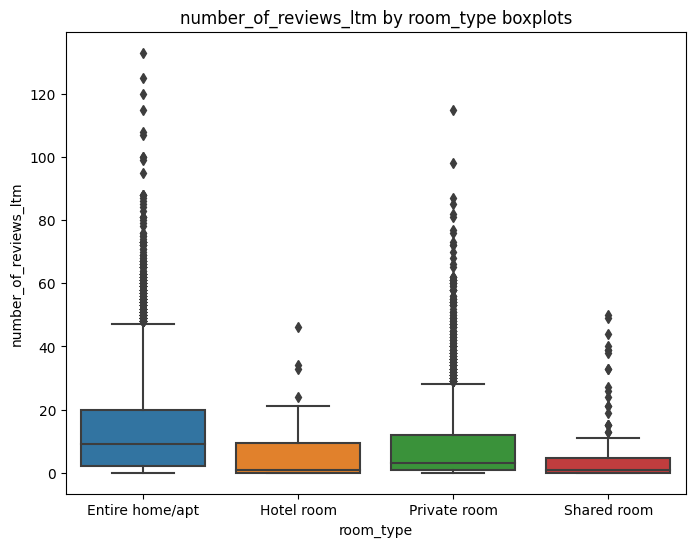

In [ ]:
# renderizar boxplots em pequenos múltiplos considerando outliers
render_box_plot_as_small_multiples(ds_treated, NUMBER_OF_REVIEWS_LTM,\
                                   ROOM_TYPE, True)

Notem a amplitude maior de valor para as acomodações do tipo 'Entire home/apt' e 'Private room'.

E agora uma visualização usando o mesmo gráfico mas sem considerar outliers.

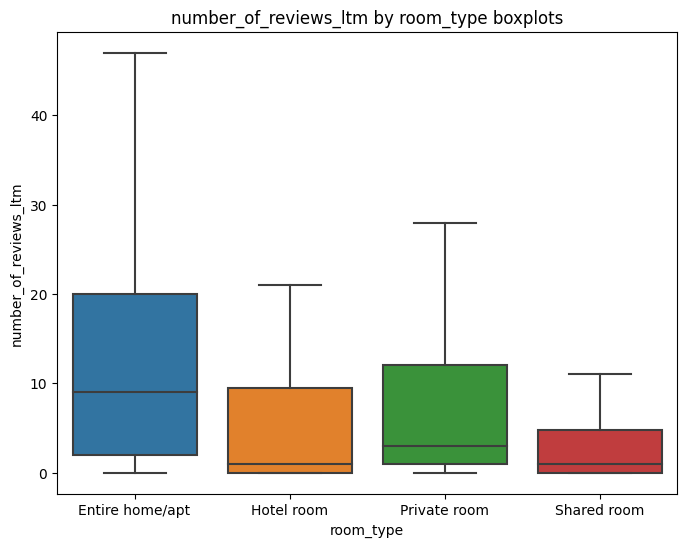

In [ ]:
# renderizar boxplots em pequenos múltiplos não considerando outliers
render_box_plot_as_small_multiples(ds_treated, NUMBER_OF_REVIEWS_LTM,\
                                   ROOM_TYPE, False)

A mediana maior para a variável de quantidade de reviews é claramente das acomodações do tipo 'Entire home/apt'.

Vejamos agora se existe alguma diferença de comportamento dessa variável de acordo com a categoria de banheiro.

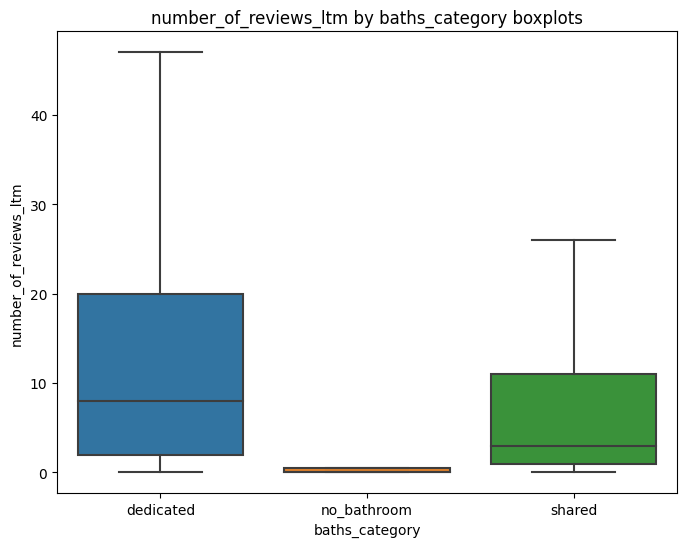

In [ ]:
# renderizar boxplots em pequenos múltiplos não considerando outliers
# para categorias de banheiros
render_box_plot_as_small_multiples(ds_treated, NUMBER_OF_REVIEWS_LTM,\
                                   BATHS_CATEGORY, False)

Sim, existe. Acomodações com banheiro do tipo 'dedicated' tem mediana maior mas provavelmente essa tendência decorre do fato de que banheiros dedicados existem mais comummente em acomodações do tipo 'Entire home/apt' e já vimos que esse tipo de acomodação tem mediana maior para quantidade de reviews.

Vejamos agora se as acomodações com agendamento automático ganham daquelas sem essa característica.

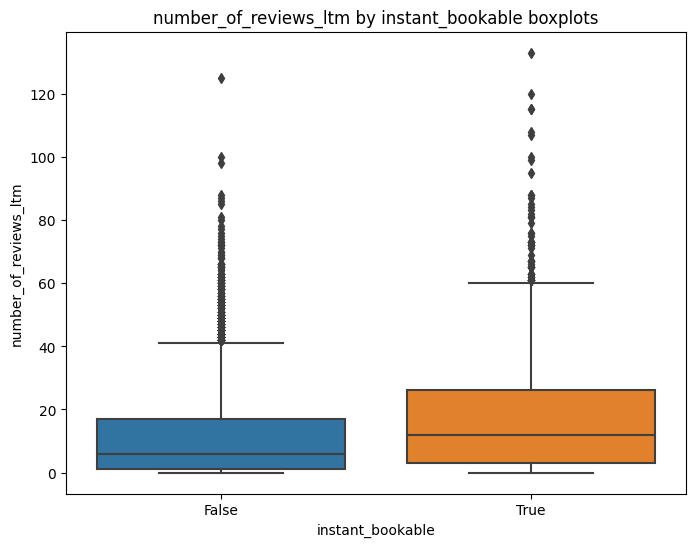

In [ ]:
# renderizar boxplots em pequenos múltiplos não considerando outliers
# para instant_bookable
render_box_plot_as_small_multiples(ds_treated, NUMBER_OF_REVIEWS_LTM,\
                                   INSTANT_BOOKABLE, True)

Sim, podemos ver pelos dados estatísticos do bloxplot que acomodações com agendamento automático no geral ganham em quantidade de reviews.

Vejamos agora considerando a proximidade do anfitrião em relação à acomodação administrada.

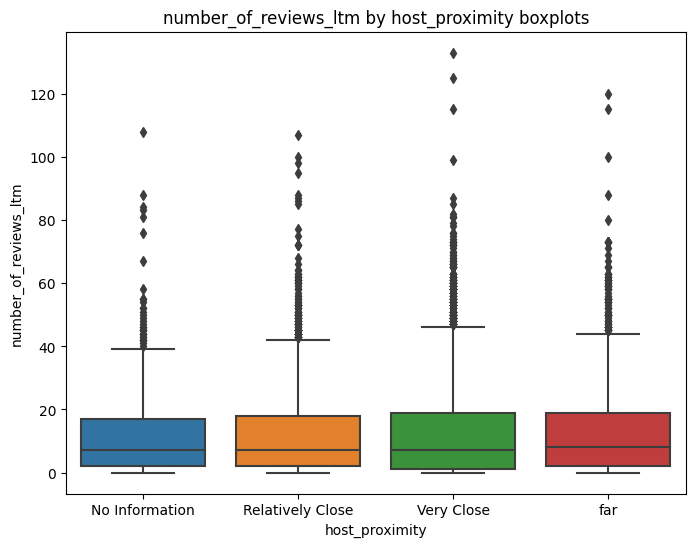

In [ ]:
# renderizar boxplots em pequenos múltiplos considerando outliers
# para host_proximity
render_box_plot_as_small_multiples(ds_treated, NUMBER_OF_REVIEWS_LTM,\
                                   HOST_PROXIMITY, True)

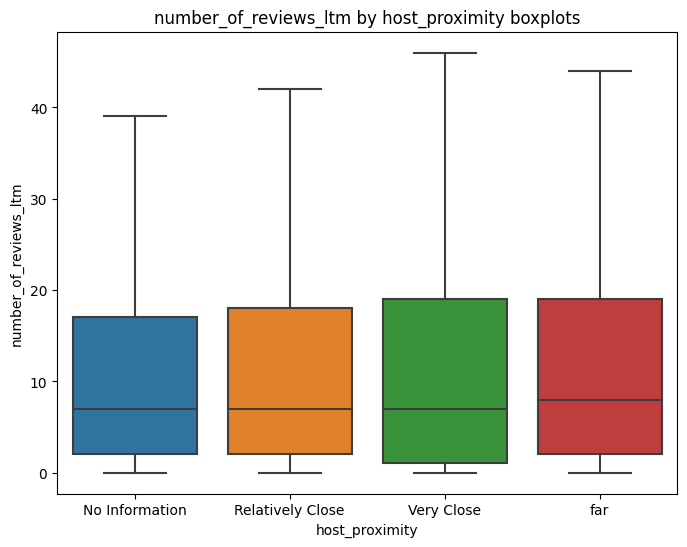

In [ ]:
# renderizar boxplots em pequenos múltiplos não considerando outliers
# para host_proximity
render_box_plot_as_small_multiples(ds_treated, NUMBER_OF_REVIEWS_LTM,\
                                   HOST_PROXIMITY, False)

Podemos notar claramente que esse dado não influi diretamente na quantidade de reviews.

Vejamos agora se o fato de existir uma descrição do bairro influencia na quantidade de reviews.

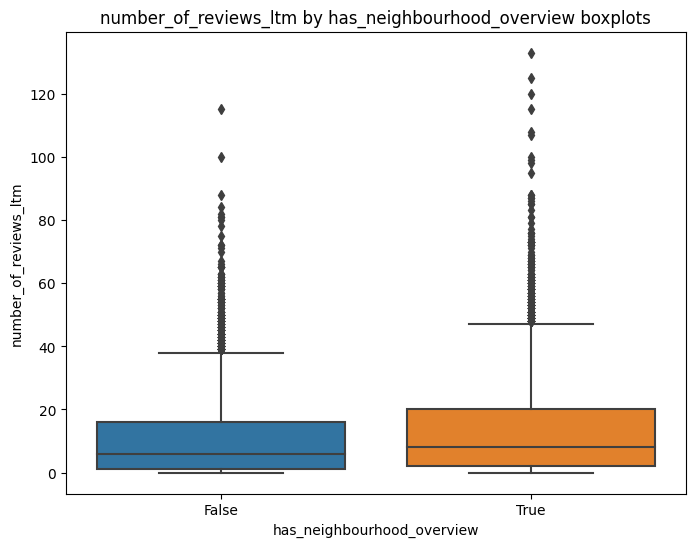

In [ ]:
# renderizar boxplots em pequenos múltiplos considerando outliers
# para has_neighbourhood_overview
render_box_plot_as_small_multiples(ds_treated, NUMBER_OF_REVIEWS_LTM,\
                                   HAS_NEIGHBOURHOOD_OVERVIEW, True)

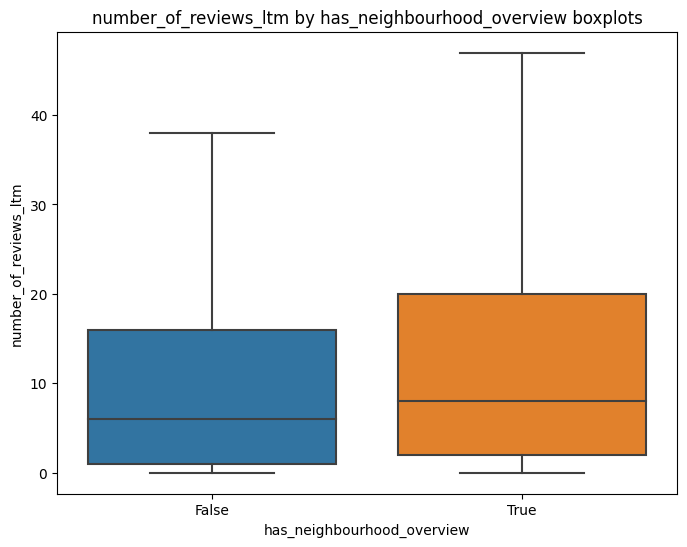

In [ ]:
# renderizar boxplots em pequenos múltiplos não considerando outliers
# para has_neighbourhood_overview
render_box_plot_as_small_multiples(ds_treated, NUMBER_OF_REVIEWS_LTM,\
                                   HAS_NEIGHBOURHOOD_OVERVIEW, False)

Podemos notar uma pequena diferença para melhor na quantidade de reviews daquelas acomodações com descrição do bairro. Notem que isso pode ser um impacto direto dessa característica ou pode estar vindo de outra característica da acomodação de maneira indireta.

Vejamos agora como a variável de comporta de acordo com o tempo de resposta do anfitrião.

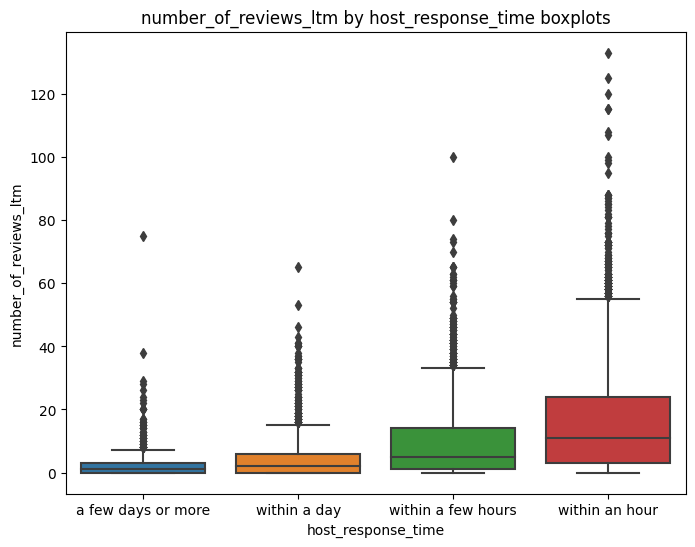

In [ ]:
# renderizar boxplots em pequenos múltiplos considerando outliers
# para host_response_time
render_box_plot_as_small_multiples(ds_treated, NUMBER_OF_REVIEWS_LTM,\
                                   HOST_RESPONSE_TIME, True)

Podemos ver claramente que anfitriões com melhores tempos de resposta, ou seja, tempos de resposta mais baixos, levam a uma quantidade de reviews maior das acomodações.

Vejamos se Superhosts geram números melhores para essa variável.

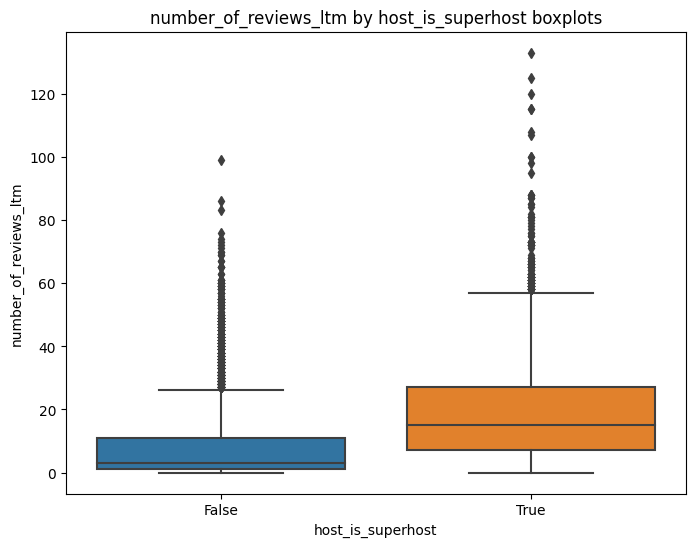

In [ ]:
# renderizar boxplots em pequenos múltiplos considerando outliers
# para host_is_superhost
render_box_plot_as_small_multiples(ds_treated, NUMBER_OF_REVIEWS_LTM,\
                                   HOST_IS_SUPERHOST, True)

O anfitrião ganha o badget de superhost justamente quando consegue ter métricas melhores em diversos fatores. Era natural que nessa comparação o desempenho destes fossem melhores.

Vejamos agora a relação com a variável de identidade verificada.

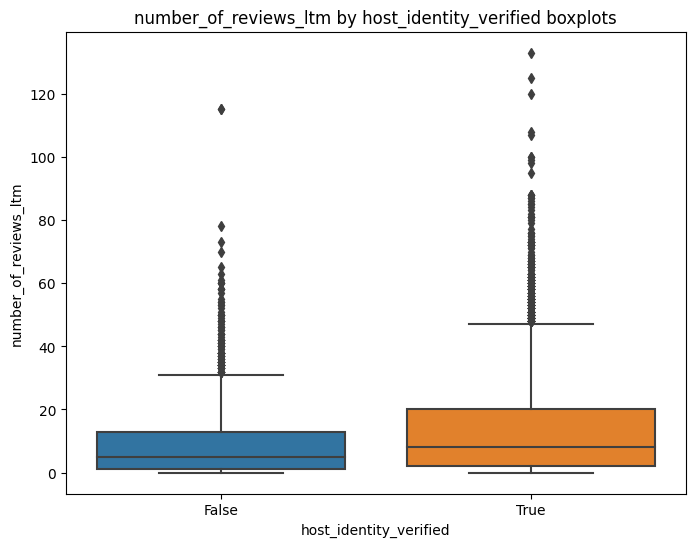

In [ ]:
# renderizar boxplots em pequenos múltiplos considerando outliers
# para host_identity_verified
render_box_plot_as_small_multiples(ds_treated, NUMBER_OF_REVIEWS_LTM,\
                                   HOST_IDENTITY_VERIFIED, True)

O resultado também indica métricas melhores para quem tem identidade verificada mas esse é outro caso onde o diferencial pode estar vindo para essa variável de maneira indireta.

Vejamos agora se acomodações que tem uma descrição do anfitrião tem desempenho melhor.

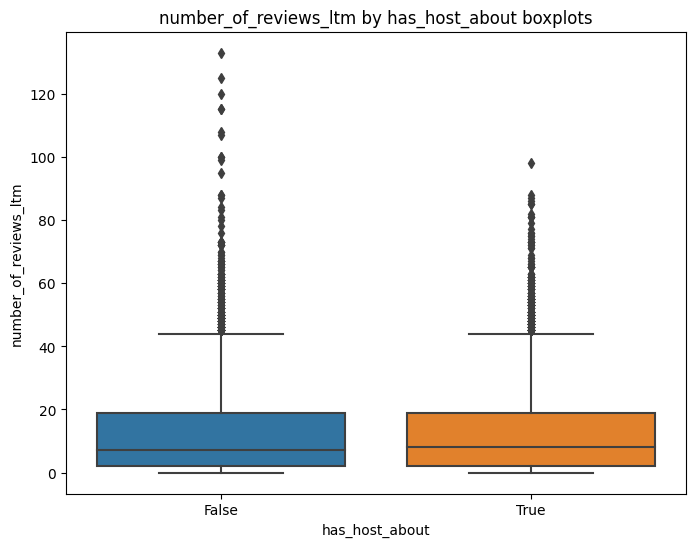

In [ ]:
# renderizar boxplots em pequenos múltiplos considerando outliers
# para has_host_about
render_box_plot_as_small_multiples(ds_treated, NUMBER_OF_REVIEWS_LTM,\
                                   HAS_HOST_ABOUT, True)

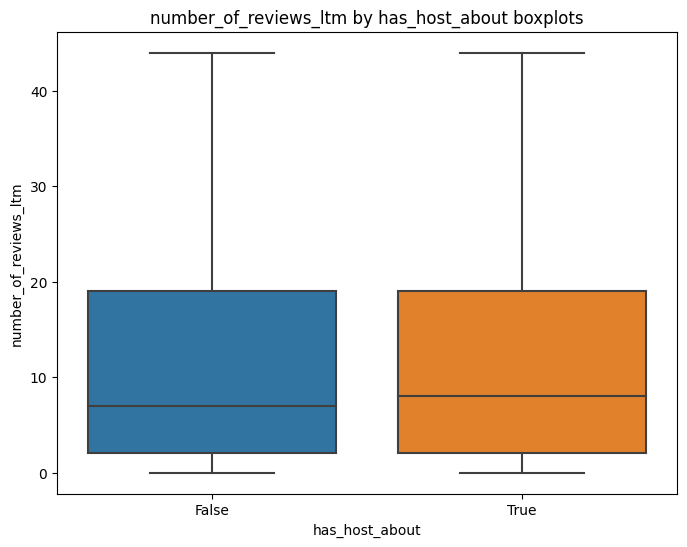

In [ ]:
# renderizar boxplots em pequenos múltiplos não considerando outliers
# para has_host_about
render_box_plot_as_small_multiples(ds_treated, NUMBER_OF_REVIEWS_LTM,\
                                   HAS_HOST_ABOUT, False)

Ao observar os dois gráficos podemos dizer que o comportamento da variável é quase igual para ambos os casos.

Deixei a categoria de bairro por último por ser uma variável categórica com muitas opções diferentes. Como eu quero exibir os nomes dos bairros para uma melhor leitura, já vou iniciar optando por uma impressão de múltiplos boxplots na horizontal.

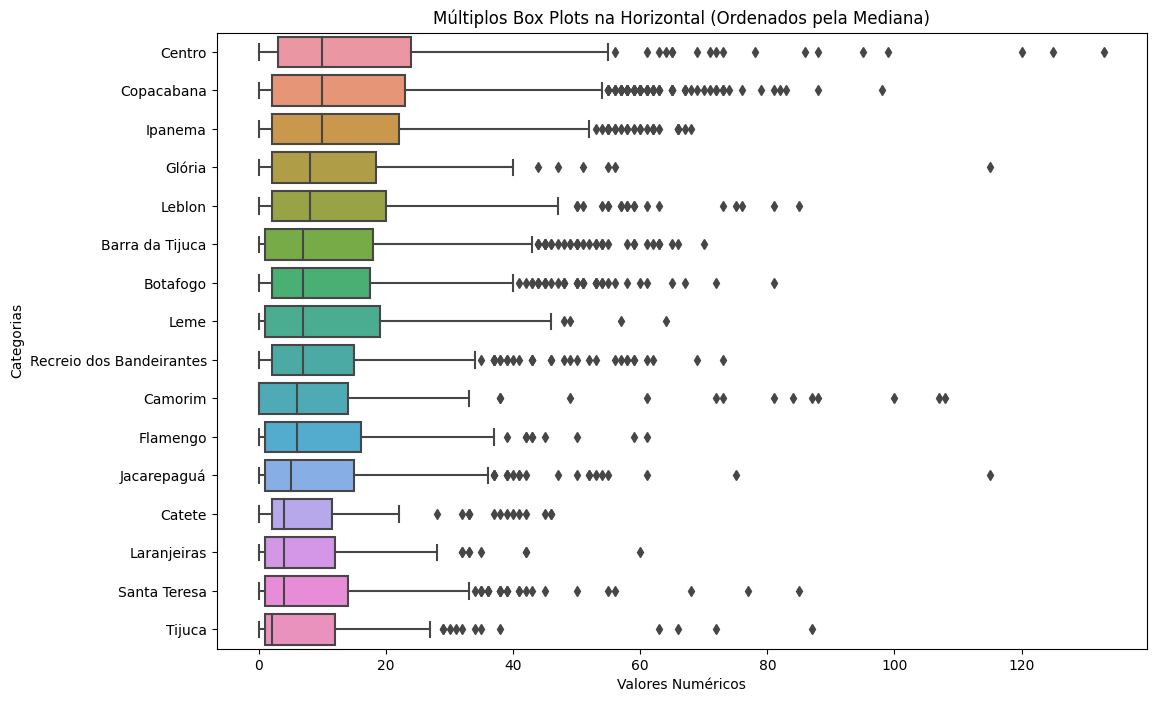

In [ ]:
# renderiza um gráfico de boxplots na horizontal
# Informa os bairros e ordena pelo valor de mediana da métrica de quantidade
# de reviews dos últimos 12 meses limitando aos bairros que tenham
# pelo menos 100 acomodações
render_multiple_horizontal_box_plots(ds_treated, NEIGHBOURHOOD_CLEANSED,\
                                     NUMBER_OF_REVIEWS_LTM, 100)

Notem que Centro, Copacabana e Ipanema são os bairros com valores de mediana maiores, para quantidade de avaliações nos últimos 12 meses. Na análise visual, parece que alguns bairros tem valores de mediana iguais ou bem similares. Vou conferir esses valores para os primeiros bairros da figura.

In [ ]:
#valores de medianas para bairros selecionados
ds_treated[ds_treated[NEIGHBOURHOOD_CLEANSED]\
           .isin(['Centro','Copacabana','Ipanema', 'Glória', 'Leblon'])\
          ].groupby(NEIGHBOURHOOD_CLEANSED)\
           [NUMBER_OF_REVIEWS_LTM].median().dropna()

neighbourhood_cleansed
Centro        10.0
Copacabana    10.0
Glória         8.0
Ipanema       10.0
Leblon         8.0
Name: number_of_reviews_ltm, dtype: float64

#### 6.2.3 Análises visuais de 3 variáveis

##### 6.2.3.1 Duas variáveis numéricas e uma categórica

Vou analisar a relação entre os valores numéricos de quantidade de quartos e quantidade de camas e usar a variável categórica room_type para diferenciar os pontos por cores. Lembrando que esses valores numéricos foram ajustados nas seções anteriores de modo a não termos valores nulos e também que podermos ter valores que são frações de 1, para quartos.

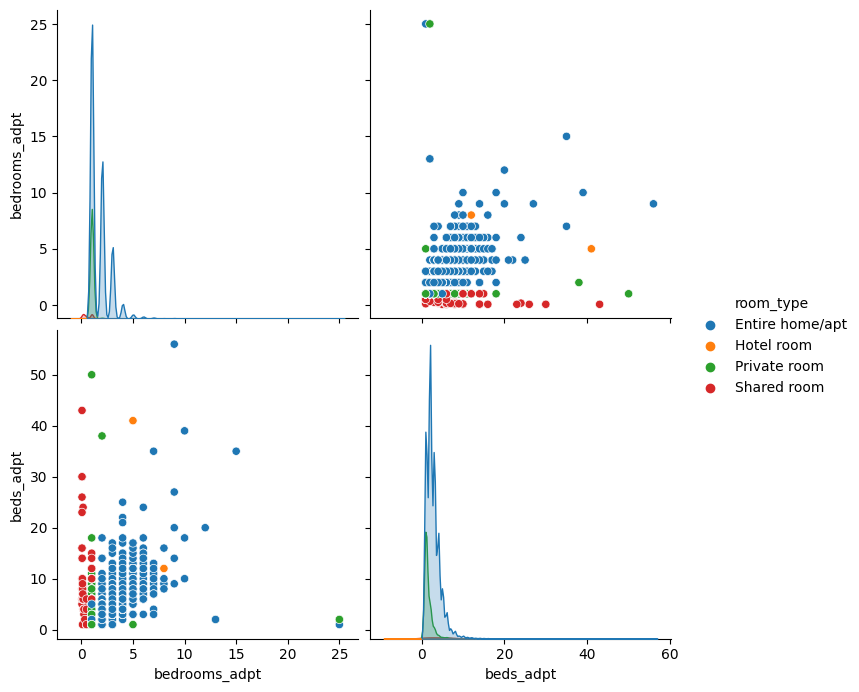

In [ ]:
# Scatter Plot com Seaborn
sns.pairplot(ds_treated[[BEDROOMS_ADPT, BEDS_ADPT, ROOM_TYPE]],\
             hue = ROOM_TYPE, height = 3.5);

Observações por categoria:

*   Shared room - valores numéricos para quantidade de quartos dessa categoria variam entre 0 e 1 (índice calculado) e podemos notar que isso faz com que todos os pontos dessa categoria fiquem bem próximos do eixo, se distanciando do centro conforme mais camas estejam presentes no quarto.
*   Private room - nesse caso não existe fracionamento e portanto, não existem valores numéricos menores do que 1, por que não é um cenário de compartilhamento de quarto. Mas notem que existem tanto pontos distribuídos ao longo do eixo de camas, o que indica cenários de poucos quartos e muitas camas, como pontos distribuídos ao longo do eixo de quartos, o que indica um cenário de vários quartos privados com, talvez, uma cama em cada quarto.
*   Hotel room - são poucas ocorrências de quartos de hotel corroborando dados que vimos em seções anteriores, com cenários específicos de combinações de quantidades de quartos e camas.
*   Entire home/apt - essa categoria é aquela com mais ocorrências e a que aparece com maior distribuição ao longo dos eixos. Como ela é uma categoria que atende diferentes tipos de dimensão de acomodações, é natural que ela suporte melhor as diferentes combinações de quantidade de quartos e camas e que isso fique bem representado na nossa figura.



Depois de observar esse gráfico, podemos supor que existe uma relação linear maior entre as variáveis de quantidade quartos e quantidade de camas na categoria de acomodação inteira, em comparação com as outras categorias. Vou conferir essa hipótese:


In [ ]:
# Calcula a correlação linear entre as duas colunas
correlacao_linear = ds_treated[BEDROOMS_ADPT].corr(ds_treated[BEDS_ADPT])
print(f"Correlação Linear geral: {correlacao_linear}\n")

# Calcula a correlação para cada categoria usando groupby
correlacoes_por_categoria = ds_treated.groupby(ROOM_TYPE)\
    .apply(lambda group: group[BEDROOMS_ADPT].corr(group[BEDS_ADPT]))
print(f"Correlação Linear por categoria: {correlacoes_por_categoria}")

Correlação Linear geral: 0.5514991882127428

Correlação Linear por categoria: room_type
Entire home/apt    0.677883
Hotel room         0.652159
Private room       0.034851
Shared room       -0.301351
dtype: float64


Notem que de fato a correlação é mais alta para as categorias 'Entire home/apt' e 'Hotel room' e menor para 'Private room'. Para a categoria 'Share room' a relação é até negativa.

##### 6.2.3.2 Duas variáveis categóricas e uma numérica

Vou agora usar gráficos do tipo **heatmap** para analisar valores de algumas **variáveis numéricas** segundo o cruzamento de **duas variáveis categóricas**: **bairro** e **tipo de acomodação**.

Para melhor visualização dos heatmaps, estudei o tema de paleta de cores e vi que existem modelos diferentes que devem ser usados em situações específicas: divergente, qualitativa e sequencial. Esse site é uma boa referência: https://www.codecademy.com/article/seaborn-design-ii

Coloquei uma imagem com uma coleção de paletas de referência na seção de anexos, no final do notebook.

Vou usar esses conceitos nos gráficos abaixo.

Nessa primeira análise, eu gostaria de verificar se algum bairro em específico chama a atenção por ter uma grande quantidade de um tipo específico de acomodação.

Usei o padrão de cores RdBu_r, de cores contrastantes, para destacar valores altos e baixos. Apesar da contagem de ocorrências ser naturalmente uma métrica sequencial, eu adotei uma palete de tipo divergente, e inverti a paleta (o _r no nome da paleta faz a inversão). Fiz isso por que a maioria das células do heatmap tem valores baixos de contagem o que padronizou a figura com a cor azul mais escuro, do extremo do espectro. Isso permite uma visualização mais clara das ocorrências fora desse padrão baixo de contagem.

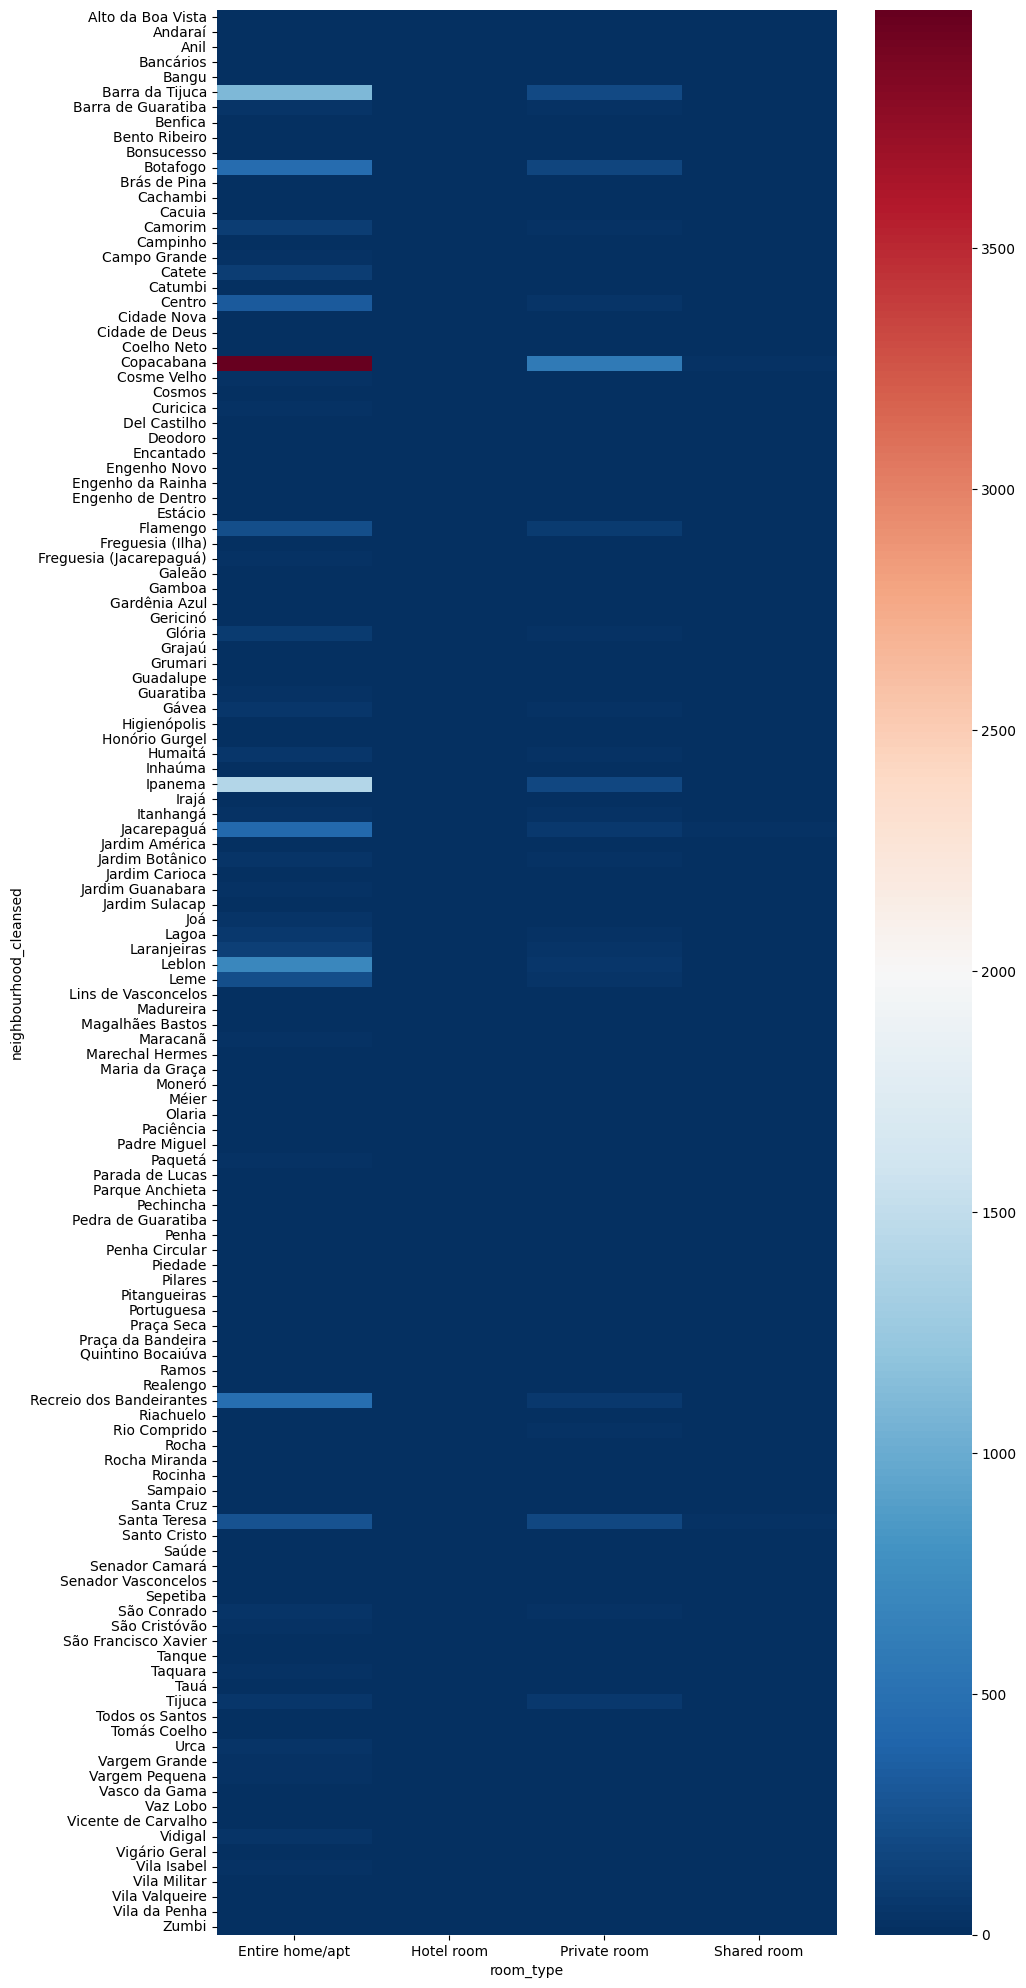

In [ ]:
# cruzando as duas variáveis categóricas e fazendo a contagem de ocorrências
# com o método crosstab
tabela_contingencia =\
    pd.crosstab(ds_treated[NEIGHBOURHOOD_CLEANSED], ds_treated[ROOM_TYPE])

# Ajustando o tamanho da figura
plt.figure(figsize=(10, 25))

# Criando o heatmap com seaborn sem imprimir valores, para focar
# apenas no visual
sns.heatmap(tabela_contingencia, annot=False, cmap="RdBu_r", fmt='d')

# Exibindo o gráfico
plt.show()

Notem que esse gráfico ajuda a termos uma percepção visual do volume de acomodações segundo as duas categorias escolhidas. E na análise visual, parece que o bairro da Tijuca tem mais acomodações do tipo 'Private room' do que do tipo 'Entire home/apt'. Vou conferir:

In [ ]:
tabela_contingencia[tabela_contingencia.index == 'Tijuca']

room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
Tijuca                               61           0            74           15

De fato, a Tijuca tem mais acomodações do tipo 'Private room' do que do tipo 'Entire home/apt', fugindo do padrão dos outros bairros da cidade.

Vou agora montar o heatmap considerando a variável numérica **preço**. Vejamos como ela se comporta segundo esses critérios. Vou usar a paleta de cores Purples, do tipo sequencial. Dessa vez vou imprimir os valores.

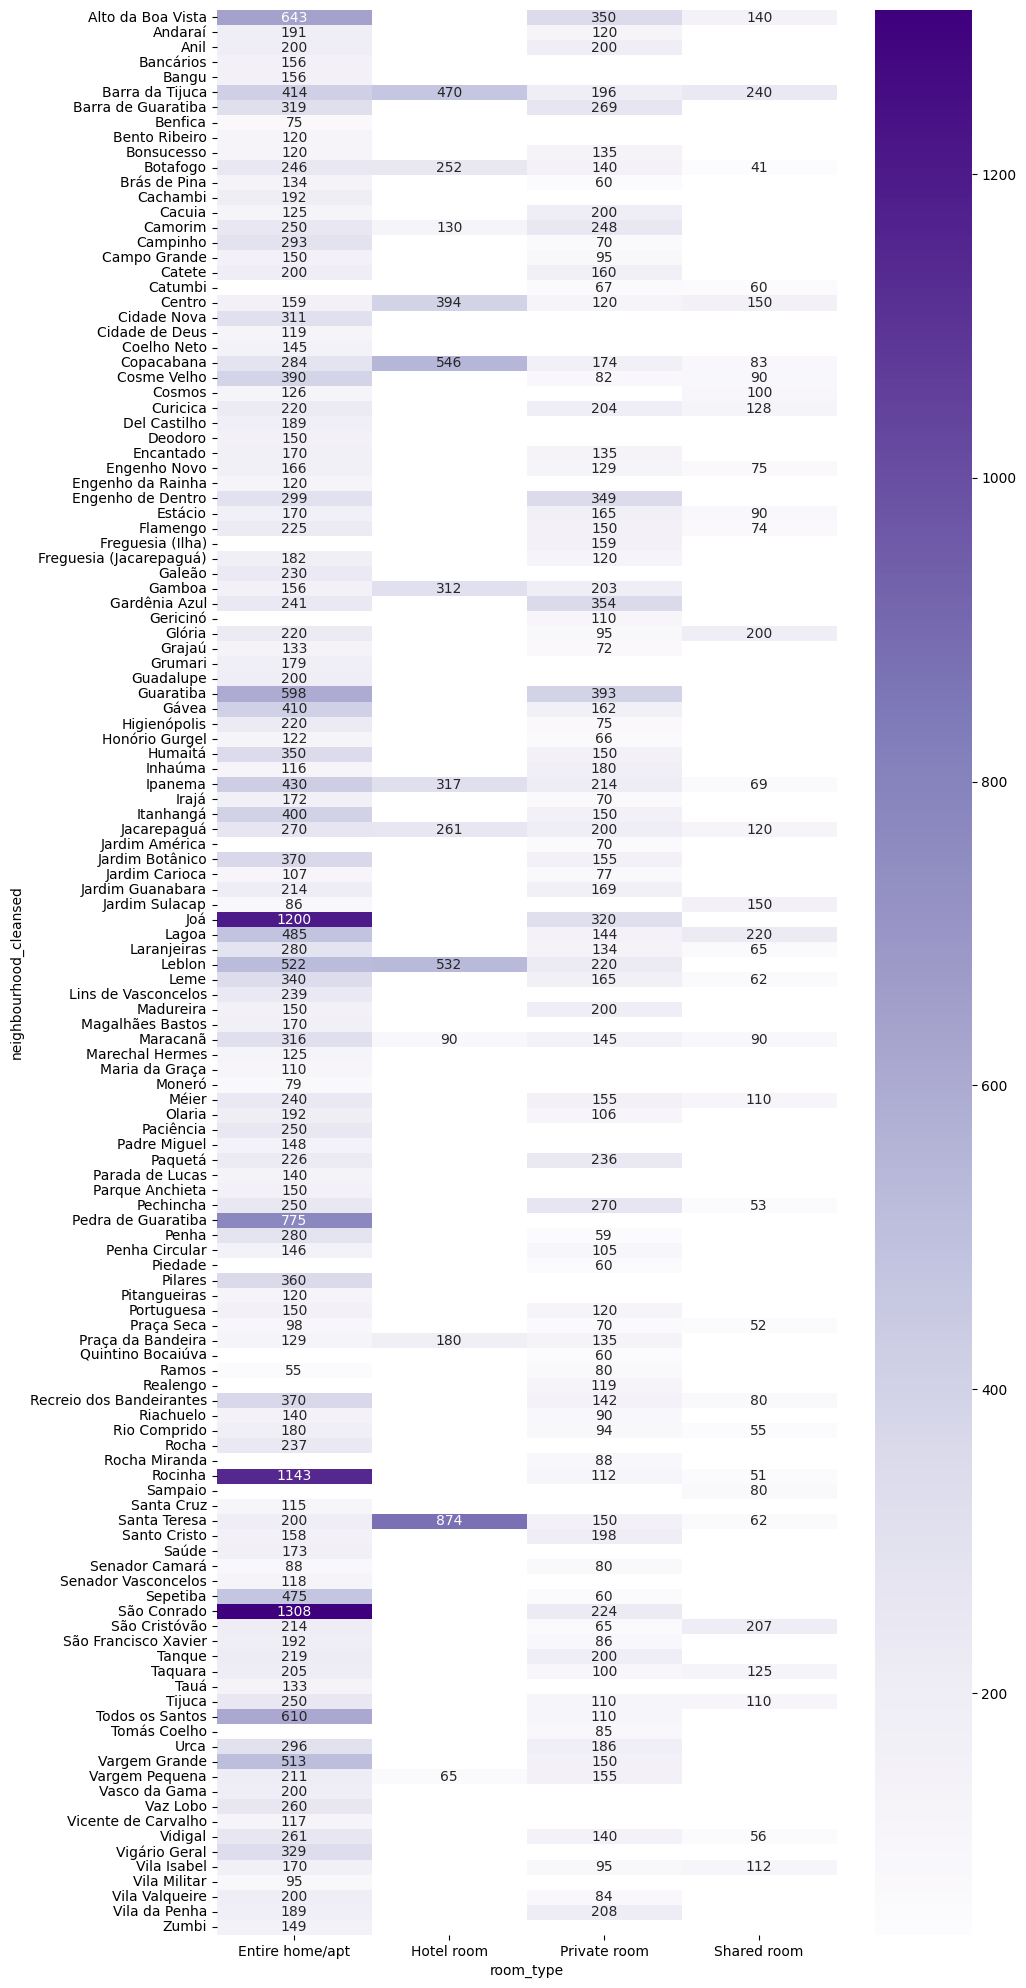

In [ ]:
# Criando uma tabela de pivot com a mediana dos preços
tabela_mediana_preco =\
    ds_treated.pivot_table(values=PRICE, index=NEIGHBOURHOOD_CLEANSED,\
                           columns=ROOM_TYPE, aggfunc='median')

# Ajustando o tamanho da figura
plt.figure(figsize=(10, 25))

# Criando o heatmap com seaborn
# usando paleta Purples pelo fato de preço ser uma variável sequencial
sns.heatmap(tabela_mediana_preco, annot=True, cmap="Purples", fmt='.0f')

# Exibindo o gráfico
plt.show()

Algumas observações interessantes a partir desse heatmap:


*   a primeira delas e talvez a mais importante é que a baixa quantidade de acomodações disponíveis em alguns bairros e de tipos específicos, faz com que apareçam valores inesperados em alguns casos. Isso precisa ser levado em conta para uma correta interpretação dos valores;
*   chama a atenção a ocorrência de valores maiores de preço em alguns bairros para 'Hotel room' do que para 'Entire home/apt';
*   chamam a atenção os valores mais altos de mediana para acomodação do tipo 'Entire room/apt' dos bairros São Conrado, Joá e Rocinha. Principalmente esse último bairro por se tratar de uma comunidade carente.

Farei uma análise em específico para esse caso:


In [ ]:
# ocorrências para o bairro Rocinha
ds_treated[ds_treated[NEIGHBOURHOOD_CLEANSED] == 'Rocinha']

listing_url        room_type  accommodates  \
227      https://www.airbnb.com/rooms/676781  Entire home/apt             7   
9345   https://www.airbnb.com/rooms/30205071     Private room             5   
9360   https://www.airbnb.com/rooms/30243763     Private room             5   
9609   https://www.airbnb.com/rooms/30763458  Entire home/apt             2   
12311  https://www.airbnb.com/rooms/41247187      Shared room             1   
14548  https://www.airbnb.com/rooms/47817186      Shared room             1   
14596  https://www.airbnb.com/rooms/48027290      Shared room             1   
14619  https://www.airbnb.com/rooms/48058227  Entire home/apt            12   

       bedrooms_adpt  beds_adpt  baths_index baths_category  amenities_count  \
227              6.0        7.0     0.428571      dedicated               24   
9345             2.0        3.0     0.416667         shared               21   
9360             2.0        3.0     0.416667         shared               24   
9609             1.0        1.0     0.500000      dedicated               26   
12311            1.0        6.0     0.500000         shared               12   
14548            1.0        6.0     0.500000         shared               13   
14596            1.0        6.0     0.500000         shared               17   
14619            4.0       10.0     0.291667      dedicated               19   

        price  minimum_nights  maximum_nights  review_scores_rating  \
227    1143.0               4              60                  5.00   
9345    100.0               3            1125                  4.89   
9360    125.0               3            1125                  4.73   
9609    139.0              29            1125                  5.00   
12311    51.0               1            1125                  5.00   
14548    80.0               1               2                  5.00   
14596    51.0               1            1125                  5.00   
14619  4250.0               4            1125                  5.00   

       number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
227                    2                      0                       0   
9345                  18                      7                       1   
9360                  11                      3                       0   
9609                  16                      3                       0   
12311                  2                      0                       0   
14548                  1                      0                       0   
14596                  2                      1                       0   
14619                  4                      2                       0   

      last_review  reviews_per_month  months_since_registered  \
227    2020-02-29               0.04                       50   
9345   2023-09-10               0.31                       58   
9360   2023-08-15               0.19                       58   
9609   2022-12-27               0.30                       53   
12311  2022-09-10               0.16                       12   
14548  2022-09-11               0.08                       12   
14596  2023-02-26               0.16                       12   
14619  2023-02-22               0.15                       27   

       instant_bookable    host_proximity neighbourhood_cleansed  \
227                True        Very Close                Rocinha   
9345              False  Relatively Close                Rocinha   
9360              False  Relatively Close                Rocinha   
9609              False               far                Rocinha   
12311             False        Very Close                Rocinha   
14548             False        Very Close                Rocinha   
14596             False        Very Close                Rocinha   
14619             False  Relatively Close                Rocinha   

       has_neighbourhood_overview host_since  host_total_listings_count  \
227       

Existem 3 ocorrências no bairro da Rocinha do tipo 'Entire room/apt'. Ao acessar a url dessas 3, apenas uma delas se declara como estando na Rocinha. As outras duas estão localizadas do lado da Gávea, no alto da montanha. Como a informação de bairros foi calculada a partir dos dados de latitude e longitude, todas os valores de bairro, incluindo Rocinha, vieram desse processamento. É importante destacarmos esse acontecimento por que muito provavelmente pode estar acontecendo para outros bairros também, para acomodações localizadas na fronteira entre bairros distintos. Esse caso ficou mais evidente por que existem poucas ocorrências de acomodações na Rocinha e por que há um grande nível de desigualdade sócio-econômica entre os dois bairros fronteiriços desse caso, característica marcante da cidade do Rio de Janeiro.

Agora farei uma análise das pontuações obtidas pelas acomodações (review score), usando o mesmo modelo de heatmap. Dessa vez, optei por montar uma paleta de cores própria, para seguir uma organização visual e de métricas usada comumente em avaliações do tipo [CSAT](https://en.wikipedia.org/wiki/Customer_satisfaction), de satisfação do consumidor.

A pontuação pode variar entre 0 e 5 então organizei esse espectro de valores em intervalos de 0.25 ficando com 20 intervalos.

Para os 10 primeiros intervalos, que vão de 0 a 2.5, usei uma escala de cores em vermelho. Para os intervalos entre 2.5 e 3.5 eu usei uma escala de amarelos. Para os intervalos entre 3.5 e 4.5 eu usei uma escala de verde claro e finalmente, para o intervalo entre 4.5 e 5.0, uma escala de verde escuro.

Essa abordagem valoriza visualmente as pontuações mais altas, no extremo superior do espectro de valores numéricos.



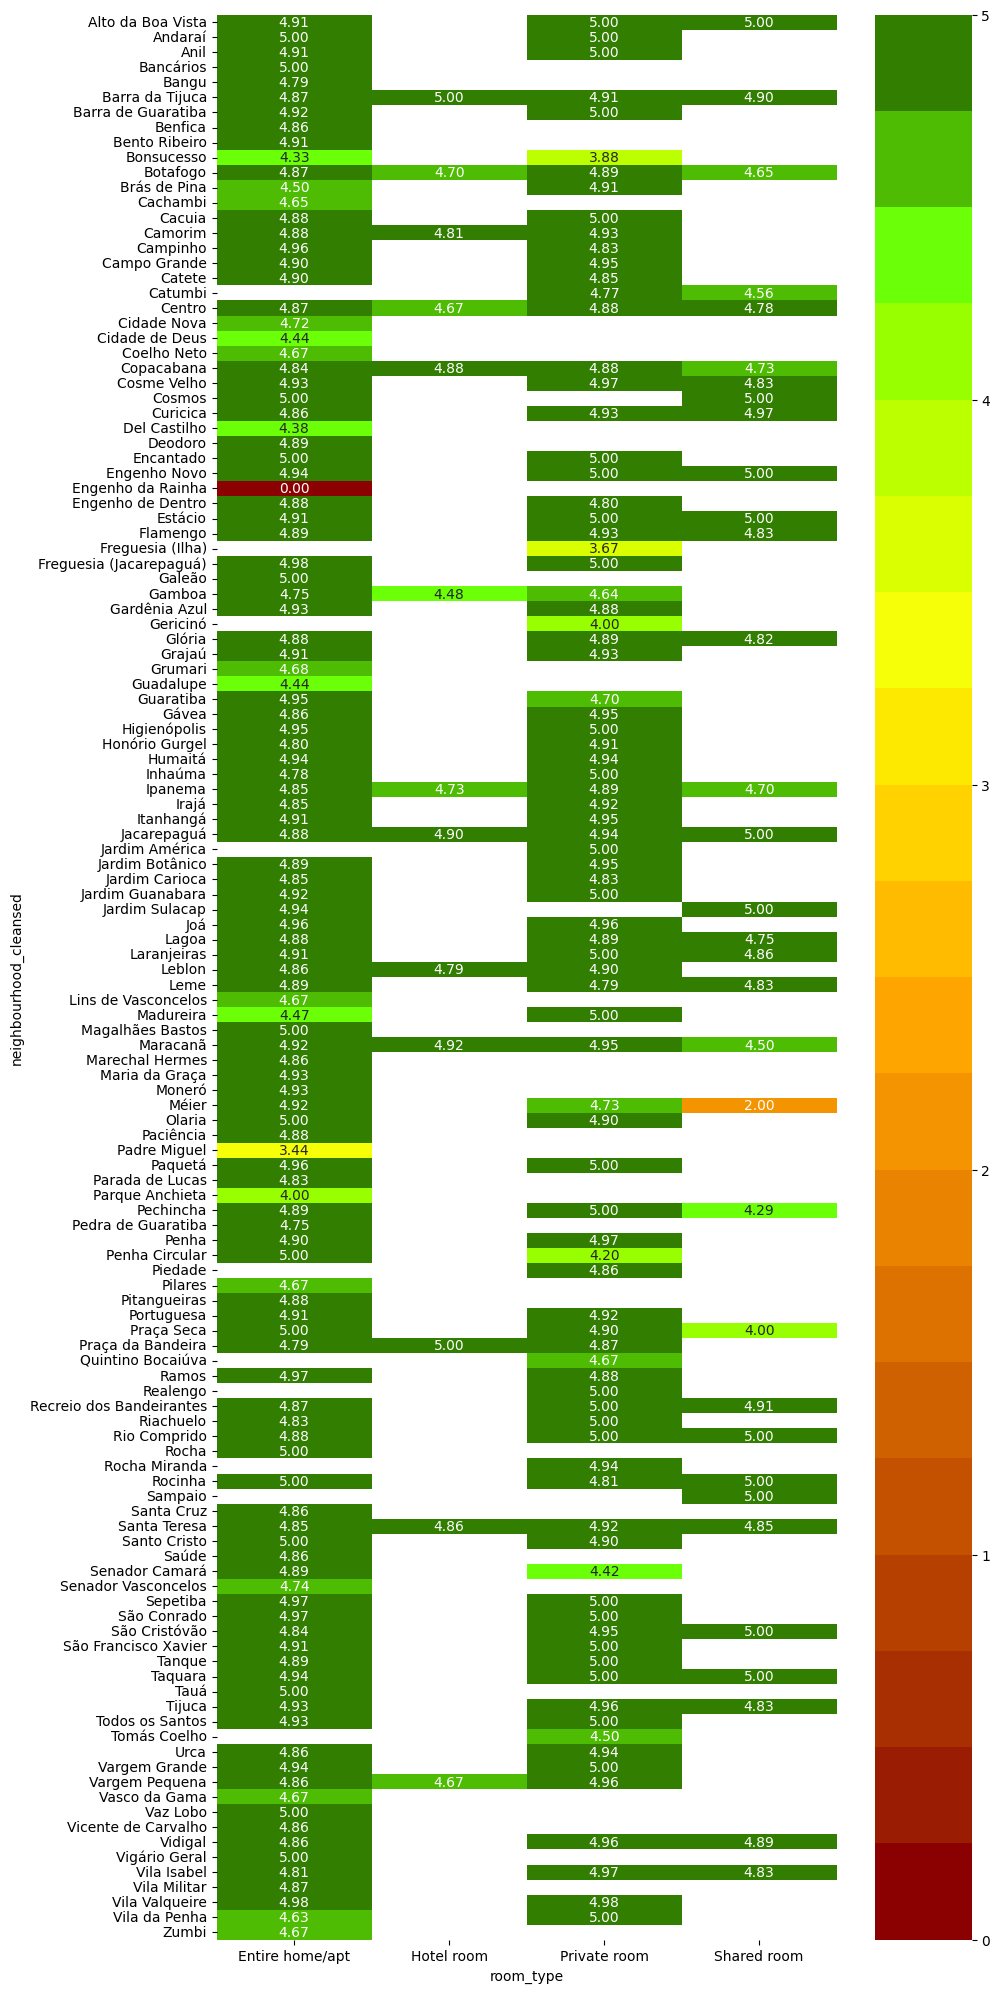

In [ ]:
# Criando uma tabela de pivot com a mediana dos preços
tabela_mediana =\
    ds_treated.pivot_table(values=REVIEW_SCORES_RATING,\
                           index=NEIGHBOURHOOD_CLEANSED, columns=ROOM_TYPE,\
                           aggfunc='median')

# Ajustando o tamanho da figura
plt.figure(figsize=(10, 25))

paleta_cores = get_color_pallete_as_csat()

# Criando o heatmap com seaborn

#paleta de cores divergente
#sns.heatmap(tabela_mediana, annot=True, cmap="RdYlGn", fmt='.2f')
# paleta de cores sequencial
#sns.heatmap(tabela_mediana, annot=True, cmap="YlGn", fmt='.2f')
# paleta de cores csat
sns.heatmap(tabela_mediana, annot=True, cmap=paleta_cores, fmt='.2f')

# Exibindo o gráfico
plt.show()

Algumas observações referentes ao heatmap de pontuações:

*   De maneira geral, as pontuações são do patamar mais alto. Podemos ter essa percepção pelo fato das cores verde escuro serem as predominantes.
*   O padrão de cores também ajuda a diferenciar os bairros onde os diferentes tipo de acomodações estão no mesmo patamar de notas daqueles bairros onde há diferença nesses patamares.
*   O baixo volume de acomodações de um determinado tipo em alguns bairros também pode influenciar para o aparecimento de pontuações muito baixas ou muito altas no diagrama, chamando a atenção.



Para finalizar as análises visuais, vou montar um heatmap com a quantidade de reviews dos últimos 12 meses (minha variável alvo), organizando mais uma vez por bairro e tipo de acomodação. Usarei uma paleta de cores do tipo sequencial, de 3 cores.

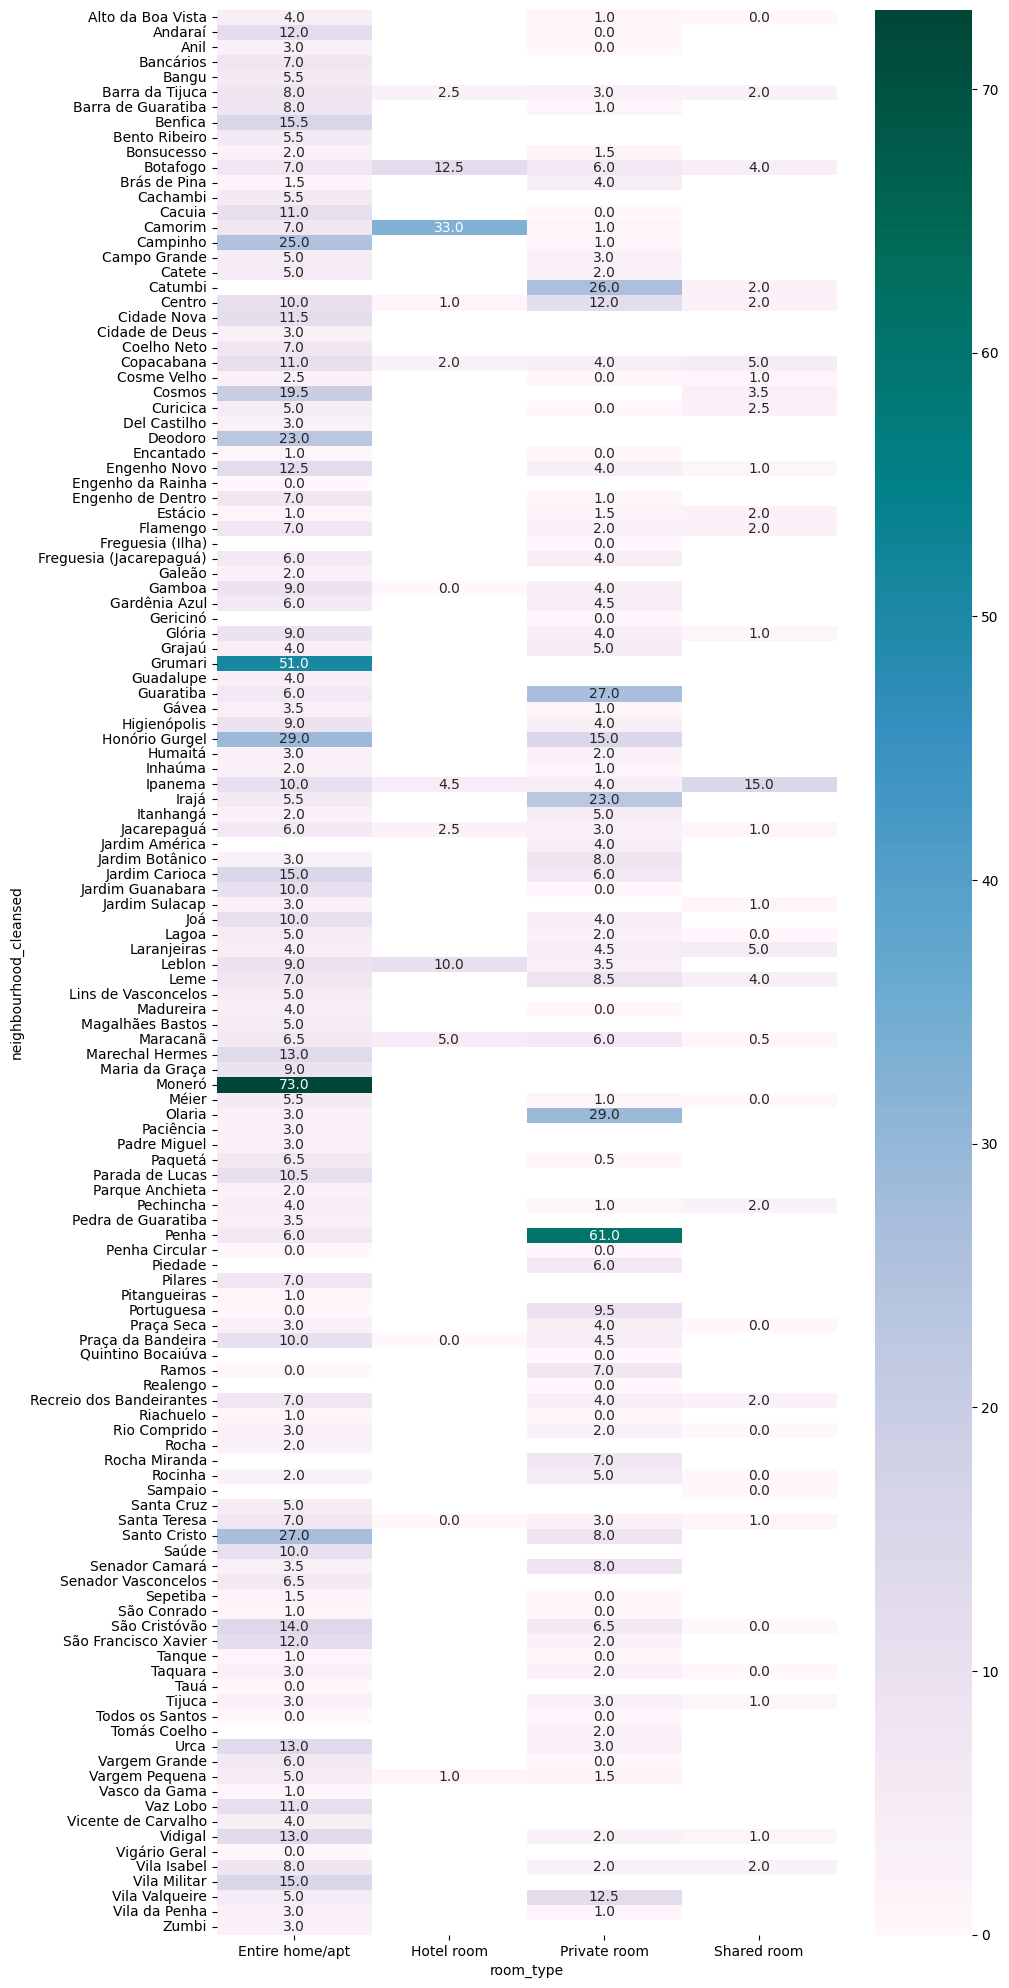

In [ ]:
# Criando uma tabela de pivot com a mediana da quantidade de reviews
tabela_mediana =\
    ds_treated.pivot_table(values=NUMBER_OF_REVIEWS_LTM,\
                           index=NEIGHBOURHOOD_CLEANSED, columns=ROOM_TYPE,\
                           aggfunc='median')

# Ajustando o tamanho da figura
plt.figure(figsize=(10, 25))

# Criando o heatmap com seaborn usando paleta de cores do tipo sequencial
# já que quantidade de reviews tem essa característica
sns.heatmap(tabela_mediana, annot=True, cmap="PuBuGn", fmt='.1f')

# Exibindo o gráfico
plt.show()

Observam como alguns bairros até então fora do radar passam a aparecer nessa visualização. Provavelmente existe nesses bairros, pro tipo de acomodação que se destacou, alguma ocorrência com alta taxa de reviews, mas que só ficou evidente nesse tipo de visualização.

Na seção anterior, de análises unidimensionais, vimos que a mediana para essa variável tem valor 7. Vejamos então os dois cenários que apareceram com mais destaque: 'Entire home/apt' no bairro de Moneró e 'Private Room' no bairro da Penha.

In [ ]:
# buscando ocorrências em Moneró
ds_treated[(ds_treated[NEIGHBOURHOOD_CLEANSED] == 'Moneró') &\
           (ds_treated[ROOM_TYPE] == ROOMTYPE_ENTIRE)]

listing_url        room_type  accommodates  \
16414  https://www.airbnb.com/rooms/53227560  Entire home/apt             2   

       bedrooms_adpt  beds_adpt  baths_index baths_category  amenities_count  \
16414            1.0        1.0          0.5      dedicated               25   

       price  minimum_nights  maximum_nights  review_scores_rating  \
16414   79.0               1             365                  4.93   

       number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
16414                121                     73                       4   

      last_review  reviews_per_month  months_since_registered  \
16414  2023-09-17               5.48                       22   

       instant_bookable host_proximity neighbourhood_cleansed  \
16414             False            far                 Moneró   

       has_neighbourhood_overview host_since  host_total_listings_count  \
16414                        True 2021-11-08                        1.0   

       host_response_time  host_response_rate  host_acceptance_rate  \
16414  within a few hours                 100                    75   

       host_is_superhost  host_identity_verified  has_host_about  
16414               True                    True           False

De fato existe apenas uma ocorrência para esse filtro e ela tem um valor bem alto para a variável, quando comparado com a mediana de todo o dataset. Isso faz com que a mediana calculada para essa célula seja o próprio valor estabelecido para essa ocorrência e ela fique em destaque.

Ao acessar a url da acomodação pude verificar que trata-se de um local bem próximo ao aeroporto internacional do Galeão então possivelmente é muito utilizada por pessoas que precisam fazer um pernoite para conexões de vôos.

In [ ]:
# buscando ocorrências na Penha
ds_treated[(ds_treated[NEIGHBOURHOOD_CLEANSED] == 'Penha') &\
           (ds_treated[ROOM_TYPE] == ROOMTYPE_PRIVATE)]

listing_url     room_type  accommodates  \
2552  https://www.airbnb.com/rooms/5125338  Private room             2   

      bedrooms_adpt  beds_adpt  baths_index baths_category  amenities_count  \
2552            1.0        2.0     0.333333         shared               48   

      price  minimum_nights  maximum_nights  review_scores_rating  \
2552   59.0               1               7                  4.97   

      number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
2552                189                     61                       8   

     last_review  reviews_per_month  months_since_registered  \
2552  2023-09-18               2.12                       89   

      instant_bookable host_proximity neighbourhood_cleansed  \
2552             False     Very Close                  Penha   

      has_neighbourhood_overview host_since  host_total_listings_count  \
2552                        True 2015-01-21                        1.0   

     host_response_time  host_response_rate  host_acceptance_rate  \
2552     within an hour                 100                    97   

      host_is_superhost  host_identity_verified  has_host_about  
2552               True                    True            True

O mesmo cenário acontece para essa acomodação do bairro da Penha. Apenas uma ocorrência e de valor bem alto quando comparado com a mediana de todo o dataset.

Ao acessar a url, pude verificar que trata-se também de uma acomodação que divulga proximidade com o aeroporto do Galeão ("Room for two people - close to the airport") e provavelmente está sendo usada pelo mesmo tipo de hóspede, que busca pernoite.

Farei agora apenas uma última análise nas 10 acomodações com maiores valores da variável que indica quantidade de reviews no último ano.

In [ ]:
# buscando principais 10 acomodações de acordo com
# quantidade de reviews em 12 meses
ds_treated.nlargest(10, NUMBER_OF_REVIEWS_LTM)\
    [[LISTING_URL, ROOM_TYPE, ACCOMMODATES, PRICE,\
      NUMBER_OF_REVIEWS_LTM, REVIEWS_PER_MONTH, NEIGHBOURHOOD_CLEANSED]]

listing_url        room_type  \
13048            https://www.airbnb.com/rooms/42558670  Entire home/apt   
12867            https://www.airbnb.com/rooms/42310361  Entire home/apt   
20228  https://www.airbnb.com/rooms/675934310626675180  Entire home/apt   
12253            https://www.airbnb.com/rooms/41125249     Private room   
20848  https://www.airbnb.com/rooms/694357916220902953  Entire home/apt   
15046            https://www.airbnb.com/rooms/49830627  Entire home/apt   
14056            https://www.airbnb.com/rooms/46790887  Entire home/apt   
18215  https://www.airbnb.com/rooms/567377133468945647  Entire home/apt   
19203  https://www.airbnb.com/rooms/625222584939466973  Entire home/apt   
15798            https://www.airbnb.com/rooms/52370482  Entire home/apt   

       accommodates  price  number_of_reviews_ltm  reviews_per_month  \
13048             4  131.0                    133               7.49   
12867             4  140.0                    125               7.32   
20228             4  229.0                    120               9.53   
12253             2  110.0                    115               5.84   
20848             2  145.0                    115               9.42   
15046             2  214.0                    108               8.65   
14056             2  230.0                    107               7.47   
18215             2  436.0                    100               8.91   
19203             2  227.0                    100               8.47   
15798             4  115.0                     99               7.71   

      neighbourhood_cleansed  
13048                 Centro  
12867                 Centro  
20228                 Centro  
12253                 Glória  
20848            Jacarepaguá  
15046                Camorim  
14056                Camorim  
18215     Barra de Guaratiba  
19203                Camorim  
15798                 Centro

Notem que os valores de quantidade de reviews vão de 99 até o máximo de 133. Acessei as urls dessas 10 acomodações e percebi dois clusters claros, excetuando a acomodação de Barra da Guaratiba.

Um cluster com as acomodações dos bairros do Centro e da Glória, cuja justificativa para o alto número de reviews é a proximidade com o aeroporto Santos Dumont (além da grande oferta de meios de tranporte do centro da cidade).

Outro cluster com as acomodações de Jacarepaguá e Camorim, cuja justificativa é a proximidade com o centro de convenções Riocentro, local onde ocorre com bastante frequência muitas feiras e grandes eventos. Além disso, a região também recebe o RockInRio, shows na Jeunesse Arena e outros eventos no Parque Olímpico.

A ocorrência isolada de Barra de Guaratiba se destaca e entrou nessa lista, a meu ver, por ter um diferencial de contato com a natureza, pôr do sol e isolamento. Chama a atenção também por ser a mais cara entre as 10. É bem provável que moradores da própria cidade do Rio estejam buscando essa experiência.




## 7. Tratamento final do dataset

Nessa seção eu vou fazer as alterações finais de dados no dataset de modo a otimizá-lo para uso em algoritmos de machine learning.

Algumas ações serão feitas antes do holdout e outras depois, para evitar data leakage.

A partir desse ponto não pretendo mais identificar as acomodações para qualquer análise específica no conteúdo da url então vou remover a variável listing_url.

Criarei uma nova cópia do dataset para operar com ele nessa seção.

In [ ]:
# criação de um novo dataset para executar as operações
# a partir da seção de holdout
# recuperando os nomes das colunas
col_treated = list(ds_treated.columns)

# o novo dataset irá conter todas as colunas do dataset original
ds_final = ds_treated[col_treated[:]]

# removendo a variável listing_url pois não será mais utilizada
ds_final.drop([LISTING_URL], axis=1, inplace= True)

Como a variável alvo tem valor numérico, técnicas de regressão serão utilizadas e por isso, o dataset deve ser adaptado para melhor se adequar a esse cenário de uso.

Vou adotar as seguintes ações de acordo com os tipos de dados:

*   manter dados do tipo booleano sem alteração;
*   transformar os dados que representam datas para melhor se adequar ao que eles representam para o problema;
*   usar OrdinalEncoder nas variáveis categóricas que tem ordenação;
*   usar dummy encoding nas variáveis categóricas sem ordenação;
*   padronizar variáveis numéricas cujas distribuições sejam normais;
*   normalizar variáveis numéricas cujas distribuições não sejam normais;

Inicio trazendo a informação sobre os tipos de dados de cada variável:


In [ ]:
# tipos de dados presentes no dataset
ds_final.dtypes

room_type                           category
accommodates                           int64
bedrooms_adpt                        float64
beds_adpt                            float64
baths_index                          float64
baths_category                      category
amenities_count                        int64
price                                float64
minimum_nights                         int64
maximum_nights                         int64
review_scores_rating                 float64
number_of_reviews                      int64
number_of_reviews_ltm                  int64
number_of_reviews_l30d                 int64
last_review                   datetime64[ns]
reviews_per_month                    float64
months_since_registered                int64
instant_bookable                        bool
host_proximity                      category
neighbourhood_cleansed              category
has_neighbourhood_overview              bool
host_since                    datetime64[ns]
host_total

### 7.1 Manter dados booleanos

As variáveis isntant_bookable, has_neighbourhood_overview, host_is_superhost, host_identity_verified e has_host_about são booleanas e ficam de fora das ações de transformação pois os algoritmos de machine learning lidam bem com esse tipo de dado.

### 7.2 Transformar datas

As variáveis last_review e host_since são aquelas cujo tipo de dado é datetime. Mantive essas variáveis no dataset nas seções anteriores dadas as seguintes hipóteses:

*   last_review pode influenciar positivamente na taxa de ocupação na medida em que avaliações mais recentes tem mais credibilidade do que avaliações mais antigas. Essa hipótese portanto considera que quanto mais antiga uma avaliação, menos relevante ela fica para a taxa de ocupação.
*   host_since pode influenciar positivamente na taxa de ocupação na medida em que o anfitrião ganha experiência com o tempo de administração da acomodação. Essa hipótese considera portanto que anfitriões registrados a mais tempo tem um desempenho melhor e consequentemente a taxa de ocupação é melhor.

Ambas as hipóteses consideram a distância de tempo entre o momento atual e a data presente no dataset. No caso da primeira variável, quanto maior esse tempo, pior seria para o resultado. No caso da segunda variável, quanto maior o tempo calculado, melhor para o resultado.

Como esse dataset foi capturado no dia 22 de setembro de 2023 (ver seção de captura de dados), eu vou usar como data de referência o dia seguinte, 23 de setembro.

Desse modo, farei uma transformação nessas variáveis passando a adotar a quantidade de dias entre o valor da variável na instância e essa data de referência.


In [ ]:
# data de referência
data_referencia = pd.to_datetime('2023-09-23', format='%Y-%m-%d')

#calculo a diferença em quantidade de dias para
# last_review e substituo o valor original
ds_final[LAST_REVIEW] = (data_referencia - ds_final[LAST_REVIEW]).dt.days

#calculo a diferença em quantidade de dias para
# host_since e substituo o valor original
ds_final[HOST_SINCE] = (data_referencia - ds_final[HOST_SINCE]).dt.days

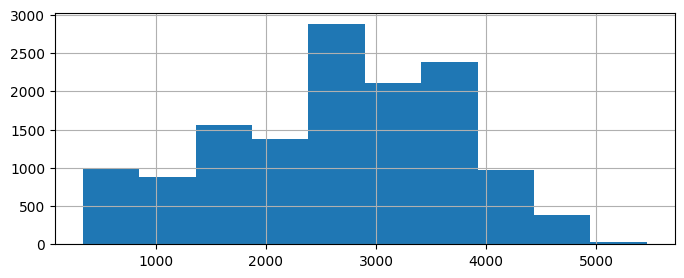

In [ ]:
# Histogramas do dado host_since
ds_final[HOST_SINCE].hist(figsize = (8,3))
plt.show()

Notem que a distribuição da variável host_since segue aparentando uma distribuição normal, mesmo depois da transformação, como era esperado.

### 7.3 Aplicar Ordinal Encoder

A única variável categórica que de fato tem todas as categorias representando ordenação é a host_response_time.


In [ ]:
# valores únicos da categoria host_response_time
ds_final[HOST_RESPONSE_TIME].unique()

['within a few hours', 'within an hour', 'within a day', 'a few days or more']
Categories (4, object): ['a few days or more', 'within a day', 'within a few hours', 'within an hour']

'within an hour' é menor do que 'within a few hours', que é menor do que 'within a day', que é menor do que 'a few days or more'.

Usarei o encoder que considera ordem pois se adequa melhor a esse caso.


In [ ]:
# Crie um objeto OrdinalEncoder
encoder =\
    OrdinalEncoder(categories=[\
        ['within an hour', 'within a few hours',\
         'within a day', 'a few days or more']])

# Ajuste e transforme os dados
ds_final[HOST_RESPONSE_TIME] =\
    encoder.fit_transform(ds_final[[HOST_RESPONSE_TIME]])

### 7.4 Aplicar Dummy Encoding

Vou aplicar dummy encoding à variável categórica que representa os bairros visto que são muitas opções diferentes.




In [ ]:
# vou transformar a variável de bairros
coluna_alvo = NEIGHBOURHOOD_CLEANSED

# vou extrair a coluna
coluna_categorica = ds_final[coluna_alvo]

# Aplico o Dummy Encoding à coluna escolhida
coluna_dummy = pd.get_dummies(coluna_categorica, prefix=coluna_alvo)

# Substituo a coluna original pelos valores dummy
ds_final = pd.concat([ds_final, coluna_dummy], axis=1)
ds_final = ds_final.drop(coluna_alvo, axis=1)

### 7.5 Aplicar One-Hot Encoding

Vou aplicar agora one-hot encoding nas variáveis categóricas restantes.

In [ ]:
# colunas para transformar usando One-Hot Encoding
colunas_para_one_hot = [ROOM_TYPE, BATHS_CATEGORY, HOST_PROXIMITY]

# Extraio as colunas escolhidas
colunas_categoricas = ds_final[colunas_para_one_hot]

# Crio um objeto OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Ajusto e transformo as colunas escolhidas
colunas_one_hot = encoder.fit_transform(colunas_categoricas)

# Crio um DataFrame com os resultados One-Hot Encoding e passo
# o índice original para garantir a correta concatenação na próxima etapa
colunas_one_hot_df =\
    pd.DataFrame(colunas_one_hot,\
                 columns=encoder.get_feature_names_out(colunas_para_one_hot),\
                 index=colunas_categoricas.index)

# Substituo as colunas originais pelos valores One-Hot Encoding
ds_final = pd.concat([ds_final, colunas_one_hot_df], axis=1)

# removo as colunas originais usadas para onehot
ds_final = ds_final.drop(colunas_para_one_hot, axis=1)

### 7.6 Holdout

Vou usar uma divisão aleatória simples pois minha variável alvo é numérica.

In [ ]:
# Separando em dois segmentos, o primeiro de variáveis independentes
# ou preditoras e o segundo sendo a variável dependente ou alvo
# X são todas as características, exceto number_of_reviews_ltm
X = ds_final.drop(NUMBER_OF_REVIEWS_LTM, axis=1)
# y é a variável alvo number_of_reviews_ltm
y = ds_final[NUMBER_OF_REVIEWS_LTM]

# Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_treino, X_teste, y_treino, y_teste =\
    train_test_split(X, y, test_size=0.2, random_state=42)

### 7.7 Padronização

Voltando na seção de visualizações de dados, podemos notar que as variáveis amenities_count e host_since seguem uma distribuição normal ou uma aproximação dessa distribuição. Fiz inclusive uma transformação em host_since nesta seção de tratamento final mas vimos que isso não alterou a distribuição dos dados.

Vou aplicar então uma padronização nessas duas variáveis, no dataset de treino apenas, para evitar data leakage.

In [ ]:
# Colunas específicas a serem padronizadas
colunas_para_padronizar = [AMENITIES_COUNT, HOST_SINCE]

# Criar um objeto StandardScaler
scaler = StandardScaler()

# Aplicar a padronização apenas nas colunas selecionadas
X_treino[colunas_para_padronizar] =\
    scaler.fit_transform(X_treino[colunas_para_padronizar])

#conferindo o resultado
X_treino[colunas_para_padronizar].head()

amenities_count  host_since
16252         0.424007   -1.817918
6812         -0.155590   -0.134189
16659        -0.155590   -1.860460
772           1.583202    0.924641
15521         1.655651   -1.458672

### 7.8 Normalização

Aplico agora a técnica de normalização nas variáveis restantes, que não apresentaram uma distribuição normal.

In [ ]:
# Normalização
colunas_para_normalizar =\
    [ACCOMMODATES, BEDROOMS_ADPT, BEDS_ADPT, BATHS_INDEX, PRICE,\
     MINIMUM_NIGHTS, MAXIMUM_NIGHTS, REVIEW_SCORES_RATING, NUMBER_OF_REVIEWS,\
     LAST_REVIEW, REVIEWS_PER_MONTH, MONTHS_SINCE_REGISTERED,\
     HOST_TOTAL_LISTINGS_COUNT, HOST_RESPONSE_RATE, HOST_ACCEPTANCE_RATE ]

# definindo o transformador como min max scaler
scaler = MinMaxScaler()

# Aplicar a normalização apenas nas colunas selecionadas
X_treino[colunas_para_normalizar] =\
    scaler.fit_transform(X_treino[colunas_para_normalizar])

#conferindo o resultado
X_treino[colunas_para_normalizar].head()

accommodates  bedrooms_adpt  beds_adpt  baths_index     price  \
16252      0.200000       0.037594   0.036364     0.031250  0.000680   
6812       0.466667       0.157895   0.090909     0.046875  0.000965   
16659      0.266667       0.037594   0.018182     0.025000  0.000790   
772        0.133333       0.037594   0.072727     0.062500  0.000070   
15521      0.066667       0.077694   0.072727     0.062500  0.000612   

       minimum_nights  maximum_nights  review_scores_rating  \
16252        0.002004        0.323843                  0.88   
6812         0.002004        1.000000                  0.96   
16659        0.002004        0.015125                  0.96   
772          0.001002        1.000000                  0.72   
15521        0.001002        1.000000                  1.00   

       number_of_reviews  last_review  reviews_per_month  \
16252           0.006483     0.042412           0.022059   
6812            0.132901     0.003066           0.127101   
16659           0.006483     0.054420           0.024160   
772             0.006483     0.066939           0.006303   
15521           0.003241     0.121870           0.011555   

       months_since_registered  host_total_listings_count  host_response_rate  \
16252                 0.070968                   0.000555                 1.0   
6812                  0.361290                   0.001110                 1.0   
16659                 0.058065                   0.000555                 0.9   
772                   0.380645                   0.002220                 1.0   
15521                 0.083871                   0.000555                 1.0   

       host_acceptance_rate  
16252                  0.67  
6812                   0.90  
16659                  0.70  
772                    0.80  
15521                  1.00

In [ ]:
X_treino.head()

accommodates  bedrooms_adpt  beds_adpt  baths_index  amenities_count  \
16252      0.200000       0.037594   0.036364     0.031250         0.424007   
6812       0.466667       0.157895   0.090909     0.046875        -0.155590   
16659      0.266667       0.037594   0.018182     0.025000        -0.155590   
772        0.133333       0.037594   0.072727     0.062500         1.583202   
15521      0.066667       0.077694   0.072727     0.062500         1.655651   

          price  minimum_nights  maximum_nights  review_scores_rating  \
16252  0.000680        0.002004        0.323843                  0.88   
6812   0.000965        0.002004        1.000000                  0.96   
16659  0.000790        0.002004        0.015125                  0.96   
772    0.000070        0.001002        1.000000                  0.72   
15521  0.000612        0.001002        1.000000                  1.00   

       number_of_reviews  number_of_reviews_l30d  last_review  \
16252           0.006483                       0     0.042412   
6812            0.132901                       2     0.003066   
16659           0.006483                       0     0.054420   
772             0.006483                       0     0.066939   
15521           0.003241                       0     0.121870   

       reviews_per_month  months_since_registered  instant_bookable  \
16252           0.022059                 0.070968             False   
6812            0.127101                 0.361290              True   
16659           0.024160                 0.058065             False   
772             0.006303                 0.380645             False   
15521           0.011555                 0.083871              True   

       has_neighbourhood_overview  host_since  host_total_listings_count  \
16252                       False   -1.817918                   0.000555   
6812                         True   -0.134189                   0.001110   
16659                       False   -1.860460                   0.000555   
772                          True    0.924641                   0.002220   
15521                        True   -1.458672                   0.000555   

       host_response_time  host_response_rate  host_acceptance_rate  \
16252                 0.0                 1.0                  0.67   
6812                  0.0                 1.0                  0.90   
16659                 1.0                 0.9                  0.70   
772                   1.0                 1.0                  0.80   
15521                 0.0                 1.0                  1.00   

       host_is_superhost  host_identity_verified  has_host_about  \
16252              False                    True           False   
6812               False                    True            True   
16659              False                   False           False   
772                False                    True            True   
15521               True                    True           False   

       neighbourhood_cleansed_Alto da Boa Vista  \
16252                                         0   
6812                                          0   
16659                                         0   
772                                           0   
15521                                         0   

       neighbourhood_cleansed_Andaraí  neighbourhood_cleansed_Anil  \
16252                               0                            0   
6812                                0                            0   
16659                               0                            0   
772                                 0                            0   
15521                               0                            0   

       neighbourhood_cleansed_Bancários  neighbourhood_cleansed_Bangu  \
16252                                 0                             0   
6812                                  0                             0   
16659                              

Um último trecho de código para restaurar configurações padrão.

In [ ]:
# Restaurando configurações padrão
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

## 8. Conclusão

Fiz esse trabalho como parte dos compromissos de avaliação da especialização em ciência de dados e analytics, da PUC-RJ. No entanto, muito mais do que buscar a nota necessária para a aprovação, eu procurei explorar as possibilidades oferecidas em um desafio de análise e pré-processamento de dados. Essa etapa é essencial e primordial num projeto de ciência de dados então todo conhecimento adquirido vai ser muito útil para desafios futuros. Logo abaixo eu enumero meus aprendizados e as conclusões pertinentes, organizados por tópicos.

### 8.1 Notebook colab

Inicio minhas anotações de conclusão destacando a plataforma **Google Colaboratory** (Colab), tremenda facilitadora da execução desse tipo de trabalho. Ainda não tenho conhecimento sobre outras soluções de notebook então não posso fazer uma comparação, mas destaco a facilidade e a simplicidade oferecidas pelo colab, que permitem que o aluno vá direto ao foco do trabalho, sem precisar se preocupar com configurações ou qualquer preparação de ambiente.

### 8.2 Programação em Python e orientação a objetos

Eu iniciei minha carreira trabalhando como programador Java e atingi uma boa proeficiência nessa área, conhecendo bem os conceitos de orientação a objetos e design patterns. Foi bom revisitar os conceitos, dessa vez com Python, e retomar a liberdade propiciada pelo conhecimento de programação.

Em determinado momento da implementação do notebook, eu optei por implementar classes e métodos seguindo os conceitos de POO. Enfrentei algumas dificuldades que vou reportar aqui.

Se você leu todo o meu notebook, viu que eu escolhi fazer uma modelagem conceitual usando as entidades Acomodação, Localização da Acomodação e Anfitrião. As minhas classes foram implementadas segundo essa modelagem conceitual. No meu código eu instanciava um objeto dessas classes a partir da leitura de uma linha do dataset. As colunas com dados relacionados à entidade Acomodação era lidas para que o objeto fosse instanciado e o mesmo racional era utilizado para as outras entidades. Ao precisar fazer um tratamento dos dados, bastava eu chamar um método do próprio objeto que ele saberia ler seus atributos privados e executar o tratamento.

Eu comecei a ter dificuldades quando optei por criar colunas novas e remover antigas, na medida em que fazia tratamento dos dados. A instanciação de um objeto esperava a existência daquela coluna antiga que tinha sido deletada então passei a encarar um cenário de inconsistência entre a estrutura declarada das classes e o estado do dataset, que ia mudando ao longo do notebook, conforme eu ia fazendo os tratamentos de dados.

Frente a esse desafio, eu preferi voltar para a abordagem procedural do notebook, abrindo mão de uma implementação orientada a objetos, pois queria voltar a focar nos desafios de análise e pré-processamento de dados propriamente ditos.

### 8.3 Limpeza, tratamento e transformação de dados

Essa etapa fez jus à fama e foi bem trabalhosa. Na prática ela foi uma etapa que se extendeu por todo o notebook. Iniciei fazendo *feature selection*, vestindo o chapéu de especialista do domínio. Procurei simplificar bastante o dataset, eliminando colunas óbvias e outras nem tanto. Colunas e também linhas foram sendo eliminadas do dataset ao longo de todo o notebook, conforme mais conhecimento ia sendo adquirido sobre o conjunto de dados.

A organização dos dados na modelagem conceitual baseada em entidades ajudou a definir escopo e relevância para os dados disponíveis. Executei ações de *feature engineering*, criando novos dados a partir dos já existentes, ora para complementar dados ausentes, ora para de fato criar leituras e visões diferenciadas.

Tive dúvidas em algumas etapas de tratamento de dados, principalmente relacionadas à eficiência e utilidade para o uso nos algoritmos de machine learning mais pra frente. Foi muito bom praticar e implementar iniciativas variadas de tratamento pois gerou bastante aprendizado. No entanto, depois me peguei me perguntando se algumas das iniciativas de fato ajudam os algoritmos de ML.

Comento aqui um exemplo. Diversas ocorrências presentes no dataset não tem o dado de quantidade de quartos. Eu optei por preencher esse valor com 1 para todos os tipos de propriedade, exceto aquelas do tipo quarto compartilhado. Para estas, eu preenchi a variável com um valor fracionado, onde dividi 1 pela quantidade de hóspedes aceita. O resultado dessa divisão foi usado para preencher a variável nula. O raciocínio parece fazer sentido mas depois fiquei na dúvida se não seria melhor preencher também para os casos de quarto compartilhado o valor 1. No final das contas, existe de fato apenas 1 quarto e a informação de que aquela acomodação está sendo compartilhada viria de outra variável, e não dessa numérica. Li brevemente sobre a característica de multicolinearidade e como isso afeta algoritmos de regressão então fiquei preocupado da minha estratégia estar aumentando essa característica. Optei por manter o notebook com esse tratamento pois ainda não adquiri a experiência e o conhecimento dos algoritmos de machine learning (será no próximo módulo) para fazer a melhor avaliação.

Enfrentei uma dificuldade também na etapa de OneHot Encoding, para aplicar a transformação em colunas selecionadas, e depois introduzir o resultado no dataset original. Aconteceram questões relacionadas aos índices que fizeram meu dataset aumentar em tamanho de linhas, o que não era esperado. Com algumas pesquisas a mais eu descobri como resolver o problema.


### 8.4 Visualização de dados

Na etapa de visualização de dados, organizei a seção iniciando por gráficos de observação de uma única variável, passando para gráficos que relacionam duas variáveis e finalizei com os gráficos que relacionam 3 variáveis.

Essa foi outra seção em que optei por explorar muito alternativas diferentes. Iniciei com uma visão geral e me aprofundei na visualização de variáveis selecionadas. Foi super interessante ter percepções e insights que só são propiciados pelas soluções de visualização. Destaco aqui algumas:

*   perceber uma distribuição normal da variável accommodates, quando os valores são observados de maneira separada entre par e ímpar;
*   identificar os picos de cadastramento de anfitriões nos anos de 2014 e 2016 pelo gráfico de densidade, respectivamente anos de Copa do Mundo e Olimpíadas;
*   fazer uma melhor leitura do dado de quantidade de acomodações sob administração dos anfitriões usando um gráfico de dispersão (scatter plot);
*   enxergar as manchas positivas e negativas na matriz de correlação;
*   comprovar ou refutar hipóteses de impacto na variável alvo com os gráficos de pequenos múltiplos de boxplot;
*   perceber a diferença de correlação linear entre duas variáveis numéricas quando observadas com o auxílio de uma terceira variável, categórica (tipo de acomodação), ao fazer a leitura visual;
*   enxergar os cenários fora do padrão, nas visualizações por heatmap, com paletas de cores variadas. O caso do bairro Tijuca foi bem característico de um insight por percepção visual.

Quando estava implementando a seção de heatmaps, me aprofundei mais no tema de paleta de cores. Foi muito interessante estudar os diferentes tipos e entender quando usar cada um deles. Até implementei uma paleta própria, associando uma variável presente no dataset com um tema que conheço por experiência profissional. O tema de paletas foi um aprendizado extra, decorrente da exploração que me propuz a fazer nesse trabalho.


### 8.5 Pair programming com chatGPT

O ano de 2023 foi marcado pela popularização das soluções baseadas em inteligência artificial generativas. Essas soluções estão possibilitando um incremento significativo na capacidade das pessoas em gerar conteúdos, sejam eles texto, imagens ou outros tipos de dados.

Na implementação desse trabalho, fiz uso significativo do chatGPT 3.5, no intuito de encurtar caminhos e buscar eficiência. Pela minha experiência profissional e por ter estudado bem o conteúdo do curso na plataforma online da PUC, eu conhecia bastante os conceitos e sabia muito bem o que eu queria fazer. Mas em diversas ocasiões deste trabalho, seria simplesmente mais rápido eu perguntar para a IA como fazer algo e obter o trecho de código, do que entrar no material para procurar ou pesquisar usando mecanismos de busca. Nem sempre essa estratégia funcionou bem e em algumas situações a IA entregou respostas erradas, com código que dava erro, ou com alguma outra inconsistência. Meu conhecimento de tecnologia foi essencial para avaliar essas respostas e saber quando descartá-las ou quando aproveitá-las fazendo as devidas modificações.



## 9. Pontos em aberto e melhorias

Criei essa seção para enumerar pontos em aberto e possibilidades de melhoria e evolução do trabalho. Seguem algumas sugestões:

*   o notebook não está generalizado a ponto de permitir a análise de acomodações de outras cidades diferentes do Rio de Janeiro. Existem trechos de código e trechos dos comentários em texto que mencionam valores específicos do Rio de Janeiro. Uma grande melhoria nesse notebook seria a generalização dele para que pudesse ser executado com um dataset de acomodações de outras cidades;
*   comentei na seção de conclusão sobre os desafios que enfrentei ao tentar fazer o código orientado a objetos. Uma melhoria para o notebook seria retomar essa abordagem, tratando os cenários de dificuldade que mencionei;
*   as técnicas de pré-processamento e tratamento dos dados que usei nesse notebook podem não ter sido as melhores escolhas para preparar o dataset para determinados algoritmos de machine learning. Uma pessoa que já saiba com clareza qual algoritmo vai usar e que tenha experiência no tema pode melhorar e incrementar essas técnicas de modo a atender necessidades de um algoritmo em específico.
*   o notebook tem alguns trechos de código escritos em inglês mas na sua grande parte está escrito em português. A tradução dele para inglês ampliaria a capacidade de análise e uso do mesmo para um público mais amplo.



## 10. Anexos

### Paleta de cores

Imagem obtida no site: https://www.codecademy.com/article/seaborn-design-ii

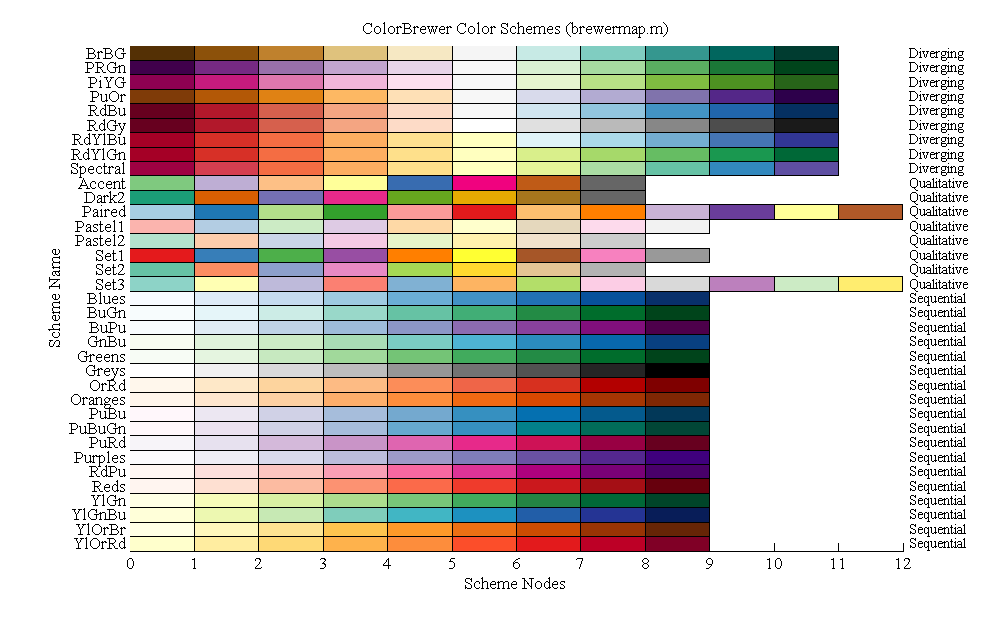